In [1]:
import pandas as pd
import numpy as np
import gc
from os import walk
import unicodedata
import matplotlib.pyplot as plt

import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from datetime import date
from sklearn.metrics import f1_score
from sklearn.preprocessing import PolynomialFeatures

#pd.set_option('max_columns', None)
#pd.set_option("max_rows", None)

## Form Keyword Dict

In [2]:
kw_dict = {}

In [3]:
kw_chem = pd.read_excel('data/Stage_1/Keywords/02chem.list.xlsx', header=None, engine="openpyxl")
kw_chem

,0,1,2,3,4,5,6
0,貝芬硫醌,貝芬硫可濕性粉劑,貝芬硫琨,NaN,NaN,NaN,NaN
1,腈硫醌,硫水懸劑,硫水分散性粒劑,硫可濕性粉劑,腈硫醌水懸劑,睛硫琨水懸劑,腈硫醌可濕性粉劑
2,鋅錳乃浦,鋅錳乃浦水懸劑,鋅錳乃浦可濕性粉劑,鋅錳乃普水懸劑,NaN,NaN,NaN
3,性費洛蒙,費洛蒙,性費洛,費洛蒙緩釋劑,NaN,NaN,NaN
4,蘇力菌,蘇力菌水分散性粒劑,蘇力菌可濕性粉劑,生物製劑蘇力菌,蘇力菌製劑,NaN,NaN
...,...,...,...,...,...,...,...
364,嘉賜圃,嘉賜圃可濕性粉劑,NaN,NaN,NaN,NaN,NaN
365,百快隆,百快隆粒劑,NaN,NaN,NaN,NaN,NaN
366,嘉賜米松,嘉賜米松可濕性粉劑,NaN,NaN,NaN,NaN,NaN
367,撲殺賜圃,撲殺賜圃粒劑,NaN,NaN,NaN,NaN,NaN


In [4]:
chem_list = []
for rowIndex, row in kw_chem.iterrows(): #iterate over rows
    synonym = []
    for columnIndex, value in row.items():
        if value is np.nan:
            break
        synonym.append(value)
    synonym = list( dict.fromkeys(synonym) )
    chem_list.append(synonym)
    
gc.enable()
del kw_chem
gc.collect()

chem_list

[['貝芬硫醌', '貝芬硫可濕性粉劑', '貝芬硫琨'],
 ['腈硫醌', '硫水懸劑', '硫水分散性粒劑', '硫可濕性粉劑', '腈硫醌水懸劑', '睛硫琨水懸劑', '腈硫醌可濕性粉劑'],
 ['鋅錳乃浦', '鋅錳乃浦水懸劑', '鋅錳乃浦可濕性粉劑', '鋅錳乃普水懸劑'],
 ['性費洛蒙', '費洛蒙', '性費洛', '費洛蒙緩釋劑'],
 ['蘇力菌', '蘇力菌水分散性粒劑', '蘇力菌可濕性粉劑', '生物製劑蘇力菌', '蘇力菌製劑'],
 ['比多農', '比多農可濕性粉劑'],
 ['夏油', '夏油(乙)', '四季夏油'],
 ['亞磷酸', '亞磷酸稀釋液'],
 ['乳化葵花油', '葵花油乳化液'],
 ['窄域油'],
 ['核多角體病毒'],
 ['苦楝油'],
 ['微生物製劑'],
 ['三賽唑', '三賽唑可濕性粉劑', '三賽唑水懸劑', '三賽唑可溼性粉劑', '三賽唑可濕性粉', '賽唑可濕性粉劑'],
 ['亞賜圃', '亞賜圃乳劑', '亞賜圃可濕性粉劑'],
 ['嘉賜黴素', '嘉賜黴素溶液', '嘉賜黴素可溼性粉劑', '嘉賜黴素可濕性粉劑', '嘉賜黴素可施性粉劑', '嘉賜黴素水溶性粒劑'],
 ['喜樂克拉', '喜樂克拉乳劑'],
 ['護粒松', '護粒松乳劑'],
 ['芬殺松', '芬殺松乳劑', '芬殺松乳劑稀釋'],
 ['加保利', '加保利可濕性粉劑', '加保利可溼性粉劑水懸劑', '加保利可濕性粉劑可濕性粉劑', '加保利可濕性粉劑稀釋'],
 ['加保扶', '加保扶水懸劑', '加保扶粒劑', '加保扶水懸劑稀釋'],
 ['第滅寧', '第滅寧水懸劑', '第滅寧乳劑'],
 ['甲基多保淨', '甲基多保淨水懸劑', '甲基多保淨可濕性粉劑', '甲基多保淨軟膏劑'],
 ['嘉賜三賽唑', '嘉賜三賽唑可濕性粉劑', '賜三賽唑可濕性粉劑', '嘉賜三塞唑可濕性粉劑', '加賜三賽唑可濕性粉劑'],
 ['護粒三賽唑', '護粒三賽唑可濕性粉劑', '護粒三塞唑可濕性粉劑'],
 ['撲殺培丹', '撲殺培丹粒劑'],
 ['撲殺熱', '撲殺熱藥劑', '撲殺熱粒劑'],
 ['保米熱斯', '保米熱必斯可濕性粉劑', '保米熱斯可濕性粉劑'],
 ['肉桂

In [5]:
kw_crop = pd.read_excel('data/Stage_1/Keywords/02crop.list.xlsx', header=None, engine="openpyxl")
kw_crop

,0,1,2,3
0,文旦柚,文旦,麻豆文旦,NaN
1,水稻,NaN,NaN,NaN
2,青蔥,蔥,NaN,NaN
3,龍鬚菜,NaN,NaN,NaN
4,韭菜,NaN,NaN,NaN
...,...,...,...,...
183,果菜類,NaN,NaN,NaN
184,無患子科,NaN,NaN,NaN
185,洛神葵,NaN,NaN,NaN
186,冬瓜,NaN,NaN,NaN


In [6]:
crop_list = []
for rowIndex, row in kw_crop.iterrows(): #iterate over rows
    synonym = []
    for columnIndex, value in row.items():
        if value is np.nan:
            break
        synonym.append(value)
    crop_list.append(synonym)
    
gc.enable()
del kw_crop
gc.collect()

crop_list

[['文旦柚', '文旦', '麻豆文旦'],
 ['水稻'],
 ['青蔥', '蔥'],
 ['龍鬚菜'],
 ['韭菜'],
 ['甘藍'],
 ['西瓜'],
 ['芋頭'],
 ['香蕉'],
 ['甘藷'],
 ['玉米'],
 ['胡瓜'],
 ['絲瓜'],
 ['洋香瓜'],
 ['菠菜'],
 ['萵苣'],
 ['十字花科'],
 ['豆科'],
 ['大蒜'],
 ['茼蒿'],
 ['落花生', '花生'],
 ['蔬菜'],
 ['田菁'],
 ['毛豆'],
 ['豌豆'],
 ['蓮花'],
 ['梨', '中國梨', '高接梨'],
 ['荔枝', '玉荷包荔枝'],
 ['龍眼'],
 ['蓮霧'],
 ['欒樹', '台灣欒樹'],
 ['果樹'],
 ['草莓', '草莓苗期'],
 ['柑橘'],
 ['紅棗'],
 ['柿子', '甜柿'],
 ['桃子', '桃'],
 ['李子'],
 ['枇杷'],
 ['楊桃'],
 ['檬果', '芒果'],
 ['木瓜'],
 ['番石榴', '芭樂'],
 ['檸檬'],
 ['印度棗'],
 ['番茄', '小果番茄', '橙蜜香番茄', '橙果小番茄'],
 ['馬鈴薯'],
 ['紅龍果'],
 ['棗'],
 ['蜜棗'],
 ['瓜果類'],
 ['豆菜類'],
 ['洋蔥'],
 ['豆類'],
 ['龍柏'],
 ['棗子'],
 ['高粱'],
 ['大豆'],
 ['香瓜'],
 ['南瓜'],
 ['橄欖'],
 ['葡萄'],
 ['洋桔梗'],
 ['柑桔'],
 ['百香果'],
 ['番荔枝'],
 ['鳳梨釋迦', '釋迦'],
 ['樹豆'],
 ['桶柑'],
 ['茂谷柑'],
 ['臍橙'],
 ['晚崙西亞', '晚崙西亞橙', '丁香'],
 ['荖花'],
 ['荖葉'],
 ['水蜜桃'],
 ['小米'],
 ['金針', '金針菜'],
 ['蘭花'],
 ['鳳梨'],
 ['酪梨'],
 ['杭菊'],
 ['花卉'],
 ['白柚'],
 ['椪柑'],
 ['柳橙', '柳丁'],
 ['西施柚'],
 ['蔬果類'],
 ['明尼吉柚'],
 ['葡萄柚'],
 ['葉菜類'],
 ['雜糧'],
 ['雜草'],


In [7]:
kw_pest = pd.read_excel('data/Stage_1/Keywords/02pest.list.xlsx', header=None, engine="openpyxl")
kw_pest

,0,1,2,3,4,5
0,斜紋夜蛾,斜紋夜盜蟲,黑蟲,行軍蟲,黑肚蟲,夜盜蟲
1,甜菜夜蛾,蔥仔管蟲,管仔蟲,NaN,NaN,NaN
2,黑點病,NaN,NaN,NaN,NaN,NaN
3,軟腐病,NaN,NaN,NaN,NaN,NaN
4,疫病,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
202,姬黃薊馬,NaN,NaN,NaN,NaN,NaN
203,猝倒病,NaN,NaN,NaN,NaN,NaN
204,路易氏始葉螨,NaN,NaN,NaN,NaN,NaN
205,大螟,NaN,NaN,NaN,NaN,NaN


In [8]:
pest_list = []
for rowIndex, row in kw_pest.iterrows(): #iterate over rows
    synonym = []
    for columnIndex, value in row.items():
        if value is np.nan:
            break
        synonym.append(value)
    pest_list.append(synonym)
    
gc.enable()
del kw_pest
gc.collect()

pest_list

[['斜紋夜蛾', '斜紋夜盜蟲', '黑蟲', '行軍蟲', '黑肚蟲', '夜盜蟲'],
 ['甜菜夜蛾', '蔥仔管蟲', '管仔蟲'],
 ['黑點病'],
 ['軟腐病'],
 ['疫病'],
 ['炭疽病'],
 ['潰瘍病'],
 ['白絹病'],
 ['黑腐病'],
 ['紫斑病'],
 ['黑斑病', '細菌性黑斑病', '鬼頭病', '輪斑病'],
 ['露菌病'],
 ['根螨'],
 ['薊馬'],
 ['瘤野螟', '稻縱捲葉蟲', '捲葉蟲', '葉尾蟲', '縱捲葉蟲'],
 ['褐飛蝨', '稻蝨', '跳仔'],
 ['白背飛蝨'],
 ['斑飛蝨', '穗苔'],
 ['梨木蝨'],
 ['黑星病'],
 ['煤紋病'],
 ['稻熱病', '稻瘟'],
 ['荔枝椿象', '臭青龜仔', '臭屁蟲', '臭椿象', '荔椿'],
 ['白葉枯病'],
 ['木蝨'],
 ['東方果實蠅', '蜂仔'],
 ['穗稻熱病', '吊穗', '吊狗'],
 ['葉稻熱病'],
 ['螟蟲'],
 ['水稻縞葉枯病'],
 ['露疫病'],
 ['鬼帚病'],
 ['紋枯病', '臭腳銅'],
 ['二化螟', '鑽心蟲'],
 ['三化螟'],
 ['草狀矮化病'],
 ['皺縮矮化病'],
 ['水稻水象鼻蟲'],
 ['小黃薊馬', '茶黃薊馬'],
 ['花薊馬'],
 ['煤煙病', '煤污病', '黑腳煙仔'],
 ['瓜實蠅', '瓜仔蜂'],
 ['灰象鼻蟲'],
 ['線蟲'],
 ['飛蝨類'],
 ['酸腐病'],
 ['壯鋏普癭蚋'],
 ['晚疫病', '黑骨病', '黑腳病', '爛葉仔病', '黑骨'],
 ['咖啡木蠹蛾'],
 ['台灣黃毒蛾'],
 ['小白紋毒蛾'],
 ['畸形病', '瘋花', '瘋欉', '公花'],
 ['瘡痂病'],
 ['白粉病'],
 ['褐斑病'],
 ['銀葉粉蝨', '白蒼蠅'],
 ['番茄嵌紋病毒'],
 ['胡瓜嵌紋病毒'],
 ['馬鈴薯病毒Y'],
 ['番茄黃化捲葉病毒', '番茄捲葉病'],
 ['霍香薊黃脈病毒'],
 ['輪斑病'],
 ['根腐病'],
 ['濕腐病'],
 ['黃萎病'],
 ['蚜蟲'],
 ['番茄斑點萎凋病毒'],
 [

In [9]:
kw_dict['chem'] = chem_list
kw_dict['crop'] = crop_list
kw_dict['pest'] = pest_list

gc.enable()
del chem_list, crop_list, pest_list
gc.collect()

kw_dict

{'chem': [['貝芬硫醌', '貝芬硫可濕性粉劑', '貝芬硫琨'],
  ['腈硫醌', '硫水懸劑', '硫水分散性粒劑', '硫可濕性粉劑', '腈硫醌水懸劑', '睛硫琨水懸劑', '腈硫醌可濕性粉劑'],
  ['鋅錳乃浦', '鋅錳乃浦水懸劑', '鋅錳乃浦可濕性粉劑', '鋅錳乃普水懸劑'],
  ['性費洛蒙', '費洛蒙', '性費洛', '費洛蒙緩釋劑'],
  ['蘇力菌', '蘇力菌水分散性粒劑', '蘇力菌可濕性粉劑', '生物製劑蘇力菌', '蘇力菌製劑'],
  ['比多農', '比多農可濕性粉劑'],
  ['夏油', '夏油(乙)', '四季夏油'],
  ['亞磷酸', '亞磷酸稀釋液'],
  ['乳化葵花油', '葵花油乳化液'],
  ['窄域油'],
  ['核多角體病毒'],
  ['苦楝油'],
  ['微生物製劑'],
  ['三賽唑', '三賽唑可濕性粉劑', '三賽唑水懸劑', '三賽唑可溼性粉劑', '三賽唑可濕性粉', '賽唑可濕性粉劑'],
  ['亞賜圃', '亞賜圃乳劑', '亞賜圃可濕性粉劑'],
  ['嘉賜黴素', '嘉賜黴素溶液', '嘉賜黴素可溼性粉劑', '嘉賜黴素可濕性粉劑', '嘉賜黴素可施性粉劑', '嘉賜黴素水溶性粒劑'],
  ['喜樂克拉', '喜樂克拉乳劑'],
  ['護粒松', '護粒松乳劑'],
  ['芬殺松', '芬殺松乳劑', '芬殺松乳劑稀釋'],
  ['加保利', '加保利可濕性粉劑', '加保利可溼性粉劑水懸劑', '加保利可濕性粉劑可濕性粉劑', '加保利可濕性粉劑稀釋'],
  ['加保扶', '加保扶水懸劑', '加保扶粒劑', '加保扶水懸劑稀釋'],
  ['第滅寧', '第滅寧水懸劑', '第滅寧乳劑'],
  ['甲基多保淨', '甲基多保淨水懸劑', '甲基多保淨可濕性粉劑', '甲基多保淨軟膏劑'],
  ['嘉賜三賽唑', '嘉賜三賽唑可濕性粉劑', '賜三賽唑可濕性粉劑', '嘉賜三塞唑可濕性粉劑', '加賜三賽唑可濕性粉劑'],
  ['護粒三賽唑', '護粒三賽唑可濕性粉劑', '護粒三塞唑可濕性粉劑'],
  ['撲殺培丹', '撲殺培丹粒劑'],
  ['撲殺熱', '撲殺熱藥劑', '撲殺熱粒劑'],
  ['保米熱斯

In [10]:
columns = []
bound_indices = {}
counts = 0
for key, values in kw_dict.items():
    left_bound = counts
    for kw_count, keywords in enumerate(values):
        for syn_count, keyword in enumerate(keywords):
            columns.append(key + "_" + str(kw_count) + "_" + keyword)
            counts += 1
    bound_indices[key] = (left_bound, counts)
len(columns)

1366

In [11]:
bound_indices

{'chem': (0, 864), 'crop': (864, 1080), 'pest': (1080, 1366)}

In [12]:
columns

['chem_0_貝芬硫醌',
 'chem_0_貝芬硫可濕性粉劑',
 'chem_0_貝芬硫琨',
 'chem_1_腈硫醌',
 'chem_1_硫水懸劑',
 'chem_1_硫水分散性粒劑',
 'chem_1_硫可濕性粉劑',
 'chem_1_腈硫醌水懸劑',
 'chem_1_睛硫琨水懸劑',
 'chem_1_腈硫醌可濕性粉劑',
 'chem_2_鋅錳乃浦',
 'chem_2_鋅錳乃浦水懸劑',
 'chem_2_鋅錳乃浦可濕性粉劑',
 'chem_2_鋅錳乃普水懸劑',
 'chem_3_性費洛蒙',
 'chem_3_費洛蒙',
 'chem_3_性費洛',
 'chem_3_費洛蒙緩釋劑',
 'chem_4_蘇力菌',
 'chem_4_蘇力菌水分散性粒劑',
 'chem_4_蘇力菌可濕性粉劑',
 'chem_4_生物製劑蘇力菌',
 'chem_4_蘇力菌製劑',
 'chem_5_比多農',
 'chem_5_比多農可濕性粉劑',
 'chem_6_夏油',
 'chem_6_夏油(乙)',
 'chem_6_四季夏油',
 'chem_7_亞磷酸',
 'chem_7_亞磷酸稀釋液',
 'chem_8_乳化葵花油',
 'chem_8_葵花油乳化液',
 'chem_9_窄域油',
 'chem_10_核多角體病毒',
 'chem_11_苦楝油',
 'chem_12_微生物製劑',
 'chem_13_三賽唑',
 'chem_13_三賽唑可濕性粉劑',
 'chem_13_三賽唑水懸劑',
 'chem_13_三賽唑可溼性粉劑',
 'chem_13_三賽唑可濕性粉',
 'chem_13_賽唑可濕性粉劑',
 'chem_14_亞賜圃',
 'chem_14_亞賜圃乳劑',
 'chem_14_亞賜圃可濕性粉劑',
 'chem_15_嘉賜黴素',
 'chem_15_嘉賜黴素溶液',
 'chem_15_嘉賜黴素可溼性粉劑',
 'chem_15_嘉賜黴素可濕性粉劑',
 'chem_15_嘉賜黴素可施性粉劑',
 'chem_15_嘉賜黴素水溶性粒劑',
 'chem_16_喜樂克拉',
 'chem_16_喜樂克拉乳劑',
 'chem_17_護粒松',
 'chem_17_護粒松乳劑',
 'chem_18

### (Optional) Read df

In [13]:
#df_pairs = pd.read_csv('checkpoints/df_pairs.csv').set_index('txt_pair')
df_pairs = pd.read_csv('df_pairs.csv').set_index('txt_pair')
rows = [i for i in df_pairs.index if '887' not in i]
#print(rows)
df_pairs = df_pairs.loc[rows]

df_pairs

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),crop(OR-AND),crop(R-L),pest(AND),pest(OR),pest(L-AND),pest(R-AND),pest(OR-AND),pest(R-L)
txt_pair,,,,,,,,,,,,,,,,,,
"1, 10",0,23,8,15,23,7,0,3,2,1,3,-1,0,3,1,2,3,1
"10, 1",0,23,15,8,23,-7,0,3,1,2,3,1,0,3,2,1,3,-1
"1, 1000",0,8,8,0,8,-8,0,3,2,1,3,-1,0,4,1,3,4,2
"1000, 1",0,8,0,8,8,8,0,3,1,2,3,1,0,4,3,1,4,-2
"1, 1005",0,8,8,0,8,-8,0,3,2,1,3,-1,0,4,1,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"997, 992",0,4,4,0,4,-4,1,4,0,3,3,3,0,6,3,3,6,0
"992, 998",0,4,0,4,4,4,1,5,3,1,4,-2,1,5,2,2,4,0
"998, 992",0,4,4,0,4,-4,1,5,1,3,4,2,1,5,2,2,4,0


In [14]:
df_pairs_test = pd.read_csv('checkpoints/df_pairs_test_s3.csv').set_index('txt_pair')
df_pairs_test

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),crop(OR-AND),crop(R-L),pest(AND),pest(OR),pest(L-AND),pest(R-AND),pest(OR-AND),pest(R-L)
txt_pair,,,,,,,,,,,,,,,,,,
"100, 1002",0,29,25,4,29,-21,1,6,1,4,5,3,1,9,1,7,8,6
"1002, 100",0,29,4,25,29,21,1,6,4,1,5,-3,1,9,7,1,8,-6
"100, 1003",0,31,25,6,31,-19,1,2,1,0,1,-1,0,4,2,2,4,0
"1003, 100",0,31,6,25,31,19,1,2,0,1,1,1,0,4,2,2,4,0
"100, 101",0,30,25,5,30,-20,2,2,0,0,0,0,0,4,2,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99, 989",0,5,0,5,5,5,0,3,2,1,3,-1,0,3,2,1,3,-1
"989, 995",0,9,5,4,9,-1,0,4,1,3,4,2,0,3,1,2,3,1
"995, 989",0,9,4,5,9,1,0,4,3,1,4,-2,0,3,2,1,3,-1


### Model Definition

In [15]:
def lgb_f1_score(y_true, y_hat): 
    y_hat = np.round(y_hat).astype(int)
    return 'f1', f1_score(y_true, y_hat), True

In [16]:
def model(features, test_features, n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            
        feature_importances (pd.DataFrame): 
        dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (F1) for each fold and overall.
        
    """    
    
    # Extract the labels for training
    labels = features[TARGET]
    
    # Remove the ids and target
    features = features.drop(columns = [TARGET])
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    
    test_index = test_features.index
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = None)

    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective='binary', is_unbalance=True,  learning_rate= 0.01,
                                   reg_alpha= 0, reg_lambda= 0, subsample= 0.7, subsample_freq= 20, max_depth= 40,
                                   num_leaves= 70, min_child_samples= 21, min_child_weight= 0.0005, feature_fraction= 0.7,
                                   bagging_fraction= 1, bagging_freq= 2, cat_smooth= 0)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = lgb_f1_score,
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = 'auto',
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['f1']
        train_score = model.best_score_['train']['f1']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'txt_pair':test_index, TARGET: np.round(test_predictions).astype(int)}).set_index('txt_pair')
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_f1 = f1_score(labels, np.round(out_of_fold).astype(int))
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_f1)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [17]:
def stratified_model(features, test_features, n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            
        feature_importances (pd.DataFrame): 
        dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (F1) for each fold and overall.
        
    """    
    
    # Extract the labels for training
    labels = features[TARGET]
    
    # Remove the ids and target
    features = features.drop(columns = [TARGET])
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    
    test_index = test_features.index
    test_features = np.array(test_features)
    
    # Create the kfold object
    '''StratifiedKFold'''
    k_fold = StratifiedKFold(n_splits = n_folds, shuffle = True, random_state = None)

    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    '''StratifiedKFold'''
    for train_indices, valid_indices in k_fold.split(features,labels): 
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective='binary', is_unbalance=True,  learning_rate= 0.01,
                                   reg_alpha= 0, reg_lambda= 0, subsample= 0.7, subsample_freq= 20, max_depth= 40,
                                   num_leaves= 70, min_child_samples= 21, min_child_weight= 0.0005, feature_fraction= 0.7,
                                   bagging_fraction= 1, bagging_freq= 2, cat_smooth= 0)
                
        # Train the model
        model.fit(train_features, train_labels, eval_metric = lgb_f1_score,
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = 'auto',
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['f1']
        train_score = model.best_score_['train']['f1']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'txt_pair':test_index, TARGET: np.round(test_predictions).astype(int)}).set_index('txt_pair')
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_f1 = f1_score(labels, np.round(out_of_fold).astype(int))
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_f1)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [18]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

## Process Passage

In [19]:
def remove_control_characters(s):
    return "".join(ch for ch in s if unicodedata.category(ch)[0]!="C")

In [20]:
def find_nth(haystack, needle, n):
    start = haystack.find(needle)
    while start >= 0 and n > 1:
        start = haystack.find(needle, start+len(needle))
        n -= 1
    return start

In [21]:
df = pd.DataFrame(columns = columns)
df

,chem_0_貝芬硫醌,chem_0_貝芬硫可濕性粉劑,chem_0_貝芬硫琨,chem_1_腈硫醌,chem_1_硫水懸劑,chem_1_硫水分散性粒劑,chem_1_硫可濕性粉劑,chem_1_腈硫醌水懸劑,chem_1_睛硫琨水懸劑,chem_1_腈硫醌可濕性粉劑,...,pest_197_綠椿象,pest_198_小綠葉蟬,pest_199_潛蠅類,pest_200_赤葉螨,pest_201_柑桔葉螨,pest_202_姬黃薊馬,pest_203_猝倒病,pest_204_路易氏始葉螨,pest_205_大螟,pest_206_褐根病


In [22]:
mypath = 'data/Corrected_Train/dataTrainComplete/'

filenames = next(walk(mypath), (None, None, []))[2]  # [] if no file

for filename in filenames:
    file_str = None
    data = []
    with open(mypath+filename, 'r', encoding="utf8") as file:
        file_str = remove_control_characters("".join(file.read().split()))
        file.close()
    
    for col in columns:
        kw = col[find_nth(col, "_", 2) + 1:]
        data.append(file_str.count(kw))
    df.loc[filename.replace('.txt','')] = data
df

,chem_0_貝芬硫醌,chem_0_貝芬硫可濕性粉劑,chem_0_貝芬硫琨,chem_1_腈硫醌,chem_1_硫水懸劑,chem_1_硫水分散性粒劑,chem_1_硫可濕性粉劑,chem_1_腈硫醌水懸劑,chem_1_睛硫琨水懸劑,chem_1_腈硫醌可濕性粉劑,...,pest_197_綠椿象,pest_198_小綠葉蟬,pest_199_潛蠅類,pest_200_赤葉螨,pest_201_柑桔葉螨,pest_202_姬黃薊馬,pest_203_猝倒病,pest_204_路易氏始葉螨,pest_205_大螟,pest_206_褐根病
1,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
for x,i in df.sum(axis=1).items():
    if i==0:
        print(x)

969


In [24]:
for x,i in df.sum(axis=0).items():
    if i==0:
        print(x)

chem_1_腈硫醌可濕性粉劑
chem_3_性費洛
chem_4_蘇力菌可濕性粉劑
chem_10_核多角體病毒
chem_15_嘉賜黴素可施性粉劑
chem_18_芬殺松乳劑稀釋
chem_19_加保利可溼性粉劑水懸劑
chem_19_加保利可濕性粉劑可濕性粉劑
chem_19_加保利可濕性粉劑稀釋
chem_29_陶斯松水分散性粒劑
chem_31_苦楝油+皂素
chem_35_益達胺粒劑
chem_35_鐵砂掌
chem_35_鐵布杉乳劑
chem_52_可尼丁粒劑
chem_57_非克利水懸劑
chem_60_滅蝨丹
chem_60_滅蝨丹粒劑
chem_61_四利乳劑
chem_68_達特南水容性粒劑
chem_72_納乃得水溶性粉劑
chem_72_納乃得可溶性粉劑
chem_80_鹼性氯氧化銅水份散性粒劑
chem_83_亞磷酸混氫氧化鉀
chem_83_亞磷酸氫氧化鉀中和之溶液
chem_83_施亞磷酸溶液；亞磷酸；氫氧化鉀
chem_83_亞磷酸；氫氧化鉀；溶氫氧化鉀
chem_89_免敵克
chem_89_免敵克可濕性粉劑
chem_92_克蠅香混合溶液
chem_97_腈硫醌銅
chem_101_達滅芬可濕性粉劑或水懸劑
chem_106_碳酸氫鉀
chem_106_碳酸氫鉀可溶性粉劑
chem_110_亞滅寧水基乳劑
chem_113_四氯異苯腈可濕性粉劑
chem_113_四氯異苯腈水分散性粒劑
chem_119_克熱淨可濕性粉劑1500倍
chem_125_純白鏈黴菌素水溶性粉劑
chem_139_滅大松
chem_139_ 
chem_140_剋安勃水分散性粒劑
chem_147_聚乙醛餌劑
chem_151_免得克敏水份散性粒劑
chem_154_安美速
chem_154_安美速水懸劑
chem_161_益洛寧可濕性粉劑的為害。
chem_165_本達樂
chem_165_本達樂可濕性粉劑
chem_166_腈硫克敏
chem_167_合賽芬普寧
chem_168_依殺螨
chem_168_依殺
chem_168_依殺璊水懸劑
chem_168_依殺蟎水懸劑
chem_169_賽芬螨
chem_169_賽芬
chem_170_賜派芬
chem_170_賜派芬水懸劑
chem_171_可濕性硫磺
chem_171_可濕性硫磺水分散性粒

In [25]:
for x,i in df.loc['1'].items():
    if i>0:
        print(x)

chem_0_貝芬硫可濕性粉劑
chem_1_硫水懸劑
chem_1_硫可濕性粉劑
chem_2_鋅錳乃浦
chem_2_鋅錳乃浦水懸劑
chem_2_鋅錳乃浦可濕性粉劑
chem_156_錳乃浦
chem_156_錳乃浦可濕性粉劑
crop_0_文旦
crop_105_梅
pest_2_黑點病


#### Processing Test Data

In [26]:
df_test = pd.DataFrame(columns = columns)
df_test

,chem_0_貝芬硫醌,chem_0_貝芬硫可濕性粉劑,chem_0_貝芬硫琨,chem_1_腈硫醌,chem_1_硫水懸劑,chem_1_硫水分散性粒劑,chem_1_硫可濕性粉劑,chem_1_腈硫醌水懸劑,chem_1_睛硫琨水懸劑,chem_1_腈硫醌可濕性粉劑,...,pest_197_綠椿象,pest_198_小綠葉蟬,pest_199_潛蠅類,pest_200_赤葉螨,pest_201_柑桔葉螨,pest_202_姬黃薊馬,pest_203_猝倒病,pest_204_路易氏始葉螨,pest_205_大螟,pest_206_褐根病


In [27]:
mypath = 'data/Stage_3/dataPrivateComplete/'

filenames = next(walk(mypath), (None, None, []))[2]  # [] if no file

for filename in filenames:
    file_str = None
    data = []
    with open(mypath+filename, 'r', encoding="utf8") as file:
        file_str = remove_control_characters("".join(file.read().split()))
        file.close()
    
    for col in columns:
        kw = col[find_nth(col, "_", 2) + 1:]
        data.append(file_str.count(kw))
    df_test.loc[filename.replace('.txt','')] = data
df_test

,chem_0_貝芬硫醌,chem_0_貝芬硫可濕性粉劑,chem_0_貝芬硫琨,chem_1_腈硫醌,chem_1_硫水懸劑,chem_1_硫水分散性粒劑,chem_1_硫可濕性粉劑,chem_1_腈硫醌水懸劑,chem_1_睛硫琨水懸劑,chem_1_腈硫醌可濕性粉劑,...,pest_197_綠椿象,pest_198_小綠葉蟬,pest_199_潛蠅類,pest_200_赤葉螨,pest_201_柑桔葉螨,pest_202_姬黃薊馬,pest_203_猝倒病,pest_204_路易氏始葉螨,pest_205_大螟,pest_206_褐根病
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
for x,i in df_test.sum(axis=1).items():
    if i==0:
        print(x)

In [29]:
for x,i in df_test.sum(axis=0).items():
    if i==0:
        print(x)

chem_0_貝芬硫可濕性粉劑
chem_1_硫水懸劑
chem_1_睛硫琨水懸劑
chem_1_腈硫醌可濕性粉劑
chem_2_鋅錳乃普水懸劑
chem_3_性費洛
chem_4_生物製劑蘇力菌
chem_4_蘇力菌製劑
chem_6_四季夏油
chem_8_乳化葵花油
chem_8_葵花油乳化液
chem_9_窄域油
chem_15_嘉賜黴素可溼性粉劑
chem_15_嘉賜黴素可施性粉劑
chem_15_嘉賜黴素水溶性粒劑
chem_19_加保利可溼性粉劑水懸劑
chem_19_加保利可濕性粉劑稀釋
chem_22_甲基多保淨軟膏劑
chem_26_撲殺熱藥劑
chem_28_肉桂油乳化液
chem_29_陶斯松乳劑或水基乳劑
chem_31_苦楝油+皂素
chem_36_佈芬淨
chem_37_酵母球錠劑
chem_37_含毒蛋白質酵母錠
chem_41_克枯爛藥劑
chem_46_布芬第滅寧水懸劑
chem_48_待克利水懸劑
chem_57_非克利水懸劑
chem_58_賽氟滅粒劑
chem_59_依普座乳劑
chem_60_滅蝨丹
chem_60_滅蝨丹粒劑
chem_61_四利乳劑
chem_62_保米黴素乳劑
chem_65_丁基加保乳劑
chem_72_納乃得水溶性粒劑
chem_73_托福松
chem_73_托福松粒劑
chem_74_芬滅松
chem_74_芬滅松粒劑
chem_74_芬滅松乳劑
chem_75_普伏松
chem_76_滅線蟲
chem_76_滅線蟲粒劑
chem_77_幾丁質粒劑
chem_79_曼普胺
chem_79_曼普胺水懸劑
chem_80_鹼性氯氧化銅水份散性粒劑
chem_82_蓋棘木黴菌
chem_83_亞磷酸混和氫氧化鉀
chem_83_亞磷酸混氫氧化鉀
chem_83_亞磷酸氫氧化鉀中和之溶液
chem_83_施亞磷酸溶液；亞磷酸；氫氧化鉀
chem_83_亞磷酸；氫氧化鉀；溶氫氧化鉀
chem_87_毆殺松可濕性粉劑
chem_87_歐殺松乳劑
chem_90_百滅寧可濕性粉劑
chem_92_克蠅香混合溶液
chem_97_硫銅可濕性粉劑
chem_98_嘉賜熱
chem_98_嘉賜熱可濕性粉劑
chem_99_石灰硫磺合劑
chem_100_亞托敏水分散性粒劑
chem_101_達滅芬可濕性粉劑或水懸劑

In [30]:
for x,i in df_test.loc['2'].items():
    if i>0:
        print(x)

chem_3_性費洛蒙
chem_3_費洛蒙
chem_3_費洛蒙緩釋劑
crop_2_蔥
crop_91_雜草
pest_0_斜紋夜蛾
pest_1_甜菜夜蛾


### Feature Method 1: WithOUT Shrinking Synonym, WithOUT using frequent count

In [19]:
feature_method = 'FM1'

In [20]:
pair_columns = []

for key in kw_dict.keys():
    pair_columns.append(key + "(AND)")
    pair_columns.append(key + "(OR)")    
    pair_columns.append(key + "(L-AND)")    
    pair_columns.append(key + "(R-AND)")
    pair_columns.append(key + "(OR-AND)")
    pair_columns.append(key + "(R-L)")    
    
pair_columns

['chem(AND)',
 'chem(OR)',
 'chem(L-AND)',
 'chem(R-AND)',
 'chem(OR-AND)',
 'chem(R-L)',
 'crop(AND)',
 'crop(OR)',
 'crop(L-AND)',
 'crop(R-AND)',
 'crop(OR-AND)',
 'crop(R-L)',
 'pest(AND)',
 'pest(OR)',
 'pest(L-AND)',
 'pest(R-AND)',
 'pest(OR-AND)',
 'pest(R-L)']

In [21]:
df_pairs = pd.DataFrame(columns = pair_columns)

total_rows = df.shape[0]

for row_cnt, (index_left, row_left) in enumerate(df.iloc[:-1,:].iterrows()):
    #if row_cnt == df.shape[0] - 1:
       # break
    #print(row_cnt)
    print(str(row_cnt) + '/' + str(total_rows) + ', ' + str(100.0 * row_cnt / total_rows) + '%')
    
    row_left_np = np.array(row_left)
    #print(row_left_np)
    
    catg_cnt_left = {}
    for key, (l_bound, r_bound) in bound_indices.items():
        catg_cnt_left[key] = np.count_nonzero(row_left_np[l_bound:r_bound])
    #print(catg_cnt_left)
    
    for index_right, row_right in df.iloc[row_cnt+1:,:].iterrows():
        #print(index_right)
        #if index_left == index_right:
            #continue
            
        row_right_np = np.array(row_right)
        #nz_cnt_right = np.count_nonzero(row_right)
        catg_cnt_right = {}
        for key, (l_bound, r_bound) in bound_indices.items():
            catg_cnt_right[key] = np.count_nonzero(row_right_np[l_bound:r_bound])
        # print(catg_cnt_right)
        
        # Initialize feature lists
        pair_feat = {}
        pair_feat_opposite = {}
        for feat in pair_columns:
            pair_feat[feat] = 0
            pair_feat_opposite[feat] = 0
            
        logical_AND = np.logical_and(row_left_np, row_right_np)
        #print(sum(logical_AND))
        logical_OR = np.logical_or(row_left_np, row_right_np)
        
        for key, (l_bound, r_bound) in bound_indices.items():
            pair_feat[key + "(AND)"] = np.count_nonzero(logical_AND[l_bound:r_bound])
            pair_feat[key + "(OR)"] = np.count_nonzero(logical_OR[l_bound:r_bound])
        
        ''' 
        for col_index, (data_l, data_r) in enumerate(zip(row_left, row_right)):
            catgory = None
            for key, (l_bound, r_bound) in bound_indices.items():
                if col_index >= l_bound and col_index < r_bound:
                    catgory = key
                    break
            
            # AND
            if data_l * data_r != 0:
                pair_feat[catgory + "(AND)"] += 1
                
            # OR
            if data_l + data_r != 0:
                pair_feat[catgory + "(OR)"] += 1
        '''
        #print(pair_feat)
        
        for key in kw_dict.keys():
            pair_feat[key + "(L-AND)"] = catg_cnt_left[key] - pair_feat[key + "(AND)"]
            pair_feat[key + "(R-AND)"] = catg_cnt_right[key] - pair_feat[key + "(AND)"]
            pair_feat[key + "(OR-AND)"] = pair_feat[key + "(OR)"] - pair_feat[key + "(AND)"]
            pair_feat[key + "(R-L)"] = catg_cnt_right[key] - catg_cnt_left[key]            
            
            pair_feat_opposite[key + "(AND)"] = pair_feat[key + "(AND)"]
            pair_feat_opposite[key + "(OR)"] = pair_feat[key + "(OR)"]
            pair_feat_opposite[key + "(L-AND)"] = pair_feat[key + "(R-AND)"]
            pair_feat_opposite[key + "(R-AND)"] = pair_feat[key + "(L-AND)"]
            pair_feat_opposite[key + "(OR-AND)"] = pair_feat[key + "(OR-AND)"]
            pair_feat_opposite[key + "(R-L)"] = catg_cnt_left[key] - catg_cnt_right[key]
        
        #print(index_left)
        #print(index_right)   
        #print(pair_feat)
        
        df_pairs.loc[index_left + ", " + index_right] = pair_feat
        df_pairs.loc[index_right + ", " + index_left] = pair_feat_opposite
        
        #print(df_pairs)
            
df_pairs       

0/559, 0.0%
1/559, 0.17889087656529518%
2/559, 0.35778175313059035%
3/559, 0.5366726296958855%
4/559, 0.7155635062611807%
5/559, 0.8944543828264758%
6/559, 1.073345259391771%
7/559, 1.2522361359570662%
8/559, 1.4311270125223614%
9/559, 1.6100178890876566%
10/559, 1.7889087656529516%
11/559, 1.9677996422182469%
12/559, 2.146690518783542%
13/559, 2.3255813953488373%
14/559, 2.5044722719141324%
15/559, 2.6833631484794274%
16/559, 2.862254025044723%
17/559, 3.041144901610018%
18/559, 3.2200357781753133%
19/559, 3.3989266547406083%
20/559, 3.5778175313059033%
21/559, 3.7567084078711988%
22/559, 3.9355992844364938%


KeyboardInterrupt: 

In [23]:
df_pairs.index.name = 'txt_pair'

df_pairs.to_csv('checkpoints/df_pairs.csv')

In [22]:
df_pairs['TOTAL(AND)'] = df_pairs['chem(AND)'] + df_pairs['crop(AND)'] + df_pairs['pest(AND)']
df_pairs['TOTAL(OR)'] = df_pairs['chem(OR)'] + df_pairs['crop(OR)'] + df_pairs['pest(OR)']
df_pairs['TOTAL(L-AND)'] = df_pairs['chem(L-AND)'] + df_pairs['crop(L-AND)'] + df_pairs['pest(L-AND)']
df_pairs['TOTAL(R-AND)'] = df_pairs['chem(R-AND)'] + df_pairs['crop(R-AND)'] + df_pairs['pest(R-AND)']
df_pairs['TOTAL(OR-AND)'] = df_pairs['chem(OR-AND)'] + df_pairs['crop(OR-AND)'] + df_pairs['pest(OR-AND)']
df_pairs['TOTAL(R-L)'] = df_pairs['chem(R-L)'] + df_pairs['crop(R-L)'] + df_pairs['pest(R-L)']
df_pairs

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,pest(L-AND),pest(R-AND),pest(OR-AND),pest(R-L),TOTAL(AND),TOTAL(OR),TOTAL(L-AND),TOTAL(R-AND),TOTAL(OR-AND),TOTAL(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"1, 10",0,23,8,15,23,7,0,3,2,1,...,1,2,3,1,0,29,11,18,29,7
"10, 1",0,23,15,8,23,-7,0,3,1,2,...,2,1,3,-1,0,29,18,11,29,-7
"1, 1000",0,8,8,0,8,-8,0,3,2,1,...,1,3,4,2,0,15,11,4,15,-7
"1000, 1",0,8,0,8,8,8,0,3,1,2,...,3,1,4,-2,0,15,4,11,15,7
"1, 1005",0,8,8,0,8,-8,0,3,2,1,...,1,3,4,2,0,15,11,4,15,-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"997, 992",0,4,4,0,4,-4,1,4,0,3,...,3,3,6,0,1,14,7,6,13,-1
"992, 998",0,4,0,4,4,4,1,5,3,1,...,2,2,4,0,2,14,5,7,12,2
"998, 992",0,4,4,0,4,-4,1,5,1,3,...,2,2,4,0,2,14,7,5,12,-2


#### Processing Test Data

In [ ]:
df_pairs_test = pd.DataFrame(columns = pair_columns)

total_rows = df_test.shape[0]

for row_cnt, (index_left, row_left) in enumerate(df_test.iloc[:-1,:].iterrows()):
    #if row_cnt == df.shape[0] - 1:
       # break
    print(str(row_cnt) + '/' + str(total_rows) + ', ' + str(100.0 * row_cnt / total_rows) + '%')
    
    row_left_np = np.array(row_left)
    #print(row_left_np)
    
    catg_cnt_left = {}
    for key, (l_bound, r_bound) in bound_indices.items():
        catg_cnt_left[key] = np.count_nonzero(row_left_np[l_bound:r_bound])
    #print(catg_cnt_left)
    
    for index_right, row_right in df_test.iloc[row_cnt+1:,:].iterrows():
        #print(index_right)
        #if index_left == index_right:
            #continue
            
        row_right_np = np.array(row_right)
        #nz_cnt_right = np.count_nonzero(row_right)
        catg_cnt_right = {}
        for key, (l_bound, r_bound) in bound_indices.items():
            catg_cnt_right[key] = np.count_nonzero(row_right_np[l_bound:r_bound])
        # print(catg_cnt_right)
        
        # Initialize feature lists
        pair_feat = {}
        pair_feat_opposite = {}
        for feat in pair_columns:
            pair_feat[feat] = 0
            pair_feat_opposite[feat] = 0
            
        logical_AND = np.logical_and(row_left_np, row_right_np)
        #print(sum(logical_AND))
        logical_OR = np.logical_or(row_left_np, row_right_np)
        
        for key, (l_bound, r_bound) in bound_indices.items():
            pair_feat[key + "(AND)"] = np.count_nonzero(logical_AND[l_bound:r_bound])
            pair_feat[key + "(OR)"] = np.count_nonzero(logical_OR[l_bound:r_bound])
        
        ''' 
        for col_index, (data_l, data_r) in enumerate(zip(row_left, row_right)):
            catgory = None
            for key, (l_bound, r_bound) in bound_indices.items():
                if col_index >= l_bound and col_index < r_bound:
                    catgory = key
                    break
            
            # AND
            if data_l * data_r != 0:
                pair_feat[catgory + "(AND)"] += 1
                
            # OR
            if data_l + data_r != 0:
                pair_feat[catgory + "(OR)"] += 1
        '''
        #print(pair_feat)
        for key in kw_dict.keys():
            pair_feat[key + "(L-AND)"] = catg_cnt_left[key] - pair_feat[key + "(AND)"]
            pair_feat[key + "(R-AND)"] = catg_cnt_right[key] - pair_feat[key + "(AND)"]
            pair_feat[key + "(OR-AND)"] = pair_feat[key + "(OR)"] - pair_feat[key + "(AND)"]
            pair_feat[key + "(R-L)"] = catg_cnt_right[key] - catg_cnt_left[key]            
            
            pair_feat_opposite[key + "(AND)"] = pair_feat[key + "(AND)"]
            pair_feat_opposite[key + "(OR)"] = pair_feat[key + "(OR)"]
            pair_feat_opposite[key + "(L-AND)"] = pair_feat[key + "(R-AND)"]
            pair_feat_opposite[key + "(R-AND)"] = pair_feat[key + "(L-AND)"]
            pair_feat_opposite[key + "(OR-AND)"] = pair_feat[key + "(OR-AND)"]
            pair_feat_opposite[key + "(R-L)"] = catg_cnt_left[key] - catg_cnt_right[key]
        
        #print(index_left)
        #print(index_right)   
        #print(pair_feat)
        
        df_pairs_test.loc[index_left + ", " + index_right] = pair_feat
        df_pairs_test.loc[index_right + ", " + index_left] = pair_feat_opposite
        
        #print(df_pairs_test)
            
df_pairs_test       

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206


In [ ]:
df_pairs_test.index.name = 'txt_pair'

df_pairs_test.to_csv('checkpoints/df_pairs_test_s3.csv')

In [24]:
df_pairs_test['TOTAL(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['crop(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['TOTAL(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['crop(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['TOTAL(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['crop(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['TOTAL(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['crop(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['TOTAL(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['crop(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['TOTAL(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['crop(R-L)'] + df_pairs_test['pest(R-L)']
df_pairs_test

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,pest(L-AND),pest(R-AND),pest(OR-AND),pest(R-L),TOTAL(AND),TOTAL(OR),TOTAL(L-AND),TOTAL(R-AND),TOTAL(OR-AND),TOTAL(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"100, 1002",0,29,25,4,29,-21,1,6,1,4,...,1,7,8,6,2,44,27,15,42,-12
"1002, 100",0,29,4,25,29,21,1,6,4,1,...,7,1,8,-6,2,44,15,27,42,12
"100, 1003",0,31,25,6,31,-19,1,2,1,0,...,2,2,4,0,1,37,28,8,36,-20
"1003, 100",0,31,6,25,31,19,1,2,0,1,...,2,2,4,0,1,37,8,28,36,20
"100, 101",0,30,25,5,30,-20,2,2,0,0,...,2,2,4,0,2,36,27,7,34,-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99, 989",0,5,0,5,5,5,0,3,2,1,...,2,1,3,-1,0,11,4,7,11,3
"989, 995",0,9,5,4,9,-1,0,4,1,3,...,1,2,3,1,0,16,7,9,16,2
"995, 989",0,9,4,5,9,1,0,4,3,1,...,2,1,3,-1,0,16,9,7,16,-2


### Feature Method 2: WithOUT Shrinking Synonym, WithOUT using frequent count (With C3,2 Total Count)

In [29]:
feature_method = 'FM2'

In [30]:
df_pairs['TOTAL(AND)'] = df_pairs['chem(AND)'] + df_pairs['crop(AND)'] + df_pairs['pest(AND)']
df_pairs['TOTAL(OR)'] = df_pairs['chem(OR)'] + df_pairs['crop(OR)'] + df_pairs['pest(OR)']
df_pairs['TOTAL(L-AND)'] = df_pairs['chem(L-AND)'] + df_pairs['crop(L-AND)'] + df_pairs['pest(L-AND)']
df_pairs['TOTAL(R-AND)'] = df_pairs['chem(R-AND)'] + df_pairs['crop(R-AND)'] + df_pairs['pest(R-AND)']
df_pairs['TOTAL(OR-AND)'] = df_pairs['chem(OR-AND)'] + df_pairs['crop(OR-AND)'] + df_pairs['pest(OR-AND)']
df_pairs['TOTAL(R-L)'] = df_pairs['chem(R-L)'] + df_pairs['crop(R-L)'] + df_pairs['pest(R-L)']

df_pairs['chem+crop(AND)'] = df_pairs['chem(AND)'] + df_pairs['crop(AND)']
df_pairs['chem+crop(OR)'] = df_pairs['chem(OR)'] + df_pairs['crop(OR)']
df_pairs['chem+crop(L-AND)'] = df_pairs['chem(L-AND)'] + df_pairs['crop(L-AND)']
df_pairs['chem+crop(R-AND)'] = df_pairs['chem(R-AND)'] + df_pairs['crop(R-AND)']
df_pairs['chem+crop(OR-AND)'] = df_pairs['chem(OR-AND)'] + df_pairs['crop(OR-AND)']
df_pairs['chem+crop(R-L)'] = df_pairs['chem(R-L)'] + df_pairs['crop(R-L)']

df_pairs['chem+pest(AND)'] = df_pairs['chem(AND)'] + df_pairs['pest(AND)']
df_pairs['chem+pest(OR)'] = df_pairs['chem(OR)'] + df_pairs['pest(OR)']
df_pairs['chem+pest(L-AND)'] = df_pairs['chem(L-AND)'] + df_pairs['pest(L-AND)']
df_pairs['chem+pest(R-AND)'] = df_pairs['chem(R-AND)'] + df_pairs['pest(R-AND)']
df_pairs['chem+pest(OR-AND)'] = df_pairs['chem(OR-AND)'] + df_pairs['pest(OR-AND)']
df_pairs['chem+pest(R-L)'] = df_pairs['chem(R-L)'] + df_pairs['pest(R-L)']

df_pairs['crop+pest(AND)'] = df_pairs['crop(AND)'] + df_pairs['pest(AND)']
df_pairs['crop+pest(OR)'] = df_pairs['crop(OR)'] + df_pairs['pest(OR)']
df_pairs['crop+pest(L-AND)'] = df_pairs['crop(L-AND)'] + df_pairs['pest(L-AND)']
df_pairs['crop+pest(R-AND)'] = df_pairs['crop(R-AND)'] + df_pairs['pest(R-AND)']
df_pairs['crop+pest(OR-AND)'] = df_pairs['crop(OR-AND)'] + df_pairs['pest(OR-AND)']
df_pairs['crop+pest(R-L)'] = df_pairs['crop(R-L)'] + df_pairs['pest(R-L)']

df_pairs

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,chem+pest(L-AND),chem+pest(R-AND),chem+pest(OR-AND),chem+pest(R-L),crop+pest(AND),crop+pest(OR),crop+pest(L-AND),crop+pest(R-AND),crop+pest(OR-AND),crop+pest(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"1, 10",0,23,8,15,23,7,0,3,2,1,...,9,17,26,8,0,6,3,3,6,0
"10, 1",0,23,15,8,23,-7,0,3,1,2,...,17,9,26,-8,0,6,3,3,6,0
"1, 1000",0,8,8,0,8,-8,0,3,2,1,...,9,3,12,-6,0,7,3,4,7,1
"1000, 1",0,8,0,8,8,8,0,3,1,2,...,3,9,12,6,0,7,4,3,7,-1
"1, 1005",0,8,8,0,8,-8,0,3,2,1,...,9,3,12,-6,0,7,3,4,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"997, 992",0,4,4,0,4,-4,1,4,0,3,...,7,3,10,-4,1,10,3,6,9,3
"992, 998",0,4,0,4,4,4,1,5,3,1,...,2,6,8,4,2,10,5,3,8,-2
"998, 992",0,4,4,0,4,-4,1,5,1,3,...,6,2,8,-4,2,10,3,5,8,2


In [31]:
df_pairs_test['TOTAL(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['crop(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['TOTAL(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['crop(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['TOTAL(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['crop(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['TOTAL(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['crop(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['TOTAL(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['crop(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['TOTAL(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['crop(R-L)'] + df_pairs_test['pest(R-L)']

df_pairs_test['chem+crop(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['crop(AND)']
df_pairs_test['chem+crop(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['crop(OR)']
df_pairs_test['chem+crop(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['crop(L-AND)']
df_pairs_test['chem+crop(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['crop(R-AND)']
df_pairs_test['chem+crop(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['crop(OR-AND)']
df_pairs_test['chem+crop(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['crop(R-L)']

df_pairs_test['chem+pest(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['chem+pest(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['chem+pest(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['chem+pest(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['chem+pest(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['chem+pest(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['pest(R-L)']

df_pairs_test['crop+pest(AND)'] = df_pairs_test['crop(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['crop+pest(OR)'] = df_pairs_test['crop(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['crop+pest(L-AND)'] = df_pairs_test['crop(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['crop+pest(R-AND)'] = df_pairs_test['crop(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['crop+pest(OR-AND)'] = df_pairs_test['crop(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['crop+pest(R-L)'] = df_pairs_test['crop(R-L)'] + df_pairs_test['pest(R-L)']

df_pairs_test

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,chem+pest(L-AND),chem+pest(R-AND),chem+pest(OR-AND),chem+pest(R-L),crop+pest(AND),crop+pest(OR),crop+pest(L-AND),crop+pest(R-AND),crop+pest(OR-AND),crop+pest(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"100, 1002",0,29,25,4,29,-21,1,6,1,4,...,26,11,37,-15,2,15,2,11,13,9
"1002, 100",0,29,4,25,29,21,1,6,4,1,...,11,26,37,15,2,15,11,2,13,-9
"100, 1003",0,31,25,6,31,-19,1,2,1,0,...,27,8,35,-19,1,6,3,2,5,-1
"1003, 100",0,31,6,25,31,19,1,2,0,1,...,8,27,35,19,1,6,2,3,5,1
"100, 101",0,30,25,5,30,-20,2,2,0,0,...,27,7,34,-20,2,6,2,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99, 989",0,5,0,5,5,5,0,3,2,1,...,2,6,8,4,0,6,4,2,6,-2
"989, 995",0,9,5,4,9,-1,0,4,1,3,...,6,6,12,0,0,7,2,5,7,3
"995, 989",0,9,4,5,9,1,0,4,3,1,...,6,6,12,0,0,7,5,2,7,-3


### Feature Method 3: WithOUT Shrinking Synonym, WithOUT using frequent count (With C3,2 Total Count & Minuses & MULTI)

In [19]:
feature_method = 'FM3'

In [20]:
# TOTAL
df_pairs['TOTAL(AND)'] = df_pairs['chem(AND)'] + df_pairs['crop(AND)'] + df_pairs['pest(AND)']
df_pairs['TOTAL(OR)'] = df_pairs['chem(OR)'] + df_pairs['crop(OR)'] + df_pairs['pest(OR)']
df_pairs['TOTAL(L-AND)'] = df_pairs['chem(L-AND)'] + df_pairs['crop(L-AND)'] + df_pairs['pest(L-AND)']
df_pairs['TOTAL(R-AND)'] = df_pairs['chem(R-AND)'] + df_pairs['crop(R-AND)'] + df_pairs['pest(R-AND)']
df_pairs['TOTAL(OR-AND)'] = df_pairs['chem(OR-AND)'] + df_pairs['crop(OR-AND)'] + df_pairs['pest(OR-AND)']
df_pairs['TOTAL(R-L)'] = df_pairs['chem(R-L)'] + df_pairs['crop(R-L)'] + df_pairs['pest(R-L)']

# PLUSES
df_pairs['chem+crop(AND)'] = df_pairs['chem(AND)'] + df_pairs['crop(AND)']
df_pairs['chem+crop(OR)'] = df_pairs['chem(OR)'] + df_pairs['crop(OR)']
df_pairs['chem+crop(L-AND)'] = df_pairs['chem(L-AND)'] + df_pairs['crop(L-AND)']
df_pairs['chem+crop(R-AND)'] = df_pairs['chem(R-AND)'] + df_pairs['crop(R-AND)']
df_pairs['chem+crop(OR-AND)'] = df_pairs['chem(OR-AND)'] + df_pairs['crop(OR-AND)']
df_pairs['chem+crop(R-L)'] = df_pairs['chem(R-L)'] + df_pairs['crop(R-L)']

df_pairs['chem+pest(AND)'] = df_pairs['chem(AND)'] + df_pairs['pest(AND)']
df_pairs['chem+pest(OR)'] = df_pairs['chem(OR)'] + df_pairs['pest(OR)']
df_pairs['chem+pest(L-AND)'] = df_pairs['chem(L-AND)'] + df_pairs['pest(L-AND)']
df_pairs['chem+pest(R-AND)'] = df_pairs['chem(R-AND)'] + df_pairs['pest(R-AND)']
df_pairs['chem+pest(OR-AND)'] = df_pairs['chem(OR-AND)'] + df_pairs['pest(OR-AND)']
df_pairs['chem+pest(R-L)'] = df_pairs['chem(R-L)'] + df_pairs['pest(R-L)']

df_pairs['crop+pest(AND)'] = df_pairs['crop(AND)'] + df_pairs['pest(AND)']
df_pairs['crop+pest(OR)'] = df_pairs['crop(OR)'] + df_pairs['pest(OR)']
df_pairs['crop+pest(L-AND)'] = df_pairs['crop(L-AND)'] + df_pairs['pest(L-AND)']
df_pairs['crop+pest(R-AND)'] = df_pairs['crop(R-AND)'] + df_pairs['pest(R-AND)']
df_pairs['crop+pest(OR-AND)'] = df_pairs['crop(OR-AND)'] + df_pairs['pest(OR-AND)']
df_pairs['crop+pest(R-L)'] = df_pairs['crop(R-L)'] + df_pairs['pest(R-L)']

# MINUSES
df_pairs['chem-crop(AND)'] = df_pairs['chem(AND)'] - df_pairs['crop(AND)']
df_pairs['chem-crop(OR)'] = df_pairs['chem(OR)'] - df_pairs['crop(OR)']
df_pairs['chem-crop(L-AND)'] = df_pairs['chem(L-AND)'] - df_pairs['crop(L-AND)']
df_pairs['chem-crop(R-AND)'] = df_pairs['chem(R-AND)'] - df_pairs['crop(R-AND)']
df_pairs['chem-crop(OR-AND)'] = df_pairs['chem(OR-AND)'] - df_pairs['crop(OR-AND)']
df_pairs['chem-crop(R-L)'] = df_pairs['chem(R-L)'] - df_pairs['crop(R-L)']

df_pairs['chem-pest(AND)'] = df_pairs['chem(AND)'] - df_pairs['pest(AND)']
df_pairs['chem-pest(OR)'] = df_pairs['chem(OR)'] - df_pairs['pest(OR)']
df_pairs['chem-pest(L-AND)'] = df_pairs['chem(L-AND)'] - df_pairs['pest(L-AND)']
df_pairs['chem-pest(R-AND)'] = df_pairs['chem(R-AND)'] - df_pairs['pest(R-AND)']
df_pairs['chem-pest(OR-AND)'] = df_pairs['chem(OR-AND)'] - df_pairs['pest(OR-AND)']
df_pairs['chem-pest(R-L)'] = df_pairs['chem(R-L)'] - df_pairs['pest(R-L)']

df_pairs['crop-pest(AND)'] = df_pairs['crop(AND)'] - df_pairs['pest(AND)']
df_pairs['crop-pest(OR)'] = df_pairs['crop(OR)'] - df_pairs['pest(OR)']
df_pairs['crop-pest(L-AND)'] = df_pairs['crop(L-AND)'] - df_pairs['pest(L-AND)']
df_pairs['crop-pest(R-AND)'] = df_pairs['crop(R-AND)'] - df_pairs['pest(R-AND)']
df_pairs['crop-pest(OR-AND)'] = df_pairs['crop(OR-AND)'] - df_pairs['pest(OR-AND)']
df_pairs['crop-pest(R-L)'] = df_pairs['crop(R-L)'] - df_pairs['pest(R-L)']

# MULTI
df_pairs['MULTI(AND)'] = df_pairs['chem(AND)'] * df_pairs['crop(AND)'] * df_pairs['pest(AND)']
df_pairs['MULTI(OR)'] = df_pairs['chem(OR)'] * df_pairs['crop(OR)'] * df_pairs['pest(OR)']
df_pairs['MULTI(L-AND)'] = df_pairs['chem(L-AND)'] * df_pairs['crop(L-AND)'] * df_pairs['pest(L-AND)']
df_pairs['MULTI(R-AND)'] = df_pairs['chem(R-AND)'] * df_pairs['crop(R-AND)'] * df_pairs['pest(R-AND)']
df_pairs['MULTI(OR-AND)'] = df_pairs['chem(OR-AND)'] * df_pairs['crop(OR-AND)'] * df_pairs['pest(OR-AND)']
df_pairs['MULTI(R-L)'] = df_pairs['chem(R-L)'] * df_pairs['crop(R-L)'] * df_pairs['pest(R-L)']

df_pairs

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,chem-pest(L-AND),chem-pest(R-AND),chem-pest(OR-AND),chem-pest(R-L),crop-pest(AND),crop-pest(OR),crop-pest(L-AND),crop-pest(R-AND),crop-pest(OR-AND),crop-pest(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"1, 10",0,23,8,15,23,7,0,3,2,1,...,7,13,20,6,0,0,1,-1,0,-2
"10, 1",0,23,15,8,23,-7,0,3,1,2,...,13,7,20,-6,0,0,-1,1,0,2
"1, 1000",0,8,8,0,8,-8,0,3,2,1,...,7,-3,4,-10,0,-1,1,-2,-1,-3
"1000, 1",0,8,0,8,8,8,0,3,1,2,...,-3,7,4,10,0,-1,-2,1,-1,3
"1, 1005",0,8,8,0,8,-8,0,3,2,1,...,7,-3,4,-10,0,-1,1,-2,-1,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"997, 992",0,4,4,0,4,-4,1,4,0,3,...,1,-3,-2,-4,1,-2,-3,0,-3,3
"992, 998",0,4,0,4,4,4,1,5,3,1,...,-2,2,0,4,0,0,1,-1,0,-2
"998, 992",0,4,4,0,4,-4,1,5,1,3,...,2,-2,0,-4,0,0,-1,1,0,2


In [21]:
# TOTAL
df_pairs_test['TOTAL(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['crop(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['TOTAL(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['crop(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['TOTAL(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['crop(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['TOTAL(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['crop(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['TOTAL(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['crop(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['TOTAL(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['crop(R-L)'] + df_pairs_test['pest(R-L)']

# PLUSES
df_pairs_test['chem+crop(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['crop(AND)']
df_pairs_test['chem+crop(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['crop(OR)']
df_pairs_test['chem+crop(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['crop(L-AND)']
df_pairs_test['chem+crop(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['crop(R-AND)']
df_pairs_test['chem+crop(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['crop(OR-AND)']
df_pairs_test['chem+crop(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['crop(R-L)']

df_pairs_test['chem+pest(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['chem+pest(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['chem+pest(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['chem+pest(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['chem+pest(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['chem+pest(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['pest(R-L)']

df_pairs_test['crop+pest(AND)'] = df_pairs_test['crop(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['crop+pest(OR)'] = df_pairs_test['crop(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['crop+pest(L-AND)'] = df_pairs_test['crop(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['crop+pest(R-AND)'] = df_pairs_test['crop(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['crop+pest(OR-AND)'] = df_pairs_test['crop(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['crop+pest(R-L)'] = df_pairs_test['crop(R-L)'] + df_pairs_test['pest(R-L)']

# MINUSES
df_pairs_test['chem-crop(AND)'] = df_pairs_test['chem(AND)'] - df_pairs_test['crop(AND)']
df_pairs_test['chem-crop(OR)'] = df_pairs_test['chem(OR)'] - df_pairs_test['crop(OR)']
df_pairs_test['chem-crop(L-AND)'] = df_pairs_test['chem(L-AND)'] - df_pairs_test['crop(L-AND)']
df_pairs_test['chem-crop(R-AND)'] = df_pairs_test['chem(R-AND)'] - df_pairs_test['crop(R-AND)']
df_pairs_test['chem-crop(OR-AND)'] = df_pairs_test['chem(OR-AND)'] - df_pairs_test['crop(OR-AND)']
df_pairs_test['chem-crop(R-L)'] = df_pairs_test['chem(R-L)'] - df_pairs_test['crop(R-L)']

df_pairs_test['chem-pest(AND)'] = df_pairs_test['chem(AND)'] - df_pairs_test['pest(AND)']
df_pairs_test['chem-pest(OR)'] = df_pairs_test['chem(OR)'] - df_pairs_test['pest(OR)']
df_pairs_test['chem-pest(L-AND)'] = df_pairs_test['chem(L-AND)'] - df_pairs_test['pest(L-AND)']
df_pairs_test['chem-pest(R-AND)'] = df_pairs_test['chem(R-AND)'] - df_pairs_test['pest(R-AND)']
df_pairs_test['chem-pest(OR-AND)'] = df_pairs_test['chem(OR-AND)'] - df_pairs_test['pest(OR-AND)']
df_pairs_test['chem-pest(R-L)'] = df_pairs_test['chem(R-L)'] - df_pairs_test['pest(R-L)']

df_pairs_test['crop-pest(AND)'] = df_pairs_test['crop(AND)'] - df_pairs_test['pest(AND)']
df_pairs_test['crop-pest(OR)'] = df_pairs_test['crop(OR)'] - df_pairs_test['pest(OR)']
df_pairs_test['crop-pest(L-AND)'] = df_pairs_test['crop(L-AND)'] - df_pairs_test['pest(L-AND)']
df_pairs_test['crop-pest(R-AND)'] = df_pairs_test['crop(R-AND)'] - df_pairs_test['pest(R-AND)']
df_pairs_test['crop-pest(OR-AND)'] = df_pairs_test['crop(OR-AND)'] - df_pairs_test['pest(OR-AND)']
df_pairs_test['crop-pest(R-L)'] = df_pairs_test['crop(R-L)'] - df_pairs_test['pest(R-L)']

# MULTI
df_pairs_test['MULTI(AND)'] = df_pairs_test['chem(AND)'] * df_pairs_test['crop(AND)'] * df_pairs_test['pest(AND)']
df_pairs_test['MULTI(OR)'] = df_pairs_test['chem(OR)'] * df_pairs_test['crop(OR)'] * df_pairs_test['pest(OR)']
df_pairs_test['MULTI(L-AND)'] = df_pairs_test['chem(L-AND)'] * df_pairs_test['crop(L-AND)'] * df_pairs_test['pest(L-AND)']
df_pairs_test['MULTI(R-AND)'] = df_pairs_test['chem(R-AND)'] * df_pairs_test['crop(R-AND)'] * df_pairs_test['pest(R-AND)']
df_pairs_test['MULTI(OR-AND)'] = df_pairs_test['chem(OR-AND)'] * df_pairs_test['crop(OR-AND)'] * df_pairs_test['pest(OR-AND)']
df_pairs_test['MULTI(R-L)'] = df_pairs_test['chem(R-L)'] * df_pairs_test['crop(R-L)'] * df_pairs_test['pest(R-L)']

df_pairs_test

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,chem-pest(L-AND),chem-pest(R-AND),chem-pest(OR-AND),chem-pest(R-L),crop-pest(AND),crop-pest(OR),crop-pest(L-AND),crop-pest(R-AND),crop-pest(OR-AND),crop-pest(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"100, 1002",0,29,25,4,29,-21,1,6,1,4,...,24,-3,21,-27,0,-3,0,-3,-3,-3
"1002, 100",0,29,4,25,29,21,1,6,4,1,...,-3,24,21,27,0,-3,-3,0,-3,3
"100, 1003",0,31,25,6,31,-19,1,2,1,0,...,23,4,27,-19,1,-2,-1,-2,-3,-1
"1003, 100",0,31,6,25,31,19,1,2,0,1,...,4,23,27,19,1,-2,-2,-1,-3,1
"100, 101",0,30,25,5,30,-20,2,2,0,0,...,23,3,26,-20,2,-2,-2,-2,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99, 989",0,5,0,5,5,5,0,3,2,1,...,-2,4,2,6,0,0,0,0,0,0
"989, 995",0,9,5,4,9,-1,0,4,1,3,...,4,2,6,-2,0,1,0,1,1,1
"995, 989",0,9,4,5,9,1,0,4,3,1,...,2,4,6,2,0,1,1,0,1,-1


### Feature Method 4: WithOUT Shrinking Synonym, WithOUT using frequent count (+/- & Poly & TOTAL & MULTI)

In [19]:
feature_method = 'FM4'

In [20]:
# Pluses
df_pairs['chem+crop(AND)'] = df_pairs['chem(AND)'] + df_pairs['crop(AND)']
df_pairs['chem+crop(OR)'] = df_pairs['chem(OR)'] + df_pairs['crop(OR)']
df_pairs['chem+crop(L-AND)'] = df_pairs['chem(L-AND)'] + df_pairs['crop(L-AND)']
df_pairs['chem+crop(R-AND)'] = df_pairs['chem(R-AND)'] + df_pairs['crop(R-AND)']
df_pairs['chem+crop(OR-AND)'] = df_pairs['chem(OR-AND)'] + df_pairs['crop(OR-AND)']
df_pairs['chem+crop(R-L)'] = df_pairs['chem(R-L)'] + df_pairs['crop(R-L)']

df_pairs['chem+pest(AND)'] = df_pairs['chem(AND)'] + df_pairs['pest(AND)']
df_pairs['chem+pest(OR)'] = df_pairs['chem(OR)'] + df_pairs['pest(OR)']
df_pairs['chem+pest(L-AND)'] = df_pairs['chem(L-AND)'] + df_pairs['pest(L-AND)']
df_pairs['chem+pest(R-AND)'] = df_pairs['chem(R-AND)'] + df_pairs['pest(R-AND)']
df_pairs['chem+pest(OR-AND)'] = df_pairs['chem(OR-AND)'] + df_pairs['pest(OR-AND)']
df_pairs['chem+pest(R-L)'] = df_pairs['chem(R-L)'] + df_pairs['pest(R-L)']

df_pairs['crop+pest(AND)'] = df_pairs['crop(AND)'] + df_pairs['pest(AND)']
df_pairs['crop+pest(OR)'] = df_pairs['crop(OR)'] + df_pairs['pest(OR)']
df_pairs['crop+pest(L-AND)'] = df_pairs['crop(L-AND)'] + df_pairs['pest(L-AND)']
df_pairs['crop+pest(R-AND)'] = df_pairs['crop(R-AND)'] + df_pairs['pest(R-AND)']
df_pairs['crop+pest(OR-AND)'] = df_pairs['crop(OR-AND)'] + df_pairs['pest(OR-AND)']
df_pairs['crop+pest(R-L)'] = df_pairs['crop(R-L)'] + df_pairs['pest(R-L)']

# Minuses
df_pairs['chem-crop(AND)'] = df_pairs['chem(AND)'] - df_pairs['crop(AND)']
df_pairs['chem-crop(OR)'] = df_pairs['chem(OR)'] - df_pairs['crop(OR)']
df_pairs['chem-crop(L-AND)'] = df_pairs['chem(L-AND)'] - df_pairs['crop(L-AND)']
df_pairs['chem-crop(R-AND)'] = df_pairs['chem(R-AND)'] - df_pairs['crop(R-AND)']
df_pairs['chem-crop(OR-AND)'] = df_pairs['chem(OR-AND)'] - df_pairs['crop(OR-AND)']
df_pairs['chem-crop(R-L)'] = df_pairs['chem(R-L)'] - df_pairs['crop(R-L)']

df_pairs['chem-pest(AND)'] = df_pairs['chem(AND)'] - df_pairs['pest(AND)']
df_pairs['chem-pest(OR)'] = df_pairs['chem(OR)'] - df_pairs['pest(OR)']
df_pairs['chem-pest(L-AND)'] = df_pairs['chem(L-AND)'] - df_pairs['pest(L-AND)']
df_pairs['chem-pest(R-AND)'] = df_pairs['chem(R-AND)'] - df_pairs['pest(R-AND)']
df_pairs['chem-pest(OR-AND)'] = df_pairs['chem(OR-AND)'] - df_pairs['pest(OR-AND)']
df_pairs['chem-pest(R-L)'] = df_pairs['chem(R-L)'] - df_pairs['pest(R-L)']

df_pairs['crop-pest(AND)'] = df_pairs['crop(AND)'] - df_pairs['pest(AND)']
df_pairs['crop-pest(OR)'] = df_pairs['crop(OR)'] - df_pairs['pest(OR)']
df_pairs['crop-pest(L-AND)'] = df_pairs['crop(L-AND)'] - df_pairs['pest(L-AND)']
df_pairs['crop-pest(R-AND)'] = df_pairs['crop(R-AND)'] - df_pairs['pest(R-AND)']
df_pairs['crop-pest(OR-AND)'] = df_pairs['crop(OR-AND)'] - df_pairs['pest(OR-AND)']
df_pairs['crop-pest(R-L)'] = df_pairs['crop(R-L)'] - df_pairs['pest(R-L)']

df_pairs

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,chem-pest(L-AND),chem-pest(R-AND),chem-pest(OR-AND),chem-pest(R-L),crop-pest(AND),crop-pest(OR),crop-pest(L-AND),crop-pest(R-AND),crop-pest(OR-AND),crop-pest(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"1, 10",0,23,8,15,23,7,0,3,2,1,...,7,13,20,6,0,0,1,-1,0,-2
"10, 1",0,23,15,8,23,-7,0,3,1,2,...,13,7,20,-6,0,0,-1,1,0,2
"1, 1000",0,8,8,0,8,-8,0,3,2,1,...,7,-3,4,-10,0,-1,1,-2,-1,-3
"1000, 1",0,8,0,8,8,8,0,3,1,2,...,-3,7,4,10,0,-1,-2,1,-1,3
"1, 1005",0,8,8,0,8,-8,0,3,2,1,...,7,-3,4,-10,0,-1,1,-2,-1,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"997, 992",0,4,4,0,4,-4,1,4,0,3,...,1,-3,-2,-4,1,-2,-3,0,-3,3
"992, 998",0,4,0,4,4,4,1,5,3,1,...,-2,2,0,4,0,0,1,-1,0,-2
"998, 992",0,4,4,0,4,-4,1,5,1,3,...,2,-2,0,-4,0,0,-1,1,0,2


In [21]:
df_pairs_original = df_pairs

In [22]:
poly = PolynomialFeatures(2)
poly_np = poly.fit_transform(np.array(df_pairs_original))

poly_columns = poly.get_feature_names(df_pairs_original.columns)

df_pairs = pd.DataFrame(data=poly_np, columns=poly_columns, index=df_pairs_original.index).drop(columns=['1'])

df_pairs

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,crop-pest(L-AND)^2,crop-pest(L-AND) crop-pest(R-AND),crop-pest(L-AND) crop-pest(OR-AND),crop-pest(L-AND) crop-pest(R-L),crop-pest(R-AND)^2,crop-pest(R-AND) crop-pest(OR-AND),crop-pest(R-AND) crop-pest(R-L),crop-pest(OR-AND)^2,crop-pest(OR-AND) crop-pest(R-L),crop-pest(R-L)^2
txt_pair,,,,,,,,,,,,,,,,,,,,,
"1, 10",0.0,23.0,8.0,15.0,23.0,7.0,0.0,3.0,2.0,1.0,...,1.0,-1.0,0.0,-2.0,1.0,-0.0,2.0,0.0,-0.0,4.0
"10, 1",0.0,23.0,15.0,8.0,23.0,-7.0,0.0,3.0,1.0,2.0,...,1.0,-1.0,-0.0,-2.0,1.0,0.0,2.0,0.0,0.0,4.0
"1, 1000",0.0,8.0,8.0,0.0,8.0,-8.0,0.0,3.0,2.0,1.0,...,1.0,-2.0,-1.0,-3.0,4.0,2.0,6.0,1.0,3.0,9.0
"1000, 1",0.0,8.0,0.0,8.0,8.0,8.0,0.0,3.0,1.0,2.0,...,4.0,-2.0,2.0,-6.0,1.0,-1.0,3.0,1.0,-3.0,9.0
"1, 1005",0.0,8.0,8.0,0.0,8.0,-8.0,0.0,3.0,2.0,1.0,...,1.0,-2.0,-1.0,-3.0,4.0,2.0,6.0,1.0,3.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"997, 992",0.0,4.0,4.0,0.0,4.0,-4.0,1.0,4.0,0.0,3.0,...,9.0,-0.0,9.0,-9.0,0.0,-0.0,0.0,9.0,-9.0,9.0
"992, 998",0.0,4.0,0.0,4.0,4.0,4.0,1.0,5.0,3.0,1.0,...,1.0,-1.0,0.0,-2.0,1.0,-0.0,2.0,0.0,-0.0,4.0
"998, 992",0.0,4.0,4.0,0.0,4.0,-4.0,1.0,5.0,1.0,3.0,...,1.0,-1.0,-0.0,-2.0,1.0,0.0,2.0,0.0,0.0,4.0


In [23]:
# TOTAL
df_pairs['TOTAL(AND)'] = df_pairs['chem(AND)'] + df_pairs['crop(AND)'] + df_pairs['pest(AND)']
df_pairs['TOTAL(OR)'] = df_pairs['chem(OR)'] + df_pairs['crop(OR)'] + df_pairs['pest(OR)']
df_pairs['TOTAL(L-AND)'] = df_pairs['chem(L-AND)'] + df_pairs['crop(L-AND)'] + df_pairs['pest(L-AND)']
df_pairs['TOTAL(R-AND)'] = df_pairs['chem(R-AND)'] + df_pairs['crop(R-AND)'] + df_pairs['pest(R-AND)']
df_pairs['TOTAL(OR-AND)'] = df_pairs['chem(OR-AND)'] + df_pairs['crop(OR-AND)'] + df_pairs['pest(OR-AND)']
df_pairs['TOTAL(R-L)'] = df_pairs['chem(R-L)'] + df_pairs['crop(R-L)'] + df_pairs['pest(R-L)']

# MULTI
df_pairs['MULTI(AND)'] = df_pairs['chem(AND)'] * df_pairs['crop(AND)'] * df_pairs['pest(AND)']
df_pairs['MULTI(OR)'] = df_pairs['chem(OR)'] * df_pairs['crop(OR)'] * df_pairs['pest(OR)']
df_pairs['MULTI(L-AND)'] = df_pairs['chem(L-AND)'] * df_pairs['crop(L-AND)'] * df_pairs['pest(L-AND)']
df_pairs['MULTI(R-AND)'] = df_pairs['chem(R-AND)'] * df_pairs['crop(R-AND)'] * df_pairs['pest(R-AND)']
df_pairs['MULTI(OR-AND)'] = df_pairs['chem(OR-AND)'] * df_pairs['crop(OR-AND)'] * df_pairs['pest(OR-AND)']
df_pairs['MULTI(R-L)'] = df_pairs['chem(R-L)'] * df_pairs['crop(R-L)'] * df_pairs['pest(R-L)']

df_pairs

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,TOTAL(L-AND),TOTAL(R-AND),TOTAL(OR-AND),TOTAL(R-L),MULTI(AND),MULTI(OR),MULTI(L-AND),MULTI(R-AND),MULTI(OR-AND),MULTI(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"1, 10",0.0,23.0,8.0,15.0,23.0,7.0,0.0,3.0,2.0,1.0,...,11.0,18.0,29.0,7.0,0.0,207.0,16.0,30.0,207.0,-7.0
"10, 1",0.0,23.0,15.0,8.0,23.0,-7.0,0.0,3.0,1.0,2.0,...,18.0,11.0,29.0,-7.0,0.0,207.0,30.0,16.0,207.0,7.0
"1, 1000",0.0,8.0,8.0,0.0,8.0,-8.0,0.0,3.0,2.0,1.0,...,11.0,4.0,15.0,-7.0,0.0,96.0,16.0,0.0,96.0,16.0
"1000, 1",0.0,8.0,0.0,8.0,8.0,8.0,0.0,3.0,1.0,2.0,...,4.0,11.0,15.0,7.0,0.0,96.0,0.0,16.0,96.0,-16.0
"1, 1005",0.0,8.0,8.0,0.0,8.0,-8.0,0.0,3.0,2.0,1.0,...,11.0,4.0,15.0,-7.0,0.0,96.0,16.0,0.0,96.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"997, 992",0.0,4.0,4.0,0.0,4.0,-4.0,1.0,4.0,0.0,3.0,...,7.0,6.0,13.0,-1.0,0.0,96.0,0.0,0.0,72.0,-0.0
"992, 998",0.0,4.0,0.0,4.0,4.0,4.0,1.0,5.0,3.0,1.0,...,5.0,7.0,12.0,2.0,0.0,100.0,0.0,8.0,64.0,-0.0
"998, 992",0.0,4.0,4.0,0.0,4.0,-4.0,1.0,5.0,1.0,3.0,...,7.0,5.0,12.0,-2.0,0.0,100.0,8.0,0.0,64.0,-0.0


In [24]:
# Pluses
df_pairs_test['chem+crop(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['crop(AND)']
df_pairs_test['chem+crop(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['crop(OR)']
df_pairs_test['chem+crop(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['crop(L-AND)']
df_pairs_test['chem+crop(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['crop(R-AND)']
df_pairs_test['chem+crop(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['crop(OR-AND)']
df_pairs_test['chem+crop(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['crop(R-L)']

df_pairs_test['chem+pest(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['chem+pest(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['chem+pest(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['chem+pest(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['chem+pest(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['chem+pest(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['pest(R-L)']

df_pairs_test['crop+pest(AND)'] = df_pairs_test['crop(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['crop+pest(OR)'] = df_pairs_test['crop(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['crop+pest(L-AND)'] = df_pairs_test['crop(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['crop+pest(R-AND)'] = df_pairs_test['crop(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['crop+pest(OR-AND)'] = df_pairs_test['crop(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['crop+pest(R-L)'] = df_pairs_test['crop(R-L)'] + df_pairs_test['pest(R-L)']

# Minuses
df_pairs_test['chem-crop(AND)'] = df_pairs_test['chem(AND)'] - df_pairs_test['crop(AND)']
df_pairs_test['chem-crop(OR)'] = df_pairs_test['chem(OR)'] - df_pairs_test['crop(OR)']
df_pairs_test['chem-crop(L-AND)'] = df_pairs_test['chem(L-AND)'] - df_pairs_test['crop(L-AND)']
df_pairs_test['chem-crop(R-AND)'] = df_pairs_test['chem(R-AND)'] - df_pairs_test['crop(R-AND)']
df_pairs_test['chem-crop(OR-AND)'] = df_pairs_test['chem(OR-AND)'] - df_pairs_test['crop(OR-AND)']
df_pairs_test['chem-crop(R-L)'] = df_pairs_test['chem(R-L)'] - df_pairs_test['crop(R-L)']

df_pairs_test['chem-pest(AND)'] = df_pairs_test['chem(AND)'] - df_pairs_test['pest(AND)']
df_pairs_test['chem-pest(OR)'] = df_pairs_test['chem(OR)'] - df_pairs_test['pest(OR)']
df_pairs_test['chem-pest(L-AND)'] = df_pairs_test['chem(L-AND)'] - df_pairs_test['pest(L-AND)']
df_pairs_test['chem-pest(R-AND)'] = df_pairs_test['chem(R-AND)'] - df_pairs_test['pest(R-AND)']
df_pairs_test['chem-pest(OR-AND)'] = df_pairs_test['chem(OR-AND)'] - df_pairs_test['pest(OR-AND)']
df_pairs_test['chem-pest(R-L)'] = df_pairs_test['chem(R-L)'] - df_pairs_test['pest(R-L)']

df_pairs_test['crop-pest(AND)'] = df_pairs_test['crop(AND)'] - df_pairs_test['pest(AND)']
df_pairs_test['crop-pest(OR)'] = df_pairs_test['crop(OR)'] - df_pairs_test['pest(OR)']
df_pairs_test['crop-pest(L-AND)'] = df_pairs_test['crop(L-AND)'] - df_pairs_test['pest(L-AND)']
df_pairs_test['crop-pest(R-AND)'] = df_pairs_test['crop(R-AND)'] - df_pairs_test['pest(R-AND)']
df_pairs_test['crop-pest(OR-AND)'] = df_pairs_test['crop(OR-AND)'] - df_pairs_test['pest(OR-AND)']
df_pairs_test['crop-pest(R-L)'] = df_pairs_test['crop(R-L)'] - df_pairs_test['pest(R-L)']

df_pairs_test

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,chem-pest(L-AND),chem-pest(R-AND),chem-pest(OR-AND),chem-pest(R-L),crop-pest(AND),crop-pest(OR),crop-pest(L-AND),crop-pest(R-AND),crop-pest(OR-AND),crop-pest(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"100, 1002",0,29,25,4,29,-21,1,6,1,4,...,24,-3,21,-27,0,-3,0,-3,-3,-3
"1002, 100",0,29,4,25,29,21,1,6,4,1,...,-3,24,21,27,0,-3,-3,0,-3,3
"100, 1003",0,31,25,6,31,-19,1,2,1,0,...,23,4,27,-19,1,-2,-1,-2,-3,-1
"1003, 100",0,31,6,25,31,19,1,2,0,1,...,4,23,27,19,1,-2,-2,-1,-3,1
"100, 101",0,30,25,5,30,-20,2,2,0,0,...,23,3,26,-20,2,-2,-2,-2,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99, 989",0,5,0,5,5,5,0,3,2,1,...,-2,4,2,6,0,0,0,0,0,0
"989, 995",0,9,5,4,9,-1,0,4,1,3,...,4,2,6,-2,0,1,0,1,1,1
"995, 989",0,9,4,5,9,1,0,4,3,1,...,2,4,6,2,0,1,1,0,1,-1


In [25]:
df_pairs_test_original = df_pairs_test

In [26]:
poly = PolynomialFeatures(2)
poly_np = poly.fit_transform(np.array(df_pairs_test_original))

poly_columns = poly.get_feature_names(df_pairs_test_original.columns)

df_pairs_test = pd.DataFrame(data=poly_np, columns=poly_columns, index=df_pairs_test_original.index).drop(columns=['1'])

df_pairs_test

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,crop-pest(L-AND)^2,crop-pest(L-AND) crop-pest(R-AND),crop-pest(L-AND) crop-pest(OR-AND),crop-pest(L-AND) crop-pest(R-L),crop-pest(R-AND)^2,crop-pest(R-AND) crop-pest(OR-AND),crop-pest(R-AND) crop-pest(R-L),crop-pest(OR-AND)^2,crop-pest(OR-AND) crop-pest(R-L),crop-pest(R-L)^2
txt_pair,,,,,,,,,,,,,,,,,,,,,
"100, 1002",0.0,29.0,25.0,4.0,29.0,-21.0,1.0,6.0,1.0,4.0,...,0.0,-0.0,-0.0,-0.0,9.0,9.0,9.0,9.0,9.0,9.0
"1002, 100",0.0,29.0,4.0,25.0,29.0,21.0,1.0,6.0,4.0,1.0,...,9.0,-0.0,9.0,-9.0,0.0,-0.0,0.0,9.0,-9.0,9.0
"100, 1003",0.0,31.0,25.0,6.0,31.0,-19.0,1.0,2.0,1.0,0.0,...,1.0,2.0,3.0,1.0,4.0,6.0,2.0,9.0,3.0,1.0
"1003, 100",0.0,31.0,6.0,25.0,31.0,19.0,1.0,2.0,0.0,1.0,...,4.0,2.0,6.0,-2.0,1.0,3.0,-1.0,9.0,-3.0,1.0
"100, 101",0.0,30.0,25.0,5.0,30.0,-20.0,2.0,2.0,0.0,0.0,...,4.0,4.0,8.0,-0.0,4.0,8.0,-0.0,16.0,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99, 989",0.0,5.0,0.0,5.0,5.0,5.0,0.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"989, 995",0.0,9.0,5.0,4.0,9.0,-1.0,0.0,4.0,1.0,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
"995, 989",0.0,9.0,4.0,5.0,9.0,1.0,0.0,4.0,3.0,1.0,...,1.0,0.0,1.0,-1.0,0.0,0.0,-0.0,1.0,-1.0,1.0


In [27]:
# TOTAL
df_pairs_test['TOTAL(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['crop(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['TOTAL(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['crop(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['TOTAL(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['crop(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['TOTAL(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['crop(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['TOTAL(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['crop(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['TOTAL(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['crop(R-L)'] + df_pairs_test['pest(R-L)']

# MULTI
df_pairs_test['MULTI(AND)'] = df_pairs_test['chem(AND)'] * df_pairs_test['crop(AND)'] * df_pairs_test['pest(AND)']
df_pairs_test['MULTI(OR)'] = df_pairs_test['chem(OR)'] * df_pairs_test['crop(OR)'] * df_pairs_test['pest(OR)']
df_pairs_test['MULTI(L-AND)'] = df_pairs_test['chem(L-AND)'] * df_pairs_test['crop(L-AND)'] * df_pairs_test['pest(L-AND)']
df_pairs_test['MULTI(R-AND)'] = df_pairs_test['chem(R-AND)'] * df_pairs_test['crop(R-AND)'] * df_pairs_test['pest(R-AND)']
df_pairs_test['MULTI(OR-AND)'] = df_pairs_test['chem(OR-AND)'] * df_pairs_test['crop(OR-AND)'] * df_pairs_test['pest(OR-AND)']
df_pairs_test['MULTI(R-L)'] = df_pairs_test['chem(R-L)'] * df_pairs_test['crop(R-L)'] * df_pairs_test['pest(R-L)']

df_pairs_test

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,TOTAL(L-AND),TOTAL(R-AND),TOTAL(OR-AND),TOTAL(R-L),MULTI(AND),MULTI(OR),MULTI(L-AND),MULTI(R-AND),MULTI(OR-AND),MULTI(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"100, 1002",0.0,29.0,25.0,4.0,29.0,-21.0,1.0,6.0,1.0,4.0,...,27.0,15.0,42.0,-12.0,0.0,1566.0,25.0,112.0,1160.0,-378.0
"1002, 100",0.0,29.0,4.0,25.0,29.0,21.0,1.0,6.0,4.0,1.0,...,15.0,27.0,42.0,12.0,0.0,1566.0,112.0,25.0,1160.0,378.0
"100, 1003",0.0,31.0,25.0,6.0,31.0,-19.0,1.0,2.0,1.0,0.0,...,28.0,8.0,36.0,-20.0,0.0,248.0,50.0,0.0,124.0,0.0
"1003, 100",0.0,31.0,6.0,25.0,31.0,19.0,1.0,2.0,0.0,1.0,...,8.0,28.0,36.0,20.0,0.0,248.0,0.0,50.0,124.0,0.0
"100, 101",0.0,30.0,25.0,5.0,30.0,-20.0,2.0,2.0,0.0,0.0,...,27.0,7.0,34.0,-20.0,0.0,240.0,0.0,0.0,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99, 989",0.0,5.0,0.0,5.0,5.0,5.0,0.0,3.0,2.0,1.0,...,4.0,7.0,11.0,3.0,0.0,45.0,0.0,5.0,45.0,5.0
"989, 995",0.0,9.0,5.0,4.0,9.0,-1.0,0.0,4.0,1.0,3.0,...,7.0,9.0,16.0,2.0,0.0,108.0,5.0,24.0,108.0,-2.0
"995, 989",0.0,9.0,4.0,5.0,9.0,1.0,0.0,4.0,3.0,1.0,...,9.0,7.0,16.0,-2.0,0.0,108.0,24.0,5.0,108.0,2.0


###  Feature Method 5: WithOUT Shrinking Synonym, WithOUT using frequent count (FM3 & Divide by OR)

In [19]:
feature_method = 'FM5'

In [20]:
# TOTAL
df_pairs['TOTAL(AND)'] = df_pairs['chem(AND)'] + df_pairs['crop(AND)'] + df_pairs['pest(AND)']
df_pairs['TOTAL(OR)'] = df_pairs['chem(OR)'] + df_pairs['crop(OR)'] + df_pairs['pest(OR)']
df_pairs['TOTAL(L-AND)'] = df_pairs['chem(L-AND)'] + df_pairs['crop(L-AND)'] + df_pairs['pest(L-AND)']
df_pairs['TOTAL(R-AND)'] = df_pairs['chem(R-AND)'] + df_pairs['crop(R-AND)'] + df_pairs['pest(R-AND)']
df_pairs['TOTAL(OR-AND)'] = df_pairs['chem(OR-AND)'] + df_pairs['crop(OR-AND)'] + df_pairs['pest(OR-AND)']
df_pairs['TOTAL(R-L)'] = df_pairs['chem(R-L)'] + df_pairs['crop(R-L)'] + df_pairs['pest(R-L)']

# PLUSES
df_pairs['chem+crop(AND)'] = df_pairs['chem(AND)'] + df_pairs['crop(AND)']
df_pairs['chem+crop(OR)'] = df_pairs['chem(OR)'] + df_pairs['crop(OR)']
df_pairs['chem+crop(L-AND)'] = df_pairs['chem(L-AND)'] + df_pairs['crop(L-AND)']
df_pairs['chem+crop(R-AND)'] = df_pairs['chem(R-AND)'] + df_pairs['crop(R-AND)']
df_pairs['chem+crop(OR-AND)'] = df_pairs['chem(OR-AND)'] + df_pairs['crop(OR-AND)']
df_pairs['chem+crop(R-L)'] = df_pairs['chem(R-L)'] + df_pairs['crop(R-L)']

df_pairs['chem+pest(AND)'] = df_pairs['chem(AND)'] + df_pairs['pest(AND)']
df_pairs['chem+pest(OR)'] = df_pairs['chem(OR)'] + df_pairs['pest(OR)']
df_pairs['chem+pest(L-AND)'] = df_pairs['chem(L-AND)'] + df_pairs['pest(L-AND)']
df_pairs['chem+pest(R-AND)'] = df_pairs['chem(R-AND)'] + df_pairs['pest(R-AND)']
df_pairs['chem+pest(OR-AND)'] = df_pairs['chem(OR-AND)'] + df_pairs['pest(OR-AND)']
df_pairs['chem+pest(R-L)'] = df_pairs['chem(R-L)'] + df_pairs['pest(R-L)']

df_pairs['crop+pest(AND)'] = df_pairs['crop(AND)'] + df_pairs['pest(AND)']
df_pairs['crop+pest(OR)'] = df_pairs['crop(OR)'] + df_pairs['pest(OR)']
df_pairs['crop+pest(L-AND)'] = df_pairs['crop(L-AND)'] + df_pairs['pest(L-AND)']
df_pairs['crop+pest(R-AND)'] = df_pairs['crop(R-AND)'] + df_pairs['pest(R-AND)']
df_pairs['crop+pest(OR-AND)'] = df_pairs['crop(OR-AND)'] + df_pairs['pest(OR-AND)']
df_pairs['crop+pest(R-L)'] = df_pairs['crop(R-L)'] + df_pairs['pest(R-L)']

# MINUSES
df_pairs['chem-crop(AND)'] = df_pairs['chem(AND)'] - df_pairs['crop(AND)']
df_pairs['chem-crop(OR)'] = df_pairs['chem(OR)'] - df_pairs['crop(OR)']
df_pairs['chem-crop(L-AND)'] = df_pairs['chem(L-AND)'] - df_pairs['crop(L-AND)']
df_pairs['chem-crop(R-AND)'] = df_pairs['chem(R-AND)'] - df_pairs['crop(R-AND)']
df_pairs['chem-crop(OR-AND)'] = df_pairs['chem(OR-AND)'] - df_pairs['crop(OR-AND)']
df_pairs['chem-crop(R-L)'] = df_pairs['chem(R-L)'] - df_pairs['crop(R-L)']

df_pairs['chem-pest(AND)'] = df_pairs['chem(AND)'] - df_pairs['pest(AND)']
df_pairs['chem-pest(OR)'] = df_pairs['chem(OR)'] - df_pairs['pest(OR)']
df_pairs['chem-pest(L-AND)'] = df_pairs['chem(L-AND)'] - df_pairs['pest(L-AND)']
df_pairs['chem-pest(R-AND)'] = df_pairs['chem(R-AND)'] - df_pairs['pest(R-AND)']
df_pairs['chem-pest(OR-AND)'] = df_pairs['chem(OR-AND)'] - df_pairs['pest(OR-AND)']
df_pairs['chem-pest(R-L)'] = df_pairs['chem(R-L)'] - df_pairs['pest(R-L)']

df_pairs['crop-pest(AND)'] = df_pairs['crop(AND)'] - df_pairs['pest(AND)']
df_pairs['crop-pest(OR)'] = df_pairs['crop(OR)'] - df_pairs['pest(OR)']
df_pairs['crop-pest(L-AND)'] = df_pairs['crop(L-AND)'] - df_pairs['pest(L-AND)']
df_pairs['crop-pest(R-AND)'] = df_pairs['crop(R-AND)'] - df_pairs['pest(R-AND)']
df_pairs['crop-pest(OR-AND)'] = df_pairs['crop(OR-AND)'] - df_pairs['pest(OR-AND)']
df_pairs['crop-pest(R-L)'] = df_pairs['crop(R-L)'] - df_pairs['pest(R-L)']

# MULTI
df_pairs['MULTI(AND)'] = df_pairs['chem(AND)'] * df_pairs['crop(AND)'] * df_pairs['pest(AND)']
df_pairs['MULTI(OR)'] = df_pairs['chem(OR)'] * df_pairs['crop(OR)'] * df_pairs['pest(OR)']
df_pairs['MULTI(L-AND)'] = df_pairs['chem(L-AND)'] * df_pairs['crop(L-AND)'] * df_pairs['pest(L-AND)']
df_pairs['MULTI(R-AND)'] = df_pairs['chem(R-AND)'] * df_pairs['crop(R-AND)'] * df_pairs['pest(R-AND)']
df_pairs['MULTI(OR-AND)'] = df_pairs['chem(OR-AND)'] * df_pairs['crop(OR-AND)'] * df_pairs['pest(OR-AND)']
df_pairs['MULTI(R-L)'] = df_pairs['chem(R-L)'] * df_pairs['crop(R-L)'] * df_pairs['pest(R-L)']

df_pairs

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,crop-pest(L-AND),crop-pest(R-AND),crop-pest(OR-AND),crop-pest(R-L),MULTI(AND),MULTI(OR),MULTI(L-AND),MULTI(R-AND),MULTI(OR-AND),MULTI(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"1, 10",0,23,8,15,23,7,0,3,2,1,...,1,-1,0,-2,0,207,16,30,207,-7
"10, 1",0,23,15,8,23,-7,0,3,1,2,...,-1,1,0,2,0,207,30,16,207,7
"1, 1000",0,8,8,0,8,-8,0,3,2,1,...,1,-2,-1,-3,0,96,16,0,96,16
"1000, 1",0,8,0,8,8,8,0,3,1,2,...,-2,1,-1,3,0,96,0,16,96,-16
"1, 1005",0,8,8,0,8,-8,0,3,2,1,...,1,-2,-1,-3,0,96,16,0,96,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"997, 992",0,4,4,0,4,-4,1,4,0,3,...,-3,0,-3,3,0,96,0,0,72,0
"992, 998",0,4,0,4,4,4,1,5,3,1,...,1,-1,0,-2,0,100,0,8,64,0
"998, 992",0,4,4,0,4,-4,1,5,1,3,...,-1,1,0,2,0,100,8,0,64,0


In [21]:
# TOTAL
df_pairs_test['TOTAL(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['crop(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['TOTAL(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['crop(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['TOTAL(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['crop(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['TOTAL(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['crop(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['TOTAL(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['crop(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['TOTAL(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['crop(R-L)'] + df_pairs_test['pest(R-L)']

# PLUSES
df_pairs_test['chem+crop(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['crop(AND)']
df_pairs_test['chem+crop(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['crop(OR)']
df_pairs_test['chem+crop(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['crop(L-AND)']
df_pairs_test['chem+crop(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['crop(R-AND)']
df_pairs_test['chem+crop(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['crop(OR-AND)']
df_pairs_test['chem+crop(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['crop(R-L)']

df_pairs_test['chem+pest(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['chem+pest(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['chem+pest(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['chem+pest(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['chem+pest(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['chem+pest(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['pest(R-L)']

df_pairs_test['crop+pest(AND)'] = df_pairs_test['crop(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['crop+pest(OR)'] = df_pairs_test['crop(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['crop+pest(L-AND)'] = df_pairs_test['crop(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['crop+pest(R-AND)'] = df_pairs_test['crop(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['crop+pest(OR-AND)'] = df_pairs_test['crop(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['crop+pest(R-L)'] = df_pairs_test['crop(R-L)'] + df_pairs_test['pest(R-L)']

# MINUSES
df_pairs_test['chem-crop(AND)'] = df_pairs_test['chem(AND)'] - df_pairs_test['crop(AND)']
df_pairs_test['chem-crop(OR)'] = df_pairs_test['chem(OR)'] - df_pairs_test['crop(OR)']
df_pairs_test['chem-crop(L-AND)'] = df_pairs_test['chem(L-AND)'] - df_pairs_test['crop(L-AND)']
df_pairs_test['chem-crop(R-AND)'] = df_pairs_test['chem(R-AND)'] - df_pairs_test['crop(R-AND)']
df_pairs_test['chem-crop(OR-AND)'] = df_pairs_test['chem(OR-AND)'] - df_pairs_test['crop(OR-AND)']
df_pairs_test['chem-crop(R-L)'] = df_pairs_test['chem(R-L)'] - df_pairs_test['crop(R-L)']

df_pairs_test['chem-pest(AND)'] = df_pairs_test['chem(AND)'] - df_pairs_test['pest(AND)']
df_pairs_test['chem-pest(OR)'] = df_pairs_test['chem(OR)'] - df_pairs_test['pest(OR)']
df_pairs_test['chem-pest(L-AND)'] = df_pairs_test['chem(L-AND)'] - df_pairs_test['pest(L-AND)']
df_pairs_test['chem-pest(R-AND)'] = df_pairs_test['chem(R-AND)'] - df_pairs_test['pest(R-AND)']
df_pairs_test['chem-pest(OR-AND)'] = df_pairs_test['chem(OR-AND)'] - df_pairs_test['pest(OR-AND)']
df_pairs_test['chem-pest(R-L)'] = df_pairs_test['chem(R-L)'] - df_pairs_test['pest(R-L)']

df_pairs_test['crop-pest(AND)'] = df_pairs_test['crop(AND)'] - df_pairs_test['pest(AND)']
df_pairs_test['crop-pest(OR)'] = df_pairs_test['crop(OR)'] - df_pairs_test['pest(OR)']
df_pairs_test['crop-pest(L-AND)'] = df_pairs_test['crop(L-AND)'] - df_pairs_test['pest(L-AND)']
df_pairs_test['crop-pest(R-AND)'] = df_pairs_test['crop(R-AND)'] - df_pairs_test['pest(R-AND)']
df_pairs_test['crop-pest(OR-AND)'] = df_pairs_test['crop(OR-AND)'] - df_pairs_test['pest(OR-AND)']
df_pairs_test['crop-pest(R-L)'] = df_pairs_test['crop(R-L)'] - df_pairs_test['pest(R-L)']

# MULTI
df_pairs_test['MULTI(AND)'] = df_pairs_test['chem(AND)'] * df_pairs_test['crop(AND)'] * df_pairs_test['pest(AND)']
df_pairs_test['MULTI(OR)'] = df_pairs_test['chem(OR)'] * df_pairs_test['crop(OR)'] * df_pairs_test['pest(OR)']
df_pairs_test['MULTI(L-AND)'] = df_pairs_test['chem(L-AND)'] * df_pairs_test['crop(L-AND)'] * df_pairs_test['pest(L-AND)']
df_pairs_test['MULTI(R-AND)'] = df_pairs_test['chem(R-AND)'] * df_pairs_test['crop(R-AND)'] * df_pairs_test['pest(R-AND)']
df_pairs_test['MULTI(OR-AND)'] = df_pairs_test['chem(OR-AND)'] * df_pairs_test['crop(OR-AND)'] * df_pairs_test['pest(OR-AND)']
df_pairs_test['MULTI(R-L)'] = df_pairs_test['chem(R-L)'] * df_pairs_test['crop(R-L)'] * df_pairs_test['pest(R-L)']

df_pairs_test

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,crop-pest(L-AND),crop-pest(R-AND),crop-pest(OR-AND),crop-pest(R-L),MULTI(AND),MULTI(OR),MULTI(L-AND),MULTI(R-AND),MULTI(OR-AND),MULTI(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"100, 1002",0,29,25,4,29,-21,1,6,1,4,...,0,-3,-3,-3,0,1566,25,112,1160,-378
"1002, 100",0,29,4,25,29,21,1,6,4,1,...,-3,0,-3,3,0,1566,112,25,1160,378
"100, 1003",0,31,25,6,31,-19,1,2,1,0,...,-1,-2,-3,-1,0,248,50,0,124,0
"1003, 100",0,31,6,25,31,19,1,2,0,1,...,-2,-1,-3,1,0,248,0,50,124,0
"100, 101",0,30,25,5,30,-20,2,2,0,0,...,-2,-2,-4,0,0,240,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99, 989",0,5,0,5,5,5,0,3,2,1,...,0,0,0,0,0,45,0,5,45,5
"989, 995",0,9,5,4,9,-1,0,4,1,3,...,0,1,1,1,0,108,5,24,108,-2
"995, 989",0,9,4,5,9,1,0,4,3,1,...,1,0,1,-1,0,108,24,5,108,2


In [24]:
OR_columns = [i for i in df_pairs.columns if '(OR)' in i]
OR_columns

['chem(OR)',
 'crop(OR)',
 'pest(OR)',
 'TOTAL(OR)',
 'chem+crop(OR)',
 'chem+pest(OR)',
 'crop+pest(OR)',
 'chem-crop(OR)',
 'chem-pest(OR)',
 'crop-pest(OR)',
 'MULTI(OR)']

In [42]:
for OR_col in OR_columns:
    str_index = OR_col.index('(OR)')
    prefix = OR_col[:str_index]
    #print(prefix)
    
    cal_columns = []
    for col in df_pairs.columns:
        cal_str_index = col.index('(')
        cal_prefix = col[:cal_str_index]
        if cal_prefix == prefix:
            cal_columns.append(col)
            
    cal_columns = [i for i in cal_columns if '(OR)' not in i]
    #print(cal_columns)
    
    for cal_col in cal_columns:
        df_pairs[cal_col + '/(OR)'] = 0
        #print(df_pairs[cal_col + '/(OR)'])
        df_pairs_test[cal_col + '/(OR)'] = 0
        #print(df_pairs_test[cal_col + '/(OR)'])
        
        df_pairs.loc[df_pairs[OR_col]!=0, cal_col + '/(OR)'] = df_pairs[cal_col] / df_pairs[OR_col]
        #print(df_pairs[cal_col + '/(OR)'])
        
        df_pairs_test.loc[df_pairs_test[OR_col]!=0, cal_col + '/(OR)'] = df_pairs_test[cal_col] / df_pairs_test[OR_col]
        #print(df_pairs_test[cal_col + '/(OR)'])

In [43]:
df_pairs

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,crop-pest(AND)/(OR),crop-pest(L-AND)/(OR),crop-pest(R-AND)/(OR),crop-pest(OR-AND)/(OR),crop-pest(R-L)/(OR),MULTI(AND)/(OR),MULTI(L-AND)/(OR),MULTI(R-AND)/(OR),MULTI(OR-AND)/(OR),MULTI(R-L)/(OR)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"1, 10",0,23,8,15,23,7,0,3,2,1,...,0.0,0.0,0.0,0.0,0.0,0.00,0.077295,0.144928,1.00,-0.033816
"10, 1",0,23,15,8,23,-7,0,3,1,2,...,0.0,0.0,0.0,0.0,0.0,0.00,0.144928,0.077295,1.00,0.033816
"1, 1000",0,8,8,0,8,-8,0,3,2,1,...,-0.0,-1.0,2.0,1.0,3.0,0.00,0.166667,0.000000,1.00,0.166667
"1000, 1",0,8,0,8,8,8,0,3,1,2,...,-0.0,2.0,-1.0,1.0,-3.0,0.00,0.000000,0.166667,1.00,-0.166667
"1, 1005",0,8,8,0,8,-8,0,3,2,1,...,-0.0,-1.0,2.0,1.0,3.0,0.00,0.166667,0.000000,1.00,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"997, 992",0,4,4,0,4,-4,1,4,0,3,...,-0.5,1.5,-0.0,1.5,-1.5,0.00,0.000000,0.000000,0.75,0.000000
"992, 998",0,4,0,4,4,4,1,5,3,1,...,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.080000,0.64,0.000000
"998, 992",0,4,4,0,4,-4,1,5,1,3,...,0.0,0.0,0.0,0.0,0.0,0.00,0.080000,0.000000,0.64,0.000000


In [44]:
df_pairs_test

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,crop-pest(AND)/(OR),crop-pest(L-AND)/(OR),crop-pest(R-AND)/(OR),crop-pest(OR-AND)/(OR),crop-pest(R-L)/(OR),MULTI(AND)/(OR),MULTI(L-AND)/(OR),MULTI(R-AND)/(OR),MULTI(OR-AND)/(OR),MULTI(R-L)/(OR)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"100, 1002",0,29,25,4,29,-21,1,6,1,4,...,-0.0,-0.0,1.0,1.0,1.0,0.0,0.015964,0.071520,0.740741,-0.241379
"1002, 100",0,29,4,25,29,21,1,6,4,1,...,-0.0,1.0,-0.0,1.0,-1.0,0.0,0.071520,0.015964,0.740741,0.241379
"100, 1003",0,31,25,6,31,-19,1,2,1,0,...,-0.5,0.5,1.0,1.5,0.5,0.0,0.201613,0.000000,0.500000,0.000000
"1003, 100",0,31,6,25,31,19,1,2,0,1,...,-0.5,1.0,0.5,1.5,-0.5,0.0,0.000000,0.201613,0.500000,0.000000
"100, 101",0,30,25,5,30,-20,2,2,0,0,...,-1.0,1.0,1.0,2.0,-0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99, 989",0,5,0,5,5,5,0,3,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.111111,1.000000,0.111111
"989, 995",0,9,5,4,9,-1,0,4,1,3,...,0.0,0.0,1.0,1.0,1.0,0.0,0.046296,0.222222,1.000000,-0.018519
"995, 989",0,9,4,5,9,1,0,4,3,1,...,0.0,1.0,0.0,1.0,-1.0,0.0,0.222222,0.046296,1.000000,0.018519


### Feature Method 6: WithOUT Shrinking Synonym, WithOUT using frequent count (FM3 & Adding Text File Sequence)

In [19]:
feature_method = 'FM6'

In [20]:
# TOTAL
df_pairs['TOTAL(AND)'] = df_pairs['chem(AND)'] + df_pairs['crop(AND)'] + df_pairs['pest(AND)']
df_pairs['TOTAL(OR)'] = df_pairs['chem(OR)'] + df_pairs['crop(OR)'] + df_pairs['pest(OR)']
df_pairs['TOTAL(L-AND)'] = df_pairs['chem(L-AND)'] + df_pairs['crop(L-AND)'] + df_pairs['pest(L-AND)']
df_pairs['TOTAL(R-AND)'] = df_pairs['chem(R-AND)'] + df_pairs['crop(R-AND)'] + df_pairs['pest(R-AND)']
df_pairs['TOTAL(OR-AND)'] = df_pairs['chem(OR-AND)'] + df_pairs['crop(OR-AND)'] + df_pairs['pest(OR-AND)']
df_pairs['TOTAL(R-L)'] = df_pairs['chem(R-L)'] + df_pairs['crop(R-L)'] + df_pairs['pest(R-L)']

# PLUSES
df_pairs['chem+crop(AND)'] = df_pairs['chem(AND)'] + df_pairs['crop(AND)']
df_pairs['chem+crop(OR)'] = df_pairs['chem(OR)'] + df_pairs['crop(OR)']
df_pairs['chem+crop(L-AND)'] = df_pairs['chem(L-AND)'] + df_pairs['crop(L-AND)']
df_pairs['chem+crop(R-AND)'] = df_pairs['chem(R-AND)'] + df_pairs['crop(R-AND)']
df_pairs['chem+crop(OR-AND)'] = df_pairs['chem(OR-AND)'] + df_pairs['crop(OR-AND)']
df_pairs['chem+crop(R-L)'] = df_pairs['chem(R-L)'] + df_pairs['crop(R-L)']

df_pairs['chem+pest(AND)'] = df_pairs['chem(AND)'] + df_pairs['pest(AND)']
df_pairs['chem+pest(OR)'] = df_pairs['chem(OR)'] + df_pairs['pest(OR)']
df_pairs['chem+pest(L-AND)'] = df_pairs['chem(L-AND)'] + df_pairs['pest(L-AND)']
df_pairs['chem+pest(R-AND)'] = df_pairs['chem(R-AND)'] + df_pairs['pest(R-AND)']
df_pairs['chem+pest(OR-AND)'] = df_pairs['chem(OR-AND)'] + df_pairs['pest(OR-AND)']
df_pairs['chem+pest(R-L)'] = df_pairs['chem(R-L)'] + df_pairs['pest(R-L)']

df_pairs['crop+pest(AND)'] = df_pairs['crop(AND)'] + df_pairs['pest(AND)']
df_pairs['crop+pest(OR)'] = df_pairs['crop(OR)'] + df_pairs['pest(OR)']
df_pairs['crop+pest(L-AND)'] = df_pairs['crop(L-AND)'] + df_pairs['pest(L-AND)']
df_pairs['crop+pest(R-AND)'] = df_pairs['crop(R-AND)'] + df_pairs['pest(R-AND)']
df_pairs['crop+pest(OR-AND)'] = df_pairs['crop(OR-AND)'] + df_pairs['pest(OR-AND)']
df_pairs['crop+pest(R-L)'] = df_pairs['crop(R-L)'] + df_pairs['pest(R-L)']

# MINUSES
df_pairs['chem-crop(AND)'] = df_pairs['chem(AND)'] - df_pairs['crop(AND)']
df_pairs['chem-crop(OR)'] = df_pairs['chem(OR)'] - df_pairs['crop(OR)']
df_pairs['chem-crop(L-AND)'] = df_pairs['chem(L-AND)'] - df_pairs['crop(L-AND)']
df_pairs['chem-crop(R-AND)'] = df_pairs['chem(R-AND)'] - df_pairs['crop(R-AND)']
df_pairs['chem-crop(OR-AND)'] = df_pairs['chem(OR-AND)'] - df_pairs['crop(OR-AND)']
df_pairs['chem-crop(R-L)'] = df_pairs['chem(R-L)'] - df_pairs['crop(R-L)']

df_pairs['chem-pest(AND)'] = df_pairs['chem(AND)'] - df_pairs['pest(AND)']
df_pairs['chem-pest(OR)'] = df_pairs['chem(OR)'] - df_pairs['pest(OR)']
df_pairs['chem-pest(L-AND)'] = df_pairs['chem(L-AND)'] - df_pairs['pest(L-AND)']
df_pairs['chem-pest(R-AND)'] = df_pairs['chem(R-AND)'] - df_pairs['pest(R-AND)']
df_pairs['chem-pest(OR-AND)'] = df_pairs['chem(OR-AND)'] - df_pairs['pest(OR-AND)']
df_pairs['chem-pest(R-L)'] = df_pairs['chem(R-L)'] - df_pairs['pest(R-L)']

df_pairs['crop-pest(AND)'] = df_pairs['crop(AND)'] - df_pairs['pest(AND)']
df_pairs['crop-pest(OR)'] = df_pairs['crop(OR)'] - df_pairs['pest(OR)']
df_pairs['crop-pest(L-AND)'] = df_pairs['crop(L-AND)'] - df_pairs['pest(L-AND)']
df_pairs['crop-pest(R-AND)'] = df_pairs['crop(R-AND)'] - df_pairs['pest(R-AND)']
df_pairs['crop-pest(OR-AND)'] = df_pairs['crop(OR-AND)'] - df_pairs['pest(OR-AND)']
df_pairs['crop-pest(R-L)'] = df_pairs['crop(R-L)'] - df_pairs['pest(R-L)']

# MULTI
df_pairs['MULTI(AND)'] = df_pairs['chem(AND)'] * df_pairs['crop(AND)'] * df_pairs['pest(AND)']
df_pairs['MULTI(OR)'] = df_pairs['chem(OR)'] * df_pairs['crop(OR)'] * df_pairs['pest(OR)']
df_pairs['MULTI(L-AND)'] = df_pairs['chem(L-AND)'] * df_pairs['crop(L-AND)'] * df_pairs['pest(L-AND)']
df_pairs['MULTI(R-AND)'] = df_pairs['chem(R-AND)'] * df_pairs['crop(R-AND)'] * df_pairs['pest(R-AND)']
df_pairs['MULTI(OR-AND)'] = df_pairs['chem(OR-AND)'] * df_pairs['crop(OR-AND)'] * df_pairs['pest(OR-AND)']
df_pairs['MULTI(R-L)'] = df_pairs['chem(R-L)'] * df_pairs['crop(R-L)'] * df_pairs['pest(R-L)']

df_pairs

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,crop-pest(L-AND),crop-pest(R-AND),crop-pest(OR-AND),crop-pest(R-L),MULTI(AND),MULTI(OR),MULTI(L-AND),MULTI(R-AND),MULTI(OR-AND),MULTI(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"1, 10",0,23,8,15,23,7,0,3,2,1,...,1,-1,0,-2,0,207,16,30,207,-7
"10, 1",0,23,15,8,23,-7,0,3,1,2,...,-1,1,0,2,0,207,30,16,207,7
"1, 1000",0,8,8,0,8,-8,0,3,2,1,...,1,-2,-1,-3,0,96,16,0,96,16
"1000, 1",0,8,0,8,8,8,0,3,1,2,...,-2,1,-1,3,0,96,0,16,96,-16
"1, 1005",0,8,8,0,8,-8,0,3,2,1,...,1,-2,-1,-3,0,96,16,0,96,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"997, 992",0,4,4,0,4,-4,1,4,0,3,...,-3,0,-3,3,0,96,0,0,72,0
"992, 998",0,4,0,4,4,4,1,5,3,1,...,1,-1,0,-2,0,100,0,8,64,0
"998, 992",0,4,4,0,4,-4,1,5,1,3,...,-1,1,0,2,0,100,8,0,64,0


In [21]:
# TOTAL
df_pairs_test['TOTAL(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['crop(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['TOTAL(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['crop(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['TOTAL(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['crop(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['TOTAL(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['crop(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['TOTAL(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['crop(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['TOTAL(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['crop(R-L)'] + df_pairs_test['pest(R-L)']

# PLUSES
df_pairs_test['chem+crop(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['crop(AND)']
df_pairs_test['chem+crop(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['crop(OR)']
df_pairs_test['chem+crop(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['crop(L-AND)']
df_pairs_test['chem+crop(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['crop(R-AND)']
df_pairs_test['chem+crop(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['crop(OR-AND)']
df_pairs_test['chem+crop(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['crop(R-L)']

df_pairs_test['chem+pest(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['chem+pest(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['chem+pest(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['chem+pest(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['chem+pest(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['chem+pest(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['pest(R-L)']

df_pairs_test['crop+pest(AND)'] = df_pairs_test['crop(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['crop+pest(OR)'] = df_pairs_test['crop(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['crop+pest(L-AND)'] = df_pairs_test['crop(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['crop+pest(R-AND)'] = df_pairs_test['crop(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['crop+pest(OR-AND)'] = df_pairs_test['crop(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['crop+pest(R-L)'] = df_pairs_test['crop(R-L)'] + df_pairs_test['pest(R-L)']

# MINUSES
df_pairs_test['chem-crop(AND)'] = df_pairs_test['chem(AND)'] - df_pairs_test['crop(AND)']
df_pairs_test['chem-crop(OR)'] = df_pairs_test['chem(OR)'] - df_pairs_test['crop(OR)']
df_pairs_test['chem-crop(L-AND)'] = df_pairs_test['chem(L-AND)'] - df_pairs_test['crop(L-AND)']
df_pairs_test['chem-crop(R-AND)'] = df_pairs_test['chem(R-AND)'] - df_pairs_test['crop(R-AND)']
df_pairs_test['chem-crop(OR-AND)'] = df_pairs_test['chem(OR-AND)'] - df_pairs_test['crop(OR-AND)']
df_pairs_test['chem-crop(R-L)'] = df_pairs_test['chem(R-L)'] - df_pairs_test['crop(R-L)']

df_pairs_test['chem-pest(AND)'] = df_pairs_test['chem(AND)'] - df_pairs_test['pest(AND)']
df_pairs_test['chem-pest(OR)'] = df_pairs_test['chem(OR)'] - df_pairs_test['pest(OR)']
df_pairs_test['chem-pest(L-AND)'] = df_pairs_test['chem(L-AND)'] - df_pairs_test['pest(L-AND)']
df_pairs_test['chem-pest(R-AND)'] = df_pairs_test['chem(R-AND)'] - df_pairs_test['pest(R-AND)']
df_pairs_test['chem-pest(OR-AND)'] = df_pairs_test['chem(OR-AND)'] - df_pairs_test['pest(OR-AND)']
df_pairs_test['chem-pest(R-L)'] = df_pairs_test['chem(R-L)'] - df_pairs_test['pest(R-L)']

df_pairs_test['crop-pest(AND)'] = df_pairs_test['crop(AND)'] - df_pairs_test['pest(AND)']
df_pairs_test['crop-pest(OR)'] = df_pairs_test['crop(OR)'] - df_pairs_test['pest(OR)']
df_pairs_test['crop-pest(L-AND)'] = df_pairs_test['crop(L-AND)'] - df_pairs_test['pest(L-AND)']
df_pairs_test['crop-pest(R-AND)'] = df_pairs_test['crop(R-AND)'] - df_pairs_test['pest(R-AND)']
df_pairs_test['crop-pest(OR-AND)'] = df_pairs_test['crop(OR-AND)'] - df_pairs_test['pest(OR-AND)']
df_pairs_test['crop-pest(R-L)'] = df_pairs_test['crop(R-L)'] - df_pairs_test['pest(R-L)']

# MULTI
df_pairs_test['MULTI(AND)'] = df_pairs_test['chem(AND)'] * df_pairs_test['crop(AND)'] * df_pairs_test['pest(AND)']
df_pairs_test['MULTI(OR)'] = df_pairs_test['chem(OR)'] * df_pairs_test['crop(OR)'] * df_pairs_test['pest(OR)']
df_pairs_test['MULTI(L-AND)'] = df_pairs_test['chem(L-AND)'] * df_pairs_test['crop(L-AND)'] * df_pairs_test['pest(L-AND)']
df_pairs_test['MULTI(R-AND)'] = df_pairs_test['chem(R-AND)'] * df_pairs_test['crop(R-AND)'] * df_pairs_test['pest(R-AND)']
df_pairs_test['MULTI(OR-AND)'] = df_pairs_test['chem(OR-AND)'] * df_pairs_test['crop(OR-AND)'] * df_pairs_test['pest(OR-AND)']
df_pairs_test['MULTI(R-L)'] = df_pairs_test['chem(R-L)'] * df_pairs_test['crop(R-L)'] * df_pairs_test['pest(R-L)']

df_pairs_test

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,crop-pest(L-AND),crop-pest(R-AND),crop-pest(OR-AND),crop-pest(R-L),MULTI(AND),MULTI(OR),MULTI(L-AND),MULTI(R-AND),MULTI(OR-AND),MULTI(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"100, 1002",0,29,25,4,29,-21,1,6,1,4,...,0,-3,-3,-3,0,1566,25,112,1160,-378
"1002, 100",0,29,4,25,29,21,1,6,4,1,...,-3,0,-3,3,0,1566,112,25,1160,378
"100, 1003",0,31,25,6,31,-19,1,2,1,0,...,-1,-2,-3,-1,0,248,50,0,124,0
"1003, 100",0,31,6,25,31,19,1,2,0,1,...,-2,-1,-3,1,0,248,0,50,124,0
"100, 101",0,30,25,5,30,-20,2,2,0,0,...,-2,-2,-4,0,0,240,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99, 989",0,5,0,5,5,5,0,3,2,1,...,0,0,0,0,0,45,0,5,45,5
"989, 995",0,9,5,4,9,-1,0,4,1,3,...,0,1,1,1,0,108,5,24,108,-2
"995, 989",0,9,4,5,9,1,0,4,3,1,...,1,0,1,-1,0,108,24,5,108,2


In [22]:
df_pairs['txt_L'] = [int(pair.split(', ')[0]) for pair in df_pairs.index]
df_pairs['txt_R'] = [int(pair.split(', ')[1]) for pair in df_pairs.index]

df_pairs['txt_R+txt_L'] = df_pairs['txt_R'] + df_pairs['txt_L']
df_pairs['txt_R-txt_L'] = df_pairs['txt_R'] - df_pairs['txt_L']
df_pairs['txt_R*txt_L'] = df_pairs['txt_R'] * df_pairs['txt_L']
df_pairs['txt_R/txt_L'] = df_pairs['txt_R'] / df_pairs['txt_L']

df_pairs

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,MULTI(L-AND),MULTI(R-AND),MULTI(OR-AND),MULTI(R-L),txt_L,txt_R,txt_R+txt_L,txt_R-txt_L,txt_R*txt_L,txt_R/txt_L
txt_pair,,,,,,,,,,,,,,,,,,,,,
"1, 10",0,23,8,15,23,7,0,3,2,1,...,16,30,207,-7,1,10,11,9,10,10.000000
"10, 1",0,23,15,8,23,-7,0,3,1,2,...,30,16,207,7,10,1,11,-9,10,0.100000
"1, 1000",0,8,8,0,8,-8,0,3,2,1,...,16,0,96,16,1,1000,1001,999,1000,1000.000000
"1000, 1",0,8,0,8,8,8,0,3,1,2,...,0,16,96,-16,1000,1,1001,-999,1000,0.001000
"1, 1005",0,8,8,0,8,-8,0,3,2,1,...,16,0,96,16,1,1005,1006,1004,1005,1005.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"997, 992",0,4,4,0,4,-4,1,4,0,3,...,0,0,72,0,997,992,1989,-5,989024,0.994985
"992, 998",0,4,0,4,4,4,1,5,3,1,...,0,8,64,0,992,998,1990,6,990016,1.006048
"998, 992",0,4,4,0,4,-4,1,5,1,3,...,8,0,64,0,998,992,1990,-6,990016,0.993988


In [23]:
df_pairs_test['txt_L'] = [int(pair.split(', ')[0]) for pair in df_pairs_test.index]
df_pairs_test['txt_R'] = [int(pair.split(', ')[1]) for pair in df_pairs_test.index]

df_pairs_test['txt_R+txt_L'] = df_pairs_test['txt_R'] + df_pairs_test['txt_L']
df_pairs_test['txt_R-txt_L'] = df_pairs_test['txt_R'] - df_pairs_test['txt_L']
df_pairs_test['txt_R*txt_L'] = df_pairs_test['txt_R'] * df_pairs_test['txt_L']
df_pairs_test['txt_R/txt_L'] = df_pairs_test['txt_R'] / df_pairs_test['txt_L']

df_pairs_test

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,MULTI(L-AND),MULTI(R-AND),MULTI(OR-AND),MULTI(R-L),txt_L,txt_R,txt_R+txt_L,txt_R-txt_L,txt_R*txt_L,txt_R/txt_L
txt_pair,,,,,,,,,,,,,,,,,,,,,
"100, 1002",0,29,25,4,29,-21,1,6,1,4,...,25,112,1160,-378,100,1002,1102,902,100200,10.020000
"1002, 100",0,29,4,25,29,21,1,6,4,1,...,112,25,1160,378,1002,100,1102,-902,100200,0.099800
"100, 1003",0,31,25,6,31,-19,1,2,1,0,...,50,0,124,0,100,1003,1103,903,100300,10.030000
"1003, 100",0,31,6,25,31,19,1,2,0,1,...,0,50,124,0,1003,100,1103,-903,100300,0.099701
"100, 101",0,30,25,5,30,-20,2,2,0,0,...,0,0,0,0,100,101,201,1,10100,1.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99, 989",0,5,0,5,5,5,0,3,2,1,...,0,5,45,5,99,989,1088,890,97911,9.989899
"989, 995",0,9,5,4,9,-1,0,4,1,3,...,5,24,108,-2,989,995,1984,6,984055,1.006067
"995, 989",0,9,4,5,9,1,0,4,3,1,...,24,5,108,2,995,989,1984,-6,984055,0.993970


### Feature Method 7: WithOUT Shrinking Synonym, WithOUT using frequent count (Adding Text File + FM4 & Poly)

In [19]:
feature_method = 'FM7'

In [20]:
# Adding Text File
df_pairs['txt_L'] = [int(pair.split(', ')[0]) for pair in df_pairs.index]
df_pairs['txt_R'] = [int(pair.split(', ')[1]) for pair in df_pairs.index]

df_pairs['txt_R+txt_L'] = df_pairs['txt_R'] + df_pairs['txt_L']
df_pairs['txt_R-txt_L'] = df_pairs['txt_R'] - df_pairs['txt_L']
df_pairs['txt_R*txt_L'] = df_pairs['txt_R'] * df_pairs['txt_L']
df_pairs['txt_R/txt_L'] = df_pairs['txt_R'] / df_pairs['txt_L']

# Pluses
df_pairs['chem+crop(AND)'] = df_pairs['chem(AND)'] + df_pairs['crop(AND)']
df_pairs['chem+crop(OR)'] = df_pairs['chem(OR)'] + df_pairs['crop(OR)']
df_pairs['chem+crop(L-AND)'] = df_pairs['chem(L-AND)'] + df_pairs['crop(L-AND)']
df_pairs['chem+crop(R-AND)'] = df_pairs['chem(R-AND)'] + df_pairs['crop(R-AND)']
df_pairs['chem+crop(OR-AND)'] = df_pairs['chem(OR-AND)'] + df_pairs['crop(OR-AND)']
df_pairs['chem+crop(R-L)'] = df_pairs['chem(R-L)'] + df_pairs['crop(R-L)']

df_pairs['chem+pest(AND)'] = df_pairs['chem(AND)'] + df_pairs['pest(AND)']
df_pairs['chem+pest(OR)'] = df_pairs['chem(OR)'] + df_pairs['pest(OR)']
df_pairs['chem+pest(L-AND)'] = df_pairs['chem(L-AND)'] + df_pairs['pest(L-AND)']
df_pairs['chem+pest(R-AND)'] = df_pairs['chem(R-AND)'] + df_pairs['pest(R-AND)']
df_pairs['chem+pest(OR-AND)'] = df_pairs['chem(OR-AND)'] + df_pairs['pest(OR-AND)']
df_pairs['chem+pest(R-L)'] = df_pairs['chem(R-L)'] + df_pairs['pest(R-L)']

df_pairs['crop+pest(AND)'] = df_pairs['crop(AND)'] + df_pairs['pest(AND)']
df_pairs['crop+pest(OR)'] = df_pairs['crop(OR)'] + df_pairs['pest(OR)']
df_pairs['crop+pest(L-AND)'] = df_pairs['crop(L-AND)'] + df_pairs['pest(L-AND)']
df_pairs['crop+pest(R-AND)'] = df_pairs['crop(R-AND)'] + df_pairs['pest(R-AND)']
df_pairs['crop+pest(OR-AND)'] = df_pairs['crop(OR-AND)'] + df_pairs['pest(OR-AND)']
df_pairs['crop+pest(R-L)'] = df_pairs['crop(R-L)'] + df_pairs['pest(R-L)']

# Minuses
df_pairs['chem-crop(AND)'] = df_pairs['chem(AND)'] - df_pairs['crop(AND)']
df_pairs['chem-crop(OR)'] = df_pairs['chem(OR)'] - df_pairs['crop(OR)']
df_pairs['chem-crop(L-AND)'] = df_pairs['chem(L-AND)'] - df_pairs['crop(L-AND)']
df_pairs['chem-crop(R-AND)'] = df_pairs['chem(R-AND)'] - df_pairs['crop(R-AND)']
df_pairs['chem-crop(OR-AND)'] = df_pairs['chem(OR-AND)'] - df_pairs['crop(OR-AND)']
df_pairs['chem-crop(R-L)'] = df_pairs['chem(R-L)'] - df_pairs['crop(R-L)']

df_pairs['chem-pest(AND)'] = df_pairs['chem(AND)'] - df_pairs['pest(AND)']
df_pairs['chem-pest(OR)'] = df_pairs['chem(OR)'] - df_pairs['pest(OR)']
df_pairs['chem-pest(L-AND)'] = df_pairs['chem(L-AND)'] - df_pairs['pest(L-AND)']
df_pairs['chem-pest(R-AND)'] = df_pairs['chem(R-AND)'] - df_pairs['pest(R-AND)']
df_pairs['chem-pest(OR-AND)'] = df_pairs['chem(OR-AND)'] - df_pairs['pest(OR-AND)']
df_pairs['chem-pest(R-L)'] = df_pairs['chem(R-L)'] - df_pairs['pest(R-L)']

df_pairs['crop-pest(AND)'] = df_pairs['crop(AND)'] - df_pairs['pest(AND)']
df_pairs['crop-pest(OR)'] = df_pairs['crop(OR)'] - df_pairs['pest(OR)']
df_pairs['crop-pest(L-AND)'] = df_pairs['crop(L-AND)'] - df_pairs['pest(L-AND)']
df_pairs['crop-pest(R-AND)'] = df_pairs['crop(R-AND)'] - df_pairs['pest(R-AND)']
df_pairs['crop-pest(OR-AND)'] = df_pairs['crop(OR-AND)'] - df_pairs['pest(OR-AND)']
df_pairs['crop-pest(R-L)'] = df_pairs['crop(R-L)'] - df_pairs['pest(R-L)']

# TOTAL
df_pairs['TOTAL(AND)'] = df_pairs['chem(AND)'] + df_pairs['crop(AND)'] + df_pairs['pest(AND)']
df_pairs['TOTAL(OR)'] = df_pairs['chem(OR)'] + df_pairs['crop(OR)'] + df_pairs['pest(OR)']
df_pairs['TOTAL(L-AND)'] = df_pairs['chem(L-AND)'] + df_pairs['crop(L-AND)'] + df_pairs['pest(L-AND)']
df_pairs['TOTAL(R-AND)'] = df_pairs['chem(R-AND)'] + df_pairs['crop(R-AND)'] + df_pairs['pest(R-AND)']
df_pairs['TOTAL(OR-AND)'] = df_pairs['chem(OR-AND)'] + df_pairs['crop(OR-AND)'] + df_pairs['pest(OR-AND)']
df_pairs['TOTAL(R-L)'] = df_pairs['chem(R-L)'] + df_pairs['crop(R-L)'] + df_pairs['pest(R-L)']

# MULTI
df_pairs['MULTI(AND)'] = df_pairs['chem(AND)'] * df_pairs['crop(AND)'] * df_pairs['pest(AND)']
df_pairs['MULTI(OR)'] = df_pairs['chem(OR)'] * df_pairs['crop(OR)'] * df_pairs['pest(OR)']
df_pairs['MULTI(L-AND)'] = df_pairs['chem(L-AND)'] * df_pairs['crop(L-AND)'] * df_pairs['pest(L-AND)']
df_pairs['MULTI(R-AND)'] = df_pairs['chem(R-AND)'] * df_pairs['crop(R-AND)'] * df_pairs['pest(R-AND)']
df_pairs['MULTI(OR-AND)'] = df_pairs['chem(OR-AND)'] * df_pairs['crop(OR-AND)'] * df_pairs['pest(OR-AND)']
df_pairs['MULTI(R-L)'] = df_pairs['chem(R-L)'] * df_pairs['crop(R-L)'] * df_pairs['pest(R-L)']

df_pairs

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,TOTAL(L-AND),TOTAL(R-AND),TOTAL(OR-AND),TOTAL(R-L),MULTI(AND),MULTI(OR),MULTI(L-AND),MULTI(R-AND),MULTI(OR-AND),MULTI(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"1, 10",0,23,8,15,23,7,0,3,2,1,...,11,18,29,7,0,207,16,30,207,-7
"10, 1",0,23,15,8,23,-7,0,3,1,2,...,18,11,29,-7,0,207,30,16,207,7
"1, 1000",0,8,8,0,8,-8,0,3,2,1,...,11,4,15,-7,0,96,16,0,96,16
"1000, 1",0,8,0,8,8,8,0,3,1,2,...,4,11,15,7,0,96,0,16,96,-16
"1, 1005",0,8,8,0,8,-8,0,3,2,1,...,11,4,15,-7,0,96,16,0,96,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"997, 992",0,4,4,0,4,-4,1,4,0,3,...,7,6,13,-1,0,96,0,0,72,0
"992, 998",0,4,0,4,4,4,1,5,3,1,...,5,7,12,2,0,100,0,8,64,0
"998, 992",0,4,4,0,4,-4,1,5,1,3,...,7,5,12,-2,0,100,8,0,64,0


In [21]:
df_pairs_original = df_pairs

In [22]:
poly = PolynomialFeatures(2)
poly_np = poly.fit_transform(np.array(df_pairs_original))

poly_columns = poly.get_feature_names(df_pairs_original.columns)

df_pairs = pd.DataFrame(data=poly_np, columns=poly_columns, index=df_pairs_original.index).drop(columns=['1'])

df_pairs

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,MULTI(L-AND)^2,MULTI(L-AND) MULTI(R-AND),MULTI(L-AND) MULTI(OR-AND),MULTI(L-AND) MULTI(R-L),MULTI(R-AND)^2,MULTI(R-AND) MULTI(OR-AND),MULTI(R-AND) MULTI(R-L),MULTI(OR-AND)^2,MULTI(OR-AND) MULTI(R-L),MULTI(R-L)^2
txt_pair,,,,,,,,,,,,,,,,,,,,,
"1, 10",0.0,23.0,8.0,15.0,23.0,7.0,0.0,3.0,2.0,1.0,...,256.0,480.0,3312.0,-112.0,900.0,6210.0,-210.0,42849.0,-1449.0,49.0
"10, 1",0.0,23.0,15.0,8.0,23.0,-7.0,0.0,3.0,1.0,2.0,...,900.0,480.0,6210.0,210.0,256.0,3312.0,112.0,42849.0,1449.0,49.0
"1, 1000",0.0,8.0,8.0,0.0,8.0,-8.0,0.0,3.0,2.0,1.0,...,256.0,0.0,1536.0,256.0,0.0,0.0,0.0,9216.0,1536.0,256.0
"1000, 1",0.0,8.0,0.0,8.0,8.0,8.0,0.0,3.0,1.0,2.0,...,0.0,0.0,0.0,-0.0,256.0,1536.0,-256.0,9216.0,-1536.0,256.0
"1, 1005",0.0,8.0,8.0,0.0,8.0,-8.0,0.0,3.0,2.0,1.0,...,256.0,0.0,1536.0,256.0,0.0,0.0,0.0,9216.0,1536.0,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"997, 992",0.0,4.0,4.0,0.0,4.0,-4.0,1.0,4.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5184.0,0.0,0.0
"992, 998",0.0,4.0,0.0,4.0,4.0,4.0,1.0,5.0,3.0,1.0,...,0.0,0.0,0.0,0.0,64.0,512.0,0.0,4096.0,0.0,0.0
"998, 992",0.0,4.0,4.0,0.0,4.0,-4.0,1.0,5.0,1.0,3.0,...,64.0,0.0,512.0,0.0,0.0,0.0,0.0,4096.0,0.0,0.0


,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,TOTAL(L-AND),TOTAL(R-AND),TOTAL(OR-AND),TOTAL(R-L),MULTI(AND),MULTI(OR),MULTI(L-AND),MULTI(R-AND),MULTI(OR-AND),MULTI(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"1, 10",0.0,23.0,8.0,15.0,23.0,7.0,0.0,3.0,2.0,1.0,...,11.0,18.0,29.0,7.0,0.0,207.0,16.0,30.0,207.0,-7.0
"10, 1",0.0,23.0,15.0,8.0,23.0,-7.0,0.0,3.0,1.0,2.0,...,18.0,11.0,29.0,-7.0,0.0,207.0,30.0,16.0,207.0,7.0
"1, 1000",0.0,8.0,8.0,0.0,8.0,-8.0,0.0,3.0,2.0,1.0,...,11.0,4.0,15.0,-7.0,0.0,96.0,16.0,0.0,96.0,16.0
"1000, 1",0.0,8.0,0.0,8.0,8.0,8.0,0.0,3.0,1.0,2.0,...,4.0,11.0,15.0,7.0,0.0,96.0,0.0,16.0,96.0,-16.0
"1, 1005",0.0,8.0,8.0,0.0,8.0,-8.0,0.0,3.0,2.0,1.0,...,11.0,4.0,15.0,-7.0,0.0,96.0,16.0,0.0,96.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"997, 992",0.0,4.0,4.0,0.0,4.0,-4.0,1.0,4.0,0.0,3.0,...,7.0,6.0,13.0,-1.0,0.0,96.0,0.0,0.0,72.0,-0.0
"992, 998",0.0,4.0,0.0,4.0,4.0,4.0,1.0,5.0,3.0,1.0,...,5.0,7.0,12.0,2.0,0.0,100.0,0.0,8.0,64.0,-0.0
"998, 992",0.0,4.0,4.0,0.0,4.0,-4.0,1.0,5.0,1.0,3.0,...,7.0,5.0,12.0,-2.0,0.0,100.0,8.0,0.0,64.0,-0.0


In [23]:
# Adding Text File
df_pairs_test['txt_L'] = [int(pair.split(', ')[0]) for pair in df_pairs_test.index]
df_pairs_test['txt_R'] = [int(pair.split(', ')[1]) for pair in df_pairs_test.index]

df_pairs_test['txt_R+txt_L'] = df_pairs_test['txt_R'] + df_pairs_test['txt_L']
df_pairs_test['txt_R-txt_L'] = df_pairs_test['txt_R'] - df_pairs_test['txt_L']
df_pairs_test['txt_R*txt_L'] = df_pairs_test['txt_R'] * df_pairs_test['txt_L']
df_pairs_test['txt_R/txt_L'] = df_pairs_test['txt_R'] / df_pairs_test['txt_L']

# Pluses
df_pairs_test['chem+crop(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['crop(AND)']
df_pairs_test['chem+crop(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['crop(OR)']
df_pairs_test['chem+crop(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['crop(L-AND)']
df_pairs_test['chem+crop(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['crop(R-AND)']
df_pairs_test['chem+crop(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['crop(OR-AND)']
df_pairs_test['chem+crop(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['crop(R-L)']

df_pairs_test['chem+pest(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['chem+pest(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['chem+pest(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['chem+pest(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['chem+pest(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['chem+pest(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['pest(R-L)']

df_pairs_test['crop+pest(AND)'] = df_pairs_test['crop(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['crop+pest(OR)'] = df_pairs_test['crop(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['crop+pest(L-AND)'] = df_pairs_test['crop(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['crop+pest(R-AND)'] = df_pairs_test['crop(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['crop+pest(OR-AND)'] = df_pairs_test['crop(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['crop+pest(R-L)'] = df_pairs_test['crop(R-L)'] + df_pairs_test['pest(R-L)']

# Minuses
df_pairs_test['chem-crop(AND)'] = df_pairs_test['chem(AND)'] - df_pairs_test['crop(AND)']
df_pairs_test['chem-crop(OR)'] = df_pairs_test['chem(OR)'] - df_pairs_test['crop(OR)']
df_pairs_test['chem-crop(L-AND)'] = df_pairs_test['chem(L-AND)'] - df_pairs_test['crop(L-AND)']
df_pairs_test['chem-crop(R-AND)'] = df_pairs_test['chem(R-AND)'] - df_pairs_test['crop(R-AND)']
df_pairs_test['chem-crop(OR-AND)'] = df_pairs_test['chem(OR-AND)'] - df_pairs_test['crop(OR-AND)']
df_pairs_test['chem-crop(R-L)'] = df_pairs_test['chem(R-L)'] - df_pairs_test['crop(R-L)']

df_pairs_test['chem-pest(AND)'] = df_pairs_test['chem(AND)'] - df_pairs_test['pest(AND)']
df_pairs_test['chem-pest(OR)'] = df_pairs_test['chem(OR)'] - df_pairs_test['pest(OR)']
df_pairs_test['chem-pest(L-AND)'] = df_pairs_test['chem(L-AND)'] - df_pairs_test['pest(L-AND)']
df_pairs_test['chem-pest(R-AND)'] = df_pairs_test['chem(R-AND)'] - df_pairs_test['pest(R-AND)']
df_pairs_test['chem-pest(OR-AND)'] = df_pairs_test['chem(OR-AND)'] - df_pairs_test['pest(OR-AND)']
df_pairs_test['chem-pest(R-L)'] = df_pairs_test['chem(R-L)'] - df_pairs_test['pest(R-L)']

df_pairs_test['crop-pest(AND)'] = df_pairs_test['crop(AND)'] - df_pairs_test['pest(AND)']
df_pairs_test['crop-pest(OR)'] = df_pairs_test['crop(OR)'] - df_pairs_test['pest(OR)']
df_pairs_test['crop-pest(L-AND)'] = df_pairs_test['crop(L-AND)'] - df_pairs_test['pest(L-AND)']
df_pairs_test['crop-pest(R-AND)'] = df_pairs_test['crop(R-AND)'] - df_pairs_test['pest(R-AND)']
df_pairs_test['crop-pest(OR-AND)'] = df_pairs_test['crop(OR-AND)'] - df_pairs_test['pest(OR-AND)']
df_pairs_test['crop-pest(R-L)'] = df_pairs_test['crop(R-L)'] - df_pairs_test['pest(R-L)']

# TOTAL
df_pairs_test['TOTAL(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['crop(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['TOTAL(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['crop(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['TOTAL(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['crop(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['TOTAL(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['crop(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['TOTAL(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['crop(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['TOTAL(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['crop(R-L)'] + df_pairs_test['pest(R-L)']

# MULTI
df_pairs_test['MULTI(AND)'] = df_pairs_test['chem(AND)'] * df_pairs_test['crop(AND)'] * df_pairs_test['pest(AND)']
df_pairs_test['MULTI(OR)'] = df_pairs_test['chem(OR)'] * df_pairs_test['crop(OR)'] * df_pairs_test['pest(OR)']
df_pairs_test['MULTI(L-AND)'] = df_pairs_test['chem(L-AND)'] * df_pairs_test['crop(L-AND)'] * df_pairs_test['pest(L-AND)']
df_pairs_test['MULTI(R-AND)'] = df_pairs_test['chem(R-AND)'] * df_pairs_test['crop(R-AND)'] * df_pairs_test['pest(R-AND)']
df_pairs_test['MULTI(OR-AND)'] = df_pairs_test['chem(OR-AND)'] * df_pairs_test['crop(OR-AND)'] * df_pairs_test['pest(OR-AND)']
df_pairs_test['MULTI(R-L)'] = df_pairs_test['chem(R-L)'] * df_pairs_test['crop(R-L)'] * df_pairs_test['pest(R-L)']

df_pairs_test

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,TOTAL(L-AND),TOTAL(R-AND),TOTAL(OR-AND),TOTAL(R-L),MULTI(AND),MULTI(OR),MULTI(L-AND),MULTI(R-AND),MULTI(OR-AND),MULTI(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"100, 1002",0,29,25,4,29,-21,1,6,1,4,...,27,15,42,-12,0,1566,25,112,1160,-378
"1002, 100",0,29,4,25,29,21,1,6,4,1,...,15,27,42,12,0,1566,112,25,1160,378
"100, 1003",0,31,25,6,31,-19,1,2,1,0,...,28,8,36,-20,0,248,50,0,124,0
"1003, 100",0,31,6,25,31,19,1,2,0,1,...,8,28,36,20,0,248,0,50,124,0
"100, 101",0,30,25,5,30,-20,2,2,0,0,...,27,7,34,-20,0,240,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99, 989",0,5,0,5,5,5,0,3,2,1,...,4,7,11,3,0,45,0,5,45,5
"989, 995",0,9,5,4,9,-1,0,4,1,3,...,7,9,16,2,0,108,5,24,108,-2
"995, 989",0,9,4,5,9,1,0,4,3,1,...,9,7,16,-2,0,108,24,5,108,2


In [24]:
df_pairs_test_original = df_pairs_test

In [25]:
poly = PolynomialFeatures(2)
poly_np = poly.fit_transform(np.array(df_pairs_test_original))

poly_columns = poly.get_feature_names(df_pairs_test_original.columns)

df_pairs_test = pd.DataFrame(data=poly_np, columns=poly_columns, index=df_pairs_test_original.index).drop(columns=['1'])

df_pairs_test

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,MULTI(L-AND)^2,MULTI(L-AND) MULTI(R-AND),MULTI(L-AND) MULTI(OR-AND),MULTI(L-AND) MULTI(R-L),MULTI(R-AND)^2,MULTI(R-AND) MULTI(OR-AND),MULTI(R-AND) MULTI(R-L),MULTI(OR-AND)^2,MULTI(OR-AND) MULTI(R-L),MULTI(R-L)^2
txt_pair,,,,,,,,,,,,,,,,,,,,,
"100, 1002",0.0,29.0,25.0,4.0,29.0,-21.0,1.0,6.0,1.0,4.0,...,625.0,2800.0,29000.0,-9450.0,12544.0,129920.0,-42336.0,1345600.0,-438480.0,142884.0
"1002, 100",0.0,29.0,4.0,25.0,29.0,21.0,1.0,6.0,4.0,1.0,...,12544.0,2800.0,129920.0,42336.0,625.0,29000.0,9450.0,1345600.0,438480.0,142884.0
"100, 1003",0.0,31.0,25.0,6.0,31.0,-19.0,1.0,2.0,1.0,0.0,...,2500.0,0.0,6200.0,0.0,0.0,0.0,0.0,15376.0,0.0,0.0
"1003, 100",0.0,31.0,6.0,25.0,31.0,19.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2500.0,6200.0,0.0,15376.0,0.0,0.0
"100, 101",0.0,30.0,25.0,5.0,30.0,-20.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99, 989",0.0,5.0,0.0,5.0,5.0,5.0,0.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,25.0,225.0,25.0,2025.0,225.0,25.0
"989, 995",0.0,9.0,5.0,4.0,9.0,-1.0,0.0,4.0,1.0,3.0,...,25.0,120.0,540.0,-10.0,576.0,2592.0,-48.0,11664.0,-216.0,4.0
"995, 989",0.0,9.0,4.0,5.0,9.0,1.0,0.0,4.0,3.0,1.0,...,576.0,120.0,2592.0,48.0,25.0,540.0,10.0,11664.0,216.0,4.0


,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,TOTAL(L-AND),TOTAL(R-AND),TOTAL(OR-AND),TOTAL(R-L),MULTI(AND),MULTI(OR),MULTI(L-AND),MULTI(R-AND),MULTI(OR-AND),MULTI(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"100, 1002",0.0,29.0,25.0,4.0,29.0,-21.0,1.0,6.0,1.0,4.0,...,27.0,15.0,42.0,-12.0,0.0,1566.0,25.0,112.0,1160.0,-378.0
"1002, 100",0.0,29.0,4.0,25.0,29.0,21.0,1.0,6.0,4.0,1.0,...,15.0,27.0,42.0,12.0,0.0,1566.0,112.0,25.0,1160.0,378.0
"100, 1003",0.0,31.0,25.0,6.0,31.0,-19.0,1.0,2.0,1.0,0.0,...,28.0,8.0,36.0,-20.0,0.0,248.0,50.0,0.0,124.0,0.0
"1003, 100",0.0,31.0,6.0,25.0,31.0,19.0,1.0,2.0,0.0,1.0,...,8.0,28.0,36.0,20.0,0.0,248.0,0.0,50.0,124.0,0.0
"100, 101",0.0,30.0,25.0,5.0,30.0,-20.0,2.0,2.0,0.0,0.0,...,27.0,7.0,34.0,-20.0,0.0,240.0,0.0,0.0,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99, 989",0.0,5.0,0.0,5.0,5.0,5.0,0.0,3.0,2.0,1.0,...,4.0,7.0,11.0,3.0,0.0,45.0,0.0,5.0,45.0,5.0
"989, 995",0.0,9.0,5.0,4.0,9.0,-1.0,0.0,4.0,1.0,3.0,...,7.0,9.0,16.0,2.0,0.0,108.0,5.0,24.0,108.0,-2.0
"995, 989",0.0,9.0,4.0,5.0,9.0,1.0,0.0,4.0,3.0,1.0,...,9.0,7.0,16.0,-2.0,0.0,108.0,24.0,5.0,108.0,2.0


### Feature Method 8: WithOUT Shrinking Synonym, WithOUT using frequent count (Adding Text File + FM1 & Poly3)

In [19]:
feature_method = 'FM8'

In [20]:
# Adding Text File
df_pairs['txt_L'] = [int(pair.split(', ')[0]) for pair in df_pairs.index]
df_pairs['txt_R'] = [int(pair.split(', ')[1]) for pair in df_pairs.index]

df_pairs['txt_R+txt_L'] = df_pairs['txt_R'] + df_pairs['txt_L']
df_pairs['txt_R-txt_L'] = df_pairs['txt_R'] - df_pairs['txt_L']
df_pairs['txt_R*txt_L'] = df_pairs['txt_R'] * df_pairs['txt_L']
df_pairs['txt_R/txt_L'] = df_pairs['txt_R'] / df_pairs['txt_L']


df_pairs['TOTAL(AND)'] = df_pairs['chem(AND)'] + df_pairs['crop(AND)'] + df_pairs['pest(AND)']
df_pairs['TOTAL(OR)'] = df_pairs['chem(OR)'] + df_pairs['crop(OR)'] + df_pairs['pest(OR)']
df_pairs['TOTAL(L-AND)'] = df_pairs['chem(L-AND)'] + df_pairs['crop(L-AND)'] + df_pairs['pest(L-AND)']
df_pairs['TOTAL(R-AND)'] = df_pairs['chem(R-AND)'] + df_pairs['crop(R-AND)'] + df_pairs['pest(R-AND)']
df_pairs['TOTAL(OR-AND)'] = df_pairs['chem(OR-AND)'] + df_pairs['crop(OR-AND)'] + df_pairs['pest(OR-AND)']
df_pairs['TOTAL(R-L)'] = df_pairs['chem(R-L)'] + df_pairs['crop(R-L)'] + df_pairs['pest(R-L)']
df_pairs

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,txt_R+txt_L,txt_R-txt_L,txt_R*txt_L,txt_R/txt_L,TOTAL(AND),TOTAL(OR),TOTAL(L-AND),TOTAL(R-AND),TOTAL(OR-AND),TOTAL(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"1, 10",0,23,8,15,23,7,0,3,2,1,...,11,9,10,10.000000,0,29,11,18,29,7
"10, 1",0,23,15,8,23,-7,0,3,1,2,...,11,-9,10,0.100000,0,29,18,11,29,-7
"1, 1000",0,8,8,0,8,-8,0,3,2,1,...,1001,999,1000,1000.000000,0,15,11,4,15,-7
"1000, 1",0,8,0,8,8,8,0,3,1,2,...,1001,-999,1000,0.001000,0,15,4,11,15,7
"1, 1005",0,8,8,0,8,-8,0,3,2,1,...,1006,1004,1005,1005.000000,0,15,11,4,15,-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"997, 992",0,4,4,0,4,-4,1,4,0,3,...,1989,-5,989024,0.994985,1,14,7,6,13,-1
"992, 998",0,4,0,4,4,4,1,5,3,1,...,1990,6,990016,1.006048,2,14,5,7,12,2
"998, 992",0,4,4,0,4,-4,1,5,1,3,...,1990,-6,990016,0.993988,2,14,7,5,12,-2


In [21]:
df_pairs_original = df_pairs

In [22]:
poly = PolynomialFeatures(3)
poly_np = poly.fit_transform(np.array(df_pairs_original))

poly_columns = poly.get_feature_names(df_pairs_original.columns)

df_pairs = pd.DataFrame(data=poly_np, columns=poly_columns, index=df_pairs_original.index).drop(columns=['1'])

df_pairs

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,TOTAL(R-AND)^3,TOTAL(R-AND)^2 TOTAL(OR-AND),TOTAL(R-AND)^2 TOTAL(R-L),TOTAL(R-AND) TOTAL(OR-AND)^2,TOTAL(R-AND) TOTAL(OR-AND) TOTAL(R-L),TOTAL(R-AND) TOTAL(R-L)^2,TOTAL(OR-AND)^3,TOTAL(OR-AND)^2 TOTAL(R-L),TOTAL(OR-AND) TOTAL(R-L)^2,TOTAL(R-L)^3
txt_pair,,,,,,,,,,,,,,,,,,,,,
"1, 10",0.0,23.0,8.0,15.0,23.0,7.0,0.0,3.0,2.0,1.0,...,5832.0,9396.0,2268.0,15138.0,3654.0,882.0,24389.0,5887.0,1421.0,343.0
"10, 1",0.0,23.0,15.0,8.0,23.0,-7.0,0.0,3.0,1.0,2.0,...,1331.0,3509.0,-847.0,9251.0,-2233.0,539.0,24389.0,-5887.0,1421.0,-343.0
"1, 1000",0.0,8.0,8.0,0.0,8.0,-8.0,0.0,3.0,2.0,1.0,...,64.0,240.0,-112.0,900.0,-420.0,196.0,3375.0,-1575.0,735.0,-343.0
"1000, 1",0.0,8.0,0.0,8.0,8.0,8.0,0.0,3.0,1.0,2.0,...,1331.0,1815.0,847.0,2475.0,1155.0,539.0,3375.0,1575.0,735.0,343.0
"1, 1005",0.0,8.0,8.0,0.0,8.0,-8.0,0.0,3.0,2.0,1.0,...,64.0,240.0,-112.0,900.0,-420.0,196.0,3375.0,-1575.0,735.0,-343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"997, 992",0.0,4.0,4.0,0.0,4.0,-4.0,1.0,4.0,0.0,3.0,...,216.0,468.0,-36.0,1014.0,-78.0,6.0,2197.0,-169.0,13.0,-1.0
"992, 998",0.0,4.0,0.0,4.0,4.0,4.0,1.0,5.0,3.0,1.0,...,343.0,588.0,98.0,1008.0,168.0,28.0,1728.0,288.0,48.0,8.0
"998, 992",0.0,4.0,4.0,0.0,4.0,-4.0,1.0,5.0,1.0,3.0,...,125.0,300.0,-50.0,720.0,-120.0,20.0,1728.0,-288.0,48.0,-8.0


In [23]:
# Adding Text File
df_pairs_test['txt_L'] = [int(pair.split(', ')[0]) for pair in df_pairs_test.index]
df_pairs_test['txt_R'] = [int(pair.split(', ')[1]) for pair in df_pairs_test.index]

df_pairs_test['txt_R+txt_L'] = df_pairs_test['txt_R'] + df_pairs_test['txt_L']
df_pairs_test['txt_R-txt_L'] = df_pairs_test['txt_R'] - df_pairs_test['txt_L']
df_pairs_test['txt_R*txt_L'] = df_pairs_test['txt_R'] * df_pairs_test['txt_L']
df_pairs_test['txt_R/txt_L'] = df_pairs_test['txt_R'] / df_pairs_test['txt_L']

df_pairs_test['TOTAL(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['crop(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['TOTAL(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['crop(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['TOTAL(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['crop(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['TOTAL(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['crop(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['TOTAL(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['crop(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['TOTAL(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['crop(R-L)'] + df_pairs_test['pest(R-L)']
df_pairs_test

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,txt_R+txt_L,txt_R-txt_L,txt_R*txt_L,txt_R/txt_L,TOTAL(AND),TOTAL(OR),TOTAL(L-AND),TOTAL(R-AND),TOTAL(OR-AND),TOTAL(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"100, 1002",0,29,25,4,29,-21,1,6,1,4,...,1102,902,100200,10.020000,2,44,27,15,42,-12
"1002, 100",0,29,4,25,29,21,1,6,4,1,...,1102,-902,100200,0.099800,2,44,15,27,42,12
"100, 1003",0,31,25,6,31,-19,1,2,1,0,...,1103,903,100300,10.030000,1,37,28,8,36,-20
"1003, 100",0,31,6,25,31,19,1,2,0,1,...,1103,-903,100300,0.099701,1,37,8,28,36,20
"100, 101",0,30,25,5,30,-20,2,2,0,0,...,201,1,10100,1.010000,2,36,27,7,34,-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99, 989",0,5,0,5,5,5,0,3,2,1,...,1088,890,97911,9.989899,0,11,4,7,11,3
"989, 995",0,9,5,4,9,-1,0,4,1,3,...,1984,6,984055,1.006067,0,16,7,9,16,2
"995, 989",0,9,4,5,9,1,0,4,3,1,...,1984,-6,984055,0.993970,0,16,9,7,16,-2


In [24]:
df_pairs_test_original = df_pairs_test

In [25]:
poly = PolynomialFeatures(3)
poly_np = poly.fit_transform(np.array(df_pairs_test_original))

poly_columns = poly.get_feature_names(df_pairs_test_original.columns)

df_pairs_test = pd.DataFrame(data=poly_np, columns=poly_columns, index=df_pairs_test_original.index).drop(columns=['1'])

df_pairs_test

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,TOTAL(R-AND)^3,TOTAL(R-AND)^2 TOTAL(OR-AND),TOTAL(R-AND)^2 TOTAL(R-L),TOTAL(R-AND) TOTAL(OR-AND)^2,TOTAL(R-AND) TOTAL(OR-AND) TOTAL(R-L),TOTAL(R-AND) TOTAL(R-L)^2,TOTAL(OR-AND)^3,TOTAL(OR-AND)^2 TOTAL(R-L),TOTAL(OR-AND) TOTAL(R-L)^2,TOTAL(R-L)^3
txt_pair,,,,,,,,,,,,,,,,,,,,,
"100, 1002",0.0,29.0,25.0,4.0,29.0,-21.0,1.0,6.0,1.0,4.0,...,3375.0,9450.0,-2700.0,26460.0,-7560.0,2160.0,74088.0,-21168.0,6048.0,-1728.0
"1002, 100",0.0,29.0,4.0,25.0,29.0,21.0,1.0,6.0,4.0,1.0,...,19683.0,30618.0,8748.0,47628.0,13608.0,3888.0,74088.0,21168.0,6048.0,1728.0
"100, 1003",0.0,31.0,25.0,6.0,31.0,-19.0,1.0,2.0,1.0,0.0,...,512.0,2304.0,-1280.0,10368.0,-5760.0,3200.0,46656.0,-25920.0,14400.0,-8000.0
"1003, 100",0.0,31.0,6.0,25.0,31.0,19.0,1.0,2.0,0.0,1.0,...,21952.0,28224.0,15680.0,36288.0,20160.0,11200.0,46656.0,25920.0,14400.0,8000.0
"100, 101",0.0,30.0,25.0,5.0,30.0,-20.0,2.0,2.0,0.0,0.0,...,343.0,1666.0,-980.0,8092.0,-4760.0,2800.0,39304.0,-23120.0,13600.0,-8000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99, 989",0.0,5.0,0.0,5.0,5.0,5.0,0.0,3.0,2.0,1.0,...,343.0,539.0,147.0,847.0,231.0,63.0,1331.0,363.0,99.0,27.0
"989, 995",0.0,9.0,5.0,4.0,9.0,-1.0,0.0,4.0,1.0,3.0,...,729.0,1296.0,162.0,2304.0,288.0,36.0,4096.0,512.0,64.0,8.0
"995, 989",0.0,9.0,4.0,5.0,9.0,1.0,0.0,4.0,3.0,1.0,...,343.0,784.0,-98.0,1792.0,-224.0,28.0,4096.0,-512.0,64.0,-8.0


### Feature Method 9: FM1 + With Shrinking Synonym

In [1]:
feature_method = 'FM9'

In [31]:
df_syn_merged = df

for key, (l_bound, r_bound) in bound_indices.items():
    print(key)
    cur_pos = -1
    maintaining_col = None
    
    for col in df.columns[l_bound:r_bound]:
        catg_seq = int(col[len(key)+1:find_nth(col, "_", 2)])
        #print(col)
        if catg_seq != cur_pos:
            #print(catg_seq)
            maintaining_col = col
            cur_pos = catg_seq
        
        else:
            #print(col)
            df_syn_merged[maintaining_col] = df_syn_merged[maintaining_col] + df_syn_merged[col]
            df_syn_merged = df_syn_merged.drop(columns=col)
            
df_syn_merged

chem
crop
pest


,chem_0_貝芬硫醌,chem_1_腈硫醌,chem_2_鋅錳乃浦,chem_3_性費洛蒙,chem_4_蘇力菌,chem_5_比多農,chem_6_夏油,chem_7_亞磷酸,chem_8_乳化葵花油,chem_9_窄域油,...,pest_197_綠椿象,pest_198_小綠葉蟬,pest_199_潛蠅類,pest_200_赤葉螨,pest_201_柑桔葉螨,pest_202_姬黃薊馬,pest_203_猝倒病,pest_204_路易氏始葉螨,pest_205_大螟,pest_206_褐根病
1,1,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_syn_merged_test = df_test

for key, (l_bound, r_bound) in bound_indices.items():
    print(key)
    cur_pos = -1
    maintaining_col = None
    
    for col in df_test.columns[l_bound:r_bound]:
        catg_seq = int(col[len(key)+1:find_nth(col, "_", 2)])
        #print(col)
        if catg_seq != cur_pos:
            #print(catg_seq)
            maintaining_col = col
            cur_pos = catg_seq
        
        else:
            #print(col)
            df_syn_merged_test[maintaining_col] = df_syn_merged_test[maintaining_col] + df_syn_merged_test[col]
            df_syn_merged_test = df_syn_merged_test.drop(columns=col)
            
df_syn_merged_test

chem
crop
pest


,chem_0_貝芬硫醌,chem_1_腈硫醌,chem_2_鋅錳乃浦,chem_3_性費洛蒙,chem_4_蘇力菌,chem_5_比多農,chem_6_夏油,chem_7_亞磷酸,chem_8_乳化葵花油,chem_9_窄域油,...,pest_197_綠椿象,pest_198_小綠葉蟬,pest_199_潛蠅類,pest_200_赤葉螨,pest_201_柑桔葉螨,pest_202_姬黃薊馬,pest_203_猝倒病,pest_204_路易氏始葉螨,pest_205_大螟,pest_206_褐根病
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1013,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# FM1

In [29]:
pair_columns = []

for key in kw_dict.keys():
    pair_columns.append(key + "(AND)_syn")
    pair_columns.append(key + "(OR)_syn")    
    pair_columns.append(key + "(L-AND)_syn")    
    pair_columns.append(key + "(R-AND)_syn")
    pair_columns.append(key + "(OR-AND)_syn")
    pair_columns.append(key + "(R-L)_syn")    
    
pair_columns

['chem(AND)_syn',
 'chem(OR)_syn',
 'chem(L-AND)_syn',
 'chem(R-AND)_syn',
 'chem(OR-AND)_syn',
 'chem(R-L)_syn',
 'crop(AND)_syn',
 'crop(OR)_syn',
 'crop(L-AND)_syn',
 'crop(R-AND)_syn',
 'crop(OR-AND)_syn',
 'crop(R-L)_syn',
 'pest(AND)_syn',
 'pest(OR)_syn',
 'pest(L-AND)_syn',
 'pest(R-AND)_syn',
 'pest(OR-AND)_syn',
 'pest(R-L)_syn']

In [ ]:
df_pairs_syn = pd.DataFrame(columns = pair_columns)

total_rows = df.shape[0]

for row_cnt, (index_left, row_left) in enumerate(df.iloc[:-1,:].iterrows()):
    #if row_cnt == df.shape[0] - 1:
       # break
    #print(row_cnt)
    print(str(row_cnt) + '/' + str(total_rows) + ', ' + str(100.0 * row_cnt / total_rows) + '%')
    
    row_left_np = np.array(row_left)
    #print(row_left_np)
    
    catg_cnt_left = {}
    for key, (l_bound, r_bound) in bound_indices.items():
        catg_cnt_left[key] = np.count_nonzero(row_left_np[l_bound:r_bound])
    #print(catg_cnt_left)
    
    for index_right, row_right in df.iloc[row_cnt+1:,:].iterrows():
        #print(index_right)
        #if index_left == index_right:
            #continue
            
        row_right_np = np.array(row_right)
        #nz_cnt_right = np.count_nonzero(row_right)
        catg_cnt_right = {}
        for key, (l_bound, r_bound) in bound_indices.items():
            catg_cnt_right[key] = np.count_nonzero(row_right_np[l_bound:r_bound])
        # print(catg_cnt_right)
        
        # Initialize feature lists
        pair_feat = {}
        pair_feat_opposite = {}
        for feat in pair_columns:
            pair_feat[feat] = 0
            pair_feat_opposite[feat] = 0
            
        logical_AND = np.logical_and(row_left_np, row_right_np)
        #print(sum(logical_AND))
        logical_OR = np.logical_or(row_left_np, row_right_np)
        
        for key, (l_bound, r_bound) in bound_indices.items():
            pair_feat[key + "(AND)_syn"] = np.count_nonzero(logical_AND[l_bound:r_bound])
            pair_feat[key + "(OR)_syn"] = np.count_nonzero(logical_OR[l_bound:r_bound])
        
        ''' 
        for col_index, (data_l, data_r) in enumerate(zip(row_left, row_right)):
            catgory = None
            for key, (l_bound, r_bound) in bound_indices.items():
                if col_index >= l_bound and col_index < r_bound:
                    catgory = key
                    break
            
            # AND
            if data_l * data_r != 0:
                pair_feat[catgory + "(AND)"] += 1
                
            # OR
            if data_l + data_r != 0:
                pair_feat[catgory + "(OR)"] += 1
        '''
        #print(pair_feat)
        
        for key in kw_dict.keys():
            pair_feat[key + "(L-AND)_syn"] = catg_cnt_left[key] - pair_feat[key + "(AND)_syn"]
            pair_feat[key + "(R-AND)_syn"] = catg_cnt_right[key] - pair_feat[key + "(AND)_syn"]
            pair_feat[key + "(OR-AND)_syn"] = pair_feat[key + "(OR)_syn"] - pair_feat[key + "(AND)_syn"]
            pair_feat[key + "(R-L)_syn"] = catg_cnt_right[key] - catg_cnt_left[key]            
            
            pair_feat_opposite[key + "(AND)_syn"] = pair_feat[key + "(AND)_syn"]
            pair_feat_opposite[key + "(OR)_syn"] = pair_feat[key + "(OR)_syn"]
            pair_feat_opposite[key + "(L-AND)_syn"] = pair_feat[key + "(R-AND)_syn"]
            pair_feat_opposite[key + "(R-AND)_syn"] = pair_feat[key + "(L-AND)_syn"]
            pair_feat_opposite[key + "(OR-AND)_syn"] = pair_feat[key + "(OR-AND)_syn"]
            pair_feat_opposite[key + "(R-L)_syn"] = catg_cnt_left[key] - catg_cnt_right[key]
        
        #print(index_left)
        #print(index_right)   
        #print(pair_feat)
        
        df_pairs_syn.loc[index_left + ", " + index_right] = pair_feat
        df_pairs_syn.loc[index_right + ", " + index_left] = pair_feat_opposite
        
        #print(df_pairs_syn)
            
df_pairs_syn       

0/559, 0.0%
1/559, 0.17889087656529518%
2/559, 0.35778175313059035%
3/559, 0.5366726296958855%
4/559, 0.7155635062611807%
5/559, 0.8944543828264758%
6/559, 1.073345259391771%
7/559, 1.2522361359570662%
8/559, 1.4311270125223614%
9/559, 1.6100178890876566%
10/559, 1.7889087656529516%
11/559, 1.9677996422182469%
12/559, 2.146690518783542%
13/559, 2.3255813953488373%
14/559, 2.5044722719141324%
15/559, 2.6833631484794274%
16/559, 2.862254025044723%
17/559, 3.041144901610018%
18/559, 3.2200357781753133%
19/559, 3.3989266547406083%
20/559, 3.5778175313059033%
21/559, 3.7567084078711988%
22/559, 3.9355992844364938%
23/559, 4.114490161001789%
24/559, 4.293381037567084%
25/559, 4.47227191413238%
26/559, 4.651162790697675%
27/559, 4.83005366726297%
28/559, 5.008944543828265%
29/559, 5.18783542039356%
30/559, 5.366726296958855%
31/559, 5.545617173524151%
32/559, 5.724508050089446%
33/559, 5.903398926654741%
34/559, 6.082289803220036%
35/559, 6.261180679785331%
36/559, 6.440071556350627%
37/559, 

In [ ]:
df_pairs_syn.index.name = 'txt_pair'

df_pairs_syn.to_csv('checkpoints/df_pairs_syn.csv')

In [22]:
df_pairs_syn['TOTAL(AND)_syn'] = df_pairs_syn['chem(AND)_syn'] + df_pairs['crop(AND)_syn'] + df_pairs['pest(AND)_syn']
df_pairs_syn['TOTAL(OR)_syn'] = df_pairs_syn['chem(OR)_syn'] + df_pairs['crop(OR)_syn'] + df_pairs['pest(OR)_syn']
df_pairs_syn['TOTAL(L-AND)_syn'] = df_pairs_syn['chem(L-AND)_syn'] + df_pairs['crop(L-AND)_syn'] + df_pairs['pest(L-AND)_syn']
df_pairs_syn['TOTAL(R-AND)_syn'] = df_pairs_syn['chem(R-AND)_syn'] + df_pairs['crop(R-AND)_syn'] + df_pairs['pest(R-AND)_syn']
df_pairs_syn['TOTAL(OR-AND)'] = df_pairs_syn['chem(OR-AND)_syn'] + df_pairs['crop(OR-AND)_syn'] + df_pairs['pest(OR-AND)_syn']
df_pairs_syn['TOTAL(R-L)_syn'] = df_pairs_syn['chem(R-L)_syn'] + df_pairs['crop(R-L)_syn'] + df_pairs['pest(R-L)_syn']
df_pairs_syn

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,pest(L-AND),pest(R-AND),pest(OR-AND),pest(R-L),TOTAL(AND),TOTAL(OR),TOTAL(L-AND),TOTAL(R-AND),TOTAL(OR-AND),TOTAL(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"1, 10",0,23,8,15,23,7,0,3,2,1,...,1,2,3,1,0,29,11,18,29,7
"10, 1",0,23,15,8,23,-7,0,3,1,2,...,2,1,3,-1,0,29,18,11,29,-7
"1, 1000",0,8,8,0,8,-8,0,3,2,1,...,1,3,4,2,0,15,11,4,15,-7
"1000, 1",0,8,0,8,8,8,0,3,1,2,...,3,1,4,-2,0,15,4,11,15,7
"1, 1005",0,8,8,0,8,-8,0,3,2,1,...,1,3,4,2,0,15,11,4,15,-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"997, 992",0,4,4,0,4,-4,1,4,0,3,...,3,3,6,0,1,14,7,6,13,-1
"992, 998",0,4,0,4,4,4,1,5,3,1,...,2,2,4,0,2,14,5,7,12,2
"998, 992",0,4,4,0,4,-4,1,5,1,3,...,2,2,4,0,2,14,7,5,12,-2


#### Processing Test Data

In [ ]:
df_pairs_test = pd.DataFrame(columns = pair_columns)

total_rows = df_test.shape[0]

for row_cnt, (index_left, row_left) in enumerate(df_test.iloc[:-1,:].iterrows()):
    #if row_cnt == df.shape[0] - 1:
       # break
    print(str(row_cnt) + '/' + str(total_rows) + ', ' + str(100.0 * row_cnt / total_rows) + '%')
    
    row_left_np = np.array(row_left)
    #print(row_left_np)
    
    catg_cnt_left = {}
    for key, (l_bound, r_bound) in bound_indices.items():
        catg_cnt_left[key] = np.count_nonzero(row_left_np[l_bound:r_bound])
    #print(catg_cnt_left)
    
    for index_right, row_right in df_test.iloc[row_cnt+1:,:].iterrows():
        #print(index_right)
        #if index_left == index_right:
            #continue
            
        row_right_np = np.array(row_right)
        #nz_cnt_right = np.count_nonzero(row_right)
        catg_cnt_right = {}
        for key, (l_bound, r_bound) in bound_indices.items():
            catg_cnt_right[key] = np.count_nonzero(row_right_np[l_bound:r_bound])
        # print(catg_cnt_right)
        
        # Initialize feature lists
        pair_feat = {}
        pair_feat_opposite = {}
        for feat in pair_columns:
            pair_feat[feat] = 0
            pair_feat_opposite[feat] = 0
            
        logical_AND = np.logical_and(row_left_np, row_right_np)
        #print(sum(logical_AND))
        logical_OR = np.logical_or(row_left_np, row_right_np)
        
        for key, (l_bound, r_bound) in bound_indices.items():
            pair_feat[key + "(AND)"] = np.count_nonzero(logical_AND[l_bound:r_bound])
            pair_feat[key + "(OR)"] = np.count_nonzero(logical_OR[l_bound:r_bound])
        
        ''' 
        for col_index, (data_l, data_r) in enumerate(zip(row_left, row_right)):
            catgory = None
            for key, (l_bound, r_bound) in bound_indices.items():
                if col_index >= l_bound and col_index < r_bound:
                    catgory = key
                    break
            
            # AND
            if data_l * data_r != 0:
                pair_feat[catgory + "(AND)"] += 1
                
            # OR
            if data_l + data_r != 0:
                pair_feat[catgory + "(OR)"] += 1
        '''
        #print(pair_feat)
        for key in kw_dict.keys():
            pair_feat[key + "(L-AND)"] = catg_cnt_left[key] - pair_feat[key + "(AND)"]
            pair_feat[key + "(R-AND)"] = catg_cnt_right[key] - pair_feat[key + "(AND)"]
            pair_feat[key + "(OR-AND)"] = pair_feat[key + "(OR)"] - pair_feat[key + "(AND)"]
            pair_feat[key + "(R-L)"] = catg_cnt_right[key] - catg_cnt_left[key]            
            
            pair_feat_opposite[key + "(AND)"] = pair_feat[key + "(AND)"]
            pair_feat_opposite[key + "(OR)"] = pair_feat[key + "(OR)"]
            pair_feat_opposite[key + "(L-AND)"] = pair_feat[key + "(R-AND)"]
            pair_feat_opposite[key + "(R-AND)"] = pair_feat[key + "(L-AND)"]
            pair_feat_opposite[key + "(OR-AND)"] = pair_feat[key + "(OR-AND)"]
            pair_feat_opposite[key + "(R-L)"] = catg_cnt_left[key] - catg_cnt_right[key]
        
        #print(index_left)
        #print(index_right)   
        #print(pair_feat)
        
        df_pairs_test.loc[index_left + ", " + index_right] = pair_feat
        df_pairs_test.loc[index_right + ", " + index_left] = pair_feat_opposite
        
        #print(df_pairs_test)
            
df_pairs_test       

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206


In [ ]:
df_pairs_test.index.name = 'txt_pair'

df_pairs_test.to_csv('checkpoints/df_pairs_test_s3.csv')

In [24]:
df_pairs_test['TOTAL(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['crop(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['TOTAL(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['crop(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['TOTAL(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['crop(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['TOTAL(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['crop(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['TOTAL(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['crop(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['TOTAL(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['crop(R-L)'] + df_pairs_test['pest(R-L)']
df_pairs_test

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,pest(L-AND),pest(R-AND),pest(OR-AND),pest(R-L),TOTAL(AND),TOTAL(OR),TOTAL(L-AND),TOTAL(R-AND),TOTAL(OR-AND),TOTAL(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"100, 1002",0,29,25,4,29,-21,1,6,1,4,...,1,7,8,6,2,44,27,15,42,-12
"1002, 100",0,29,4,25,29,21,1,6,4,1,...,7,1,8,-6,2,44,15,27,42,12
"100, 1003",0,31,25,6,31,-19,1,2,1,0,...,2,2,4,0,1,37,28,8,36,-20
"1003, 100",0,31,6,25,31,19,1,2,0,1,...,2,2,4,0,1,37,8,28,36,20
"100, 101",0,30,25,5,30,-20,2,2,0,0,...,2,2,4,0,2,36,27,7,34,-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99, 989",0,5,0,5,5,5,0,3,2,1,...,2,1,3,-1,0,11,4,7,11,3
"989, 995",0,9,5,4,9,-1,0,4,1,3,...,1,2,3,1,0,16,7,9,16,2
"995, 989",0,9,4,5,9,1,0,4,3,1,...,2,1,3,-1,0,16,9,7,16,-2


### WithOUT Shrinking Synonym, WITH using frequent count

### WithOUT Shrinking Synonym, WITH/WithOUT using frequent count, Keep individual Keywords

### Feature Mehod 10: Raw Features + FM1

In [2]:
df_1 = pd.read_csv('Vectors/counts_s1_keyword_vectors.csv')
df_1

,File name,丁基加保扶,三元硫酸銅,三化螟,三得芬,三氟敏,三氟派瑞,三氯松,三泰芬,三泰隆,...,黑星病,黑條萎縮病,黑潰瘍病,黑煤病,黑腐病,黑角舞蛾,黑點病,龍柏,龍眼,龍葵
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,986,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
556,988,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
557,992,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
558,997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_2 = pd.read_csv('Vectors/counts_s1_vectors.csv')
df_2

,File name,00,000,02,03,037,039,04,05,06,...,齡後會,齡蟲後會,龍井約,龍崎,龍崎鄉,龍柏,龍王,龍眼,龍葵,龜裂
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,0,4,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,986,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
556,988,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
557,992,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
558,997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Feature Mehod 11: Keyword Counts(With Shrink Syn) + FM1

In [33]:
feature_method = 'FM11'

In [38]:
colums_L = ['L_' + s for s in df_syn_merged.columns]
df_syn_merged_L = df_syn_merged.set_axis(colums_L, axis=1, inplace=False)
df_syn_merged_L

,L_chem_0_貝芬硫醌,L_chem_1_腈硫醌,L_chem_2_鋅錳乃浦,L_chem_3_性費洛蒙,L_chem_4_蘇力菌,L_chem_5_比多農,L_chem_6_夏油,L_chem_7_亞磷酸,L_chem_8_乳化葵花油,L_chem_9_窄域油,...,L_pest_197_綠椿象,L_pest_198_小綠葉蟬,L_pest_199_潛蠅類,L_pest_200_赤葉螨,L_pest_201_柑桔葉螨,L_pest_202_姬黃薊馬,L_pest_203_猝倒病,L_pest_204_路易氏始葉螨,L_pest_205_大螟,L_pest_206_褐根病
1,1,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
colums_R = ['R_' + s for s in df_syn_merged.columns]
df_syn_merged_R = df_syn_merged.set_axis(colums_R, axis=1, inplace=False)
df_syn_merged_R

,R_chem_0_貝芬硫醌,R_chem_1_腈硫醌,R_chem_2_鋅錳乃浦,R_chem_3_性費洛蒙,R_chem_4_蘇力菌,R_chem_5_比多農,R_chem_6_夏油,R_chem_7_亞磷酸,R_chem_8_乳化葵花油,R_chem_9_窄域油,...,R_pest_197_綠椿象,R_pest_198_小綠葉蟬,R_pest_199_潛蠅類,R_pest_200_赤葉螨,R_pest_201_柑桔葉螨,R_pest_202_姬黃薊馬,R_pest_203_猝倒病,R_pest_204_路易氏始葉螨,R_pest_205_大螟,R_pest_206_褐根病
1,1,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df_pairs['TOTAL(AND)'] = df_pairs['chem(AND)'] + df_pairs['crop(AND)'] + df_pairs['pest(AND)']
df_pairs['TOTAL(OR)'] = df_pairs['chem(OR)'] + df_pairs['crop(OR)'] + df_pairs['pest(OR)']
df_pairs['TOTAL(L-AND)'] = df_pairs['chem(L-AND)'] + df_pairs['crop(L-AND)'] + df_pairs['pest(L-AND)']
df_pairs['TOTAL(R-AND)'] = df_pairs['chem(R-AND)'] + df_pairs['crop(R-AND)'] + df_pairs['pest(R-AND)']
df_pairs['TOTAL(OR-AND)'] = df_pairs['chem(OR-AND)'] + df_pairs['crop(OR-AND)'] + df_pairs['pest(OR-AND)']
df_pairs['TOTAL(R-L)'] = df_pairs['chem(R-L)'] + df_pairs['crop(R-L)'] + df_pairs['pest(R-L)']
df_pairs

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,pest(L-AND),pest(R-AND),pest(OR-AND),pest(R-L),TOTAL(AND),TOTAL(OR),TOTAL(L-AND),TOTAL(R-AND),TOTAL(OR-AND),TOTAL(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"1, 10",0,23,8,15,23,7,0,3,2,1,...,1,2,3,1,0,29,11,18,29,7
"10, 1",0,23,15,8,23,-7,0,3,1,2,...,2,1,3,-1,0,29,18,11,29,-7
"1, 1000",0,8,8,0,8,-8,0,3,2,1,...,1,3,4,2,0,15,11,4,15,-7
"1000, 1",0,8,0,8,8,8,0,3,1,2,...,3,1,4,-2,0,15,4,11,15,7
"1, 1005",0,8,8,0,8,-8,0,3,2,1,...,1,3,4,2,0,15,11,4,15,-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"997, 992",0,4,4,0,4,-4,1,4,0,3,...,3,3,6,0,1,14,7,6,13,-1
"992, 998",0,4,0,4,4,4,1,5,3,1,...,2,2,4,0,2,14,5,7,12,2
"998, 992",0,4,4,0,4,-4,1,5,1,3,...,2,2,4,0,2,14,7,5,12,-2


In [41]:
df_pairs_test['TOTAL(AND)'] = df_pairs_test['chem(AND)'] + df_pairs_test['crop(AND)'] + df_pairs_test['pest(AND)']
df_pairs_test['TOTAL(OR)'] = df_pairs_test['chem(OR)'] + df_pairs_test['crop(OR)'] + df_pairs_test['pest(OR)']
df_pairs_test['TOTAL(L-AND)'] = df_pairs_test['chem(L-AND)'] + df_pairs_test['crop(L-AND)'] + df_pairs_test['pest(L-AND)']
df_pairs_test['TOTAL(R-AND)'] = df_pairs_test['chem(R-AND)'] + df_pairs_test['crop(R-AND)'] + df_pairs_test['pest(R-AND)']
df_pairs_test['TOTAL(OR-AND)'] = df_pairs_test['chem(OR-AND)'] + df_pairs_test['crop(OR-AND)'] + df_pairs_test['pest(OR-AND)']
df_pairs_test['TOTAL(R-L)'] = df_pairs_test['chem(R-L)'] + df_pairs_test['crop(R-L)'] + df_pairs_test['pest(R-L)']
df_pairs_test

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,pest(L-AND),pest(R-AND),pest(OR-AND),pest(R-L),TOTAL(AND),TOTAL(OR),TOTAL(L-AND),TOTAL(R-AND),TOTAL(OR-AND),TOTAL(R-L)
txt_pair,,,,,,,,,,,,,,,,,,,,,
"100, 1002",0,29,25,4,29,-21,1,6,1,4,...,1,7,8,6,2,44,27,15,42,-12
"1002, 100",0,29,4,25,29,21,1,6,4,1,...,7,1,8,-6,2,44,15,27,42,12
"100, 1003",0,31,25,6,31,-19,1,2,1,0,...,2,2,4,0,1,37,28,8,36,-20
"1003, 100",0,31,6,25,31,19,1,2,0,1,...,2,2,4,0,1,37,8,28,36,20
"100, 101",0,30,25,5,30,-20,2,2,0,0,...,2,2,4,0,2,36,27,7,34,-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99, 989",0,5,0,5,5,5,0,3,2,1,...,2,1,3,-1,0,11,4,7,11,3
"989, 995",0,9,5,4,9,-1,0,4,1,3,...,1,2,3,1,0,16,7,9,16,2
"995, 989",0,9,4,5,9,1,0,4,3,1,...,2,1,3,-1,0,16,9,7,16,-2


In [63]:
total_cnt = len(df_pairs.index)
last_perc = 0
new_array = []

for count, index in enumerate(df_pairs.index):
    perc = 100.0 * count / total_cnt
       
    if int(perc) != last_perc:
        print(str(count) + '/' + str(total_cnt) + ', ' + str(100.0 * count / total_cnt) + ' %')        
        last_perc = int(perc) 
        
    pair_index = index.split(', ')
    l_index = pair_index[0]
    r_index = pair_index[1]
    
    cur_list = list(df_syn_merged.loc[l_index]) + list(df_syn_merged.loc[r_index])
    new_array.append(cur_list)
    #df_to_concat.loc[index] = list(df_syn_merged.loc[l_index]) + list(df_syn_merged.loc[r_index])
    
#print(len(new_array))
np_new_ar = np.array(new_array)
np_new_ar.shape

3120/311922, 1.000250062515629 %
6239/311922, 2.0001795320625027 %
9358/311922, 3.0001090016093768 %
12477/311922, 4.000038471156251 %
15597/311922, 5.000288533671879 %
18716/311922, 6.0002180032187535 %
21835/311922, 7.000147472765628 %
24954/311922, 8.000076942312502 %
28073/311922, 9.000006411859376 %
31193/311922, 10.000256474375004 %
34312/311922, 11.000185943921878 %
37431/311922, 12.000115413468752 %
40550/311922, 13.000044883015626 %
43670/311922, 14.000294945531255 %
46789/311922, 15.000224415078128 %
49908/311922, 16.000153884625004 %
53027/311922, 17.000083354171878 %
56146/311922, 18.00001282371875 %
59266/311922, 19.000262886234378 %
62385/311922, 20.00019235578125 %
65504/311922, 21.000121825328126 %
68623/311922, 22.000051294875 %
71743/311922, 23.00030135739063 %
74862/311922, 24.000230826937504 %
77981/311922, 25.000160296484378 %
81100/311922, 26.00008976603125 %
84219/311922, 27.000019235578126 %
87339/311922, 28.000269298093755 %
90458/311922, 29.00019876764063 %
93

In [67]:
df_to_concat = pd.DataFrame(data=np_new_ar, columns = (df_syn_merged_L.columns).append(df_syn_merged_R.columns), index=df_pairs.index)
df_to_concat

,L_chem_0_貝芬硫醌,L_chem_1_腈硫醌,L_chem_2_鋅錳乃浦,L_chem_3_性費洛蒙,L_chem_4_蘇力菌,L_chem_5_比多農,L_chem_6_夏油,L_chem_7_亞磷酸,L_chem_8_乳化葵花油,L_chem_9_窄域油,...,R_pest_197_綠椿象,R_pest_198_小綠葉蟬,R_pest_199_潛蠅類,R_pest_200_赤葉螨,R_pest_201_柑桔葉螨,R_pest_202_姬黃薊馬,R_pest_203_猝倒病,R_pest_204_路易氏始葉螨,R_pest_205_大螟,R_pest_206_褐根病
txt_pair,,,,,,,,,,,,,,,,,,,,,
"1, 10",1,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"10, 1",0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
"1, 1000",1,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1000, 1",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1, 1005",1,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"997, 992",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"992, 998",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"998, 992",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
gc.enable()
del new_array, np_new_ar
gc.collect()

20

In [70]:
total_cnt = len(df_pairs_test.index)
last_perc = 0
new_array = []

for count, index in enumerate(df_pairs_test.index):
    perc = 100.0 * count / total_cnt
       
    if int(perc) != last_perc:
        print(str(count) + '/' + str(total_cnt) + ', ' + str(100.0 * count / total_cnt) + ' %')        
        last_perc = int(perc) 
        
    pair_index = index.split(', ')
    l_index = pair_index[0]
    r_index = pair_index[1]
    
    cur_list = list(df_syn_merged_test.loc[l_index]) + list(df_syn_merged_test.loc[r_index])
    new_array.append(cur_list)
    
print(len(new_array))
np_new_ar = np.array(new_array)
np_new_ar.shape

1760/175980, 1.0001136492783271 %
3520/175980, 2.0002272985566543 %
5280/175980, 3.000340947834981 %
7040/175980, 4.0004545971133085 %
8799/175980, 5.0 %
10559/175980, 6.000113649278327 %
12319/175980, 7.000227298556654 %
14079/175980, 8.000340947834982 %
15839/175980, 9.000454597113308 %
17598/175980, 10.0 %
19358/175980, 11.000113649278328 %
21118/175980, 12.000227298556654 %
22878/175980, 13.000340947834982 %
24638/175980, 14.000454597113308 %
26397/175980, 15.0 %
28157/175980, 16.000113649278326 %
29917/175980, 17.000227298556656 %
31677/175980, 18.00034094783498 %
33437/175980, 19.000454597113308 %
35196/175980, 20.0 %
36956/175980, 21.000113649278326 %
38716/175980, 22.000227298556656 %
40476/175980, 23.00034094783498 %
42236/175980, 24.000454597113308 %
43995/175980, 25.0 %
45755/175980, 26.000113649278326 %
47515/175980, 27.000227298556656 %
49275/175980, 28.00034094783498 %
51035/175980, 29.000454597113308 %
52794/175980, 30.0 %
54554/175980, 31.000113649278326 %
56314/175980,

(175980, 1528)

In [72]:
df_to_concat_test = pd.DataFrame(data=np_new_ar, columns = (df_syn_merged_L.columns).append(df_syn_merged_R.columns), index=df_pairs_test.index)
df_to_concat_test

,L_chem_0_貝芬硫醌,L_chem_1_腈硫醌,L_chem_2_鋅錳乃浦,L_chem_3_性費洛蒙,L_chem_4_蘇力菌,L_chem_5_比多農,L_chem_6_夏油,L_chem_7_亞磷酸,L_chem_8_乳化葵花油,L_chem_9_窄域油,...,R_pest_197_綠椿象,R_pest_198_小綠葉蟬,R_pest_199_潛蠅類,R_pest_200_赤葉螨,R_pest_201_柑桔葉螨,R_pest_202_姬黃薊馬,R_pest_203_猝倒病,R_pest_204_路易氏始葉螨,R_pest_205_大螟,R_pest_206_褐根病
txt_pair,,,,,,,,,,,,,,,,,,,,,
"100, 1002",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1002, 100",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"100, 1003",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1003, 100",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"100, 101",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99, 989",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"989, 995",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"995, 989",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
gc.enable()
del new_array, np_new_ar
gc.collect()

312023

In [76]:
df_orig = df_pairs

In [77]:
df_pairs = df_orig.join(df_to_concat)
df_pairs

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,R_pest_197_綠椿象,R_pest_198_小綠葉蟬,R_pest_199_潛蠅類,R_pest_200_赤葉螨,R_pest_201_柑桔葉螨,R_pest_202_姬黃薊馬,R_pest_203_猝倒病,R_pest_204_路易氏始葉螨,R_pest_205_大螟,R_pest_206_褐根病
txt_pair,,,,,,,,,,,,,,,,,,,,,
"1, 10",0,23,8,15,23,7,0,3,2,1,...,0,0,0,0,0,0,0,0,0,0
"10, 1",0,23,15,8,23,-7,0,3,1,2,...,0,0,0,0,0,0,0,0,0,0
"1, 1000",0,8,8,0,8,-8,0,3,2,1,...,0,0,0,0,0,0,0,0,0,0
"1000, 1",0,8,0,8,8,8,0,3,1,2,...,0,0,0,0,0,0,0,0,0,0
"1, 1005",0,8,8,0,8,-8,0,3,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"997, 992",0,4,4,0,4,-4,1,4,0,3,...,0,0,0,0,0,0,0,0,0,0
"992, 998",0,4,0,4,4,4,1,5,3,1,...,0,0,0,0,0,0,0,0,0,0
"998, 992",0,4,4,0,4,-4,1,5,1,3,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df_orig_test = df_pairs_test

In [80]:
df_pairs_test = df_orig_test.join(df_to_concat_test)
df_pairs_test

,chem(AND),chem(OR),chem(L-AND),chem(R-AND),chem(OR-AND),chem(R-L),crop(AND),crop(OR),crop(L-AND),crop(R-AND),...,R_pest_197_綠椿象,R_pest_198_小綠葉蟬,R_pest_199_潛蠅類,R_pest_200_赤葉螨,R_pest_201_柑桔葉螨,R_pest_202_姬黃薊馬,R_pest_203_猝倒病,R_pest_204_路易氏始葉螨,R_pest_205_大螟,R_pest_206_褐根病
txt_pair,,,,,,,,,,,,,,,,,,,,,
"100, 1002",0,29,25,4,29,-21,1,6,1,4,...,0,0,0,0,0,0,0,0,0,0
"1002, 100",0,29,4,25,29,21,1,6,4,1,...,0,0,0,0,0,0,0,0,0,0
"100, 1003",0,31,25,6,31,-19,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
"1003, 100",0,31,6,25,31,19,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0
"100, 101",0,30,25,5,30,-20,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99, 989",0,5,0,5,5,5,0,3,2,1,...,0,0,0,0,0,0,0,0,0,0
"989, 995",0,9,5,4,9,-1,0,4,1,3,...,0,0,0,0,0,0,0,0,0,0
"995, 989",0,9,4,5,9,1,0,4,3,1,...,0,0,0,0,0,0,0,0,0,0


### Feature Mehod 12: Keyword Counts(WithOUT Shrink Syn) + FM1

## Forming Target Column

In [81]:
train_label = pd.read_csv('data/Corrected_Train/TrainLabel.csv')
train_label

,Test,Reference
0,3,415
1,3,649
2,9,5
3,25,32
4,25,41
...,...,...
1376,1382,921
1377,1382,940
1378,1382,949
1379,1391,1392


In [82]:
label_pairs = []

for index, row in train_label.iterrows():
    label_pairs.append(str(row[0]) + ", " + str(row[1]))
label_pairs

['3, 415',
 '3, 649',
 '9, 5',
 '25, 32',
 '25, 41',
 '26, 37',
 '27, 46',
 '29, 72',
 '32, 25',
 '32, 41',
 '34, 40',
 '35, 66',
 '35, 75',
 '35, 191',
 '40, 34',
 '41, 25',
 '41, 32',
 '44, 34',
 '44, 40',
 '44, 806',
 '44, 1049',
 '44, 1054',
 '46, 27',
 '49, 27',
 '49, 46',
 '49, 95',
 '49, 344',
 '49, 375',
 '49, 498',
 '49, 505',
 '49, 759',
 '49, 790',
 '54, 27',
 '54, 34',
 '54, 40',
 '54, 46',
 '55, 480',
 '55, 482',
 '55, 556',
 '55, 805',
 '55, 806',
 '55, 838',
 '55, 858',
 '55, 1049',
 '55, 1054',
 '57, 12',
 '57, 29',
 '57, 64',
 '57, 72',
 '59, 475',
 '59, 493',
 '64, 12',
 '64, 29',
 '64, 57',
 '64, 72',
 '65, 34',
 '65, 40',
 '66, 35',
 '66, 75',
 '66, 191',
 '68, 67',
 '70, 10',
 '72, 29',
 '73, 67',
 '73, 68',
 '75, 191',
 '83, 85',
 '86, 88',
 '88, 86',
 '95, 27',
 '95, 46',
 '95, 49',
 '95, 344',
 '95, 375',
 '95, 498',
 '95, 505',
 '95, 759',
 '95, 790',
 '103, 104',
 '104, 103',
 '107, 108',
 '108, 107',
 '121, 27',
 '121, 46',
 '121, 49',
 '121, 95',
 '121, 129'

In [83]:
target = []

for index in df_pairs.index:
    if index in label_pairs:
        target.append(1)
    else:
        target.append(0)
sum(target)

1381

In [84]:
target

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [85]:
TARGET = 'label'
df_pairs[TARGET] = target
df_pairs.loc['3, 415']

chem(AND)            3
chem(OR)             5
chem(L-AND)          1
chem(R-AND)          1
chem(OR-AND)         2
                    ..
R_pest_203_猝倒病       0
R_pest_204_路易氏始葉螨    0
R_pest_205_大螟        0
R_pest_206_褐根病       0
label                1
Name: 3, 415, Length: 1553, dtype: int64

## Modeling

In [86]:
CUR_HIGH_SCORE = 0
today = date.today()

In [87]:
submission, feature_importances, metrics = model(df_pairs, df_pairs_test)

overall_valid_score = np.array(metrics['valid'])[-1]
print('overall_valid_score:' +str(overall_valid_score))

Training Data Shape:  (311922, 1552)
Testing Data Shape:  (175980, 1552)
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.7 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=20 will be ignored. Current value: bagging_freq=2
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.00664044	train's f1: 0.925816	valid's binary_logloss: 0.00785712	valid's f1: 0.844884
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.7 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=20 will be ignored. Current value: bagging_freq=2
Training until valida

In [88]:
if(overall_valid_score > CUR_HIGH_SCORE):
    df_submission = pd.DataFrame(columns = ['Test', 'Reference'])
    for pair_index in submission.loc[submission[TARGET]==1].index:
        pair = pair_index.split(', ')
        df_submission = df_submission.append({'Test': int(pair[0]), 'Reference': int(pair[1])}, ignore_index=True)
    
    df_submission = df_submission.sort_values(by=['Test', 'Reference'])
    print(df_submission)
    
    df_submission.to_csv('output/S3_Cecil_' + today.strftime("%m%d ") + feature_method + ' (' + str(overall_valid_score) + ').csv', index=False) 
    feature_importances.to_csv('output/' + today.strftime("%m.%d ") + feature_method +' Feature Importances (' + str(overall_valid_score) + ').csv')
    CUR_HIGH_SCORE = overall_valid_score
    print('Beat the High Score!')

     Test Reference
438     4        15
445    17         8
523    33       340
525    33       355
527    33       356
..    ...       ...
409  1377      1372
268  1394      1222
428  1394      1395
429  1394      1397
431  1395      1397

[731 rows x 2 columns]
Beat the High Score!


In [89]:
# Running Stratified KFold Model
submission_stratified, feature_importances_stratified, metrics_stratified = stratified_model(df_pairs, df_pairs_test)

overall_valid_score_stratified = np.array(metrics_stratified['valid'])[-1]
print('overall_valid_score_stratified: ' + str(overall_valid_score_stratified))

Training Data Shape:  (311922, 1552)
Testing Data Shape:  (175980, 1552)
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.7 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=20 will be ignored. Current value: bagging_freq=2
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[72]	train's binary_logloss: 0.00691302	train's f1: 0.93469	valid's binary_logloss: 0.0077989	valid's f1: 0.863799
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.7 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=20 will be ignored. Current value: bagging_freq=2
Training until validati

In [90]:
if(overall_valid_score_stratified > CUR_HIGH_SCORE):
    df_submission = pd.DataFrame(columns = ['Test', 'Reference'])
    for pair_index in submission_stratified.loc[submission_stratified[TARGET]==1].index:
        pair = pair_index.split(', ')
        df_submission = df_submission.append({'Test': int(pair[0]), 'Reference': int(pair[1])}, ignore_index=True)
    
    df_submission = df_submission.sort_values(by=['Test', 'Reference'])
    print(df_submission)
    
    df_submission.to_csv('output/S3_Cecil_stratified_' + today.strftime("%m%d ") + feature_method +' (' + str(overall_valid_score_stratified) + ').csv', index=False) 
    feature_importances.to_csv('output/' + today.strftime("%m.%d ") + feature_method +' Feature Importances Stratified (' + str(overall_valid_score_stratified) + ').csv')
    CUR_HIGH_SCORE = overall_valid_score_stratified
    print('Beat the High Score!')

     Test Reference
434     4        15
441    17         8
520    33       340
522    33       355
524    33       356
..    ...       ...
404  1377      1372
261  1394      1222
423  1394      1395
424  1394      1397
426  1395      1397

[738 rows x 2 columns]
Beat the High Score!


C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 31291 missing from cur

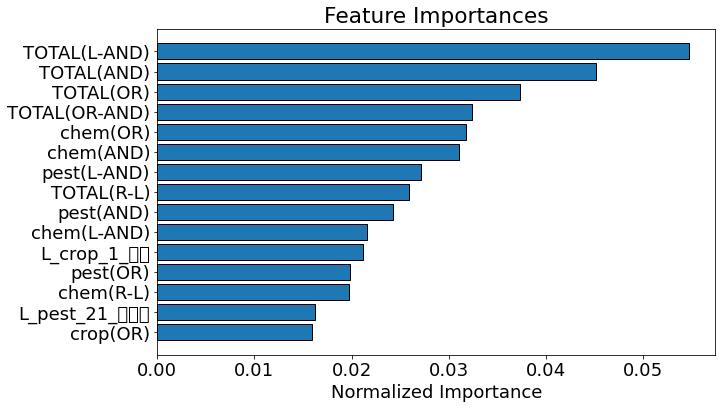

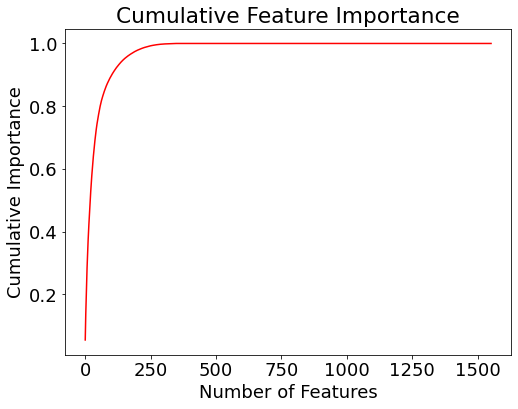

149 features required for 0.95 of cumulative importance

There are 1211 features with 0.0 importance


6719

In [91]:
if(overall_valid_score_stratified > overall_valid_score):
    feature_importances = feature_importances_stratified

norm_feature_importances = plot_feature_importances(feature_importances, threshold = 0.95)
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('\nThere are %d features with 0.0 importance' % len(zero_features))

gc.enable()
#del submission_small, feature_importances_small, metrics_small, submission_small_stratified, feature_importances_small_stratified, metrics_small_stratified
del feature_importances, metrics, feature_importances_stratified, metrics_stratified
gc.collect()

57


<ipython-input-92-0cac8f0f6cd7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_small[TARGET] = target


Training Data Shape:  (311922, 57)
Testing Data Shape:  (175980, 57)
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.7 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=20 will be ignored. Current value: bagging_freq=2
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[69]	train's binary_logloss: 0.00714866	train's f1: 0.934019	valid's binary_logloss: 0.00779271	valid's f1: 0.886165
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.7 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=20 will be ignored. Current value: bagging_freq=2
Training until validation

C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 31291 missing from current font.
  font.set_text(s, 0, flags=flags)


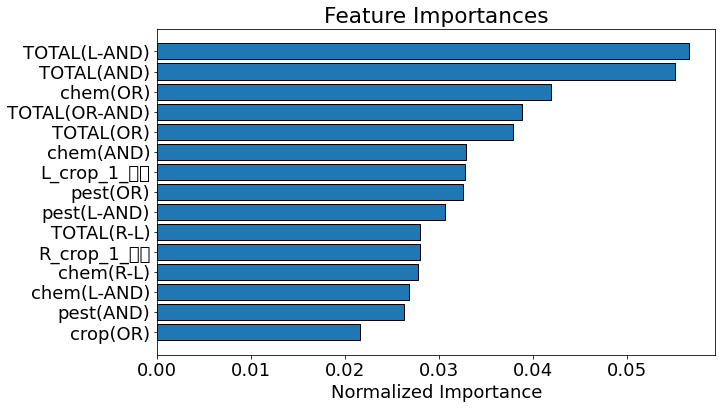

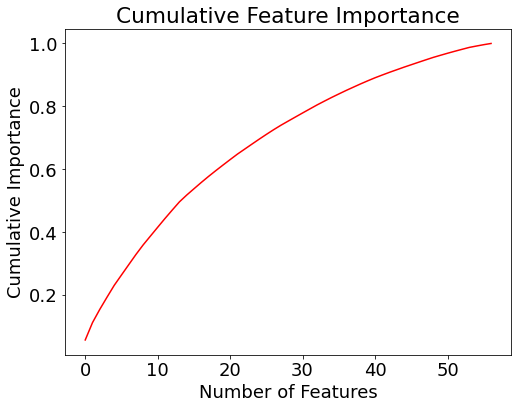

49 features required for 0.95 of cumulative importance

There are 0 features with 0.0 importance
32
Training Data Shape:  (311922, 32)
Testing Data Shape:  (175980, 32)


<ipython-input-92-0cac8f0f6cd7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_small[TARGET] = target


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.7 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=20 will be ignored. Current value: bagging_freq=2
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	train's binary_logloss: 0.00745104	train's f1: 0.929154	valid's binary_logloss: 0.00831258	valid's f1: 0.860104
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.7 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=20 will be ignored. Current value: bagging_freq=2
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration i

C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 31291 missing from cur

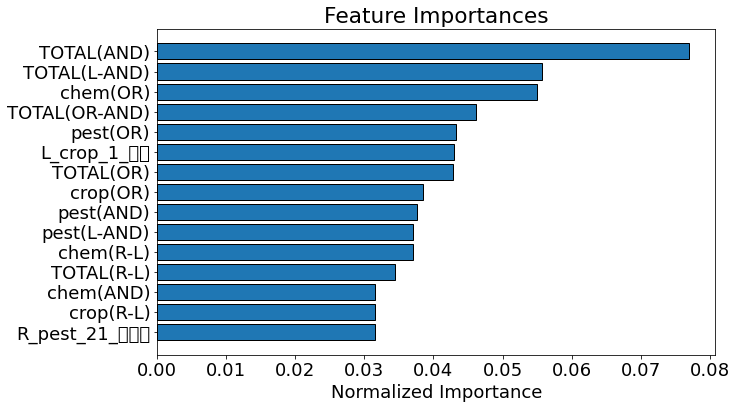

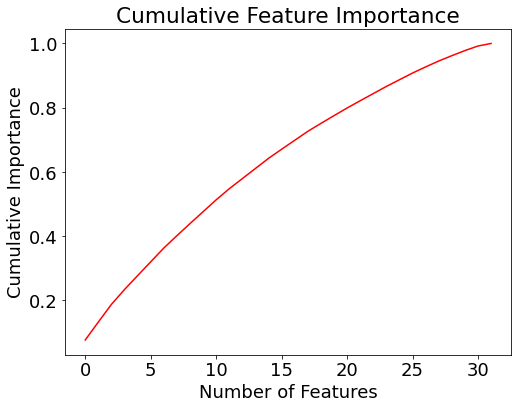

29 features required for 0.95 of cumulative importance

There are 0 features with 0.0 importance
21
Training Data Shape:  (311922, 21)
Testing Data Shape:  (175980, 21)
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.7 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=20 will be ignored. Current value: bagging_freq=2


<ipython-input-92-0cac8f0f6cd7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_small[TARGET] = target


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.00733614	train's f1: 0.877634	valid's binary_logloss: 0.00811154	valid's f1: 0.854914
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.7 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=20 will be ignored. Current value: bagging_freq=2
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[67]	train's binary_logloss: 0.00788512	train's f1: 0.893196	valid's binary_logloss: 0.00814468	valid's f1: 0.845588
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.7 will be ignored. Current value: bagging_

C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 31291 missing from cur

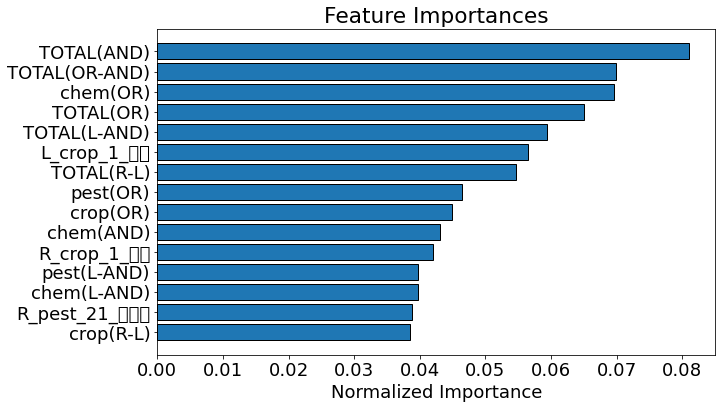

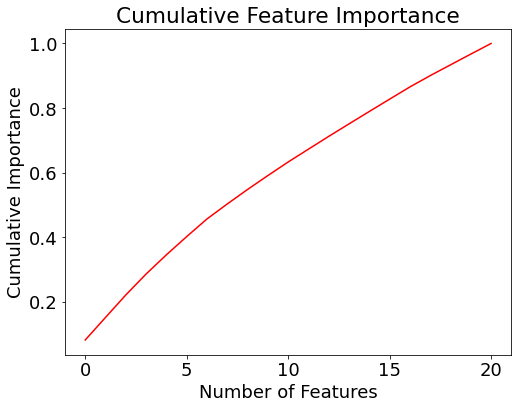

20 features required for 0.95 of cumulative importance

There are 0 features with 0.0 importance
15
Training Data Shape:  (311922, 15)
Testing Data Shape:  (175980, 15)
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.7 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=20 will be ignored. Current value: bagging_freq=2


<ipython-input-92-0cac8f0f6cd7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_small[TARGET] = target


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[77]	train's binary_logloss: 0.00743177	train's f1: 0.873963	valid's binary_logloss: 0.00848235	valid's f1: 0.828523
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.7 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=20 will be ignored. Current value: bagging_freq=2
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[69]	train's binary_logloss: 0.00805521	train's f1: 0.880033	valid's binary_logloss: 0.00898089	valid's f1: 0.814691
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.7 will be ignored. Current value: bagging_

C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 31291 missing from cur

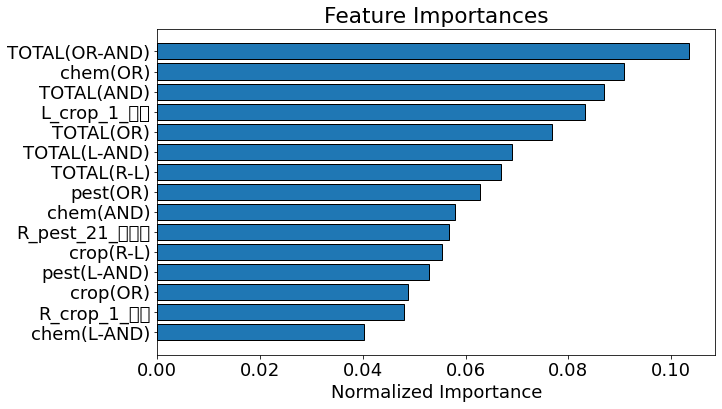

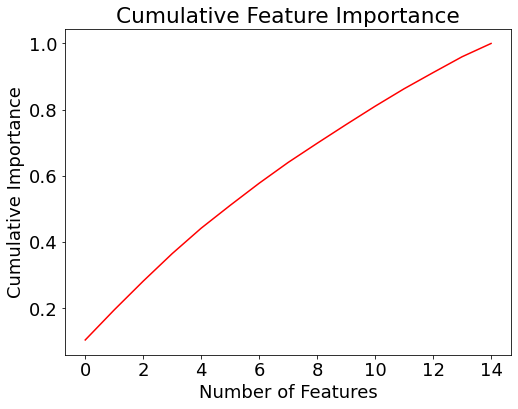

14 features required for 0.95 of cumulative importance

There are 0 features with 0.0 importance
10
Training Data Shape:  (311922, 10)
Testing Data Shape:  (175980, 10)
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.7 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=20 will be ignored. Current value: bagging_freq=2


<ipython-input-92-0cac8f0f6cd7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_small[TARGET] = target


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.00862362	train's f1: 0.84858	valid's binary_logloss: 0.00983789	valid's f1: 0.782609
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.7 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=20 will be ignored. Current value: bagging_freq=2
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	train's binary_logloss: 0.00888785	train's f1: 0.85103	valid's binary_logloss: 0.00923692	valid's f1: 0.791809
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.7 will be ignored. Current value: bagging_fr

C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\NTHU-\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 31291 missing from cur

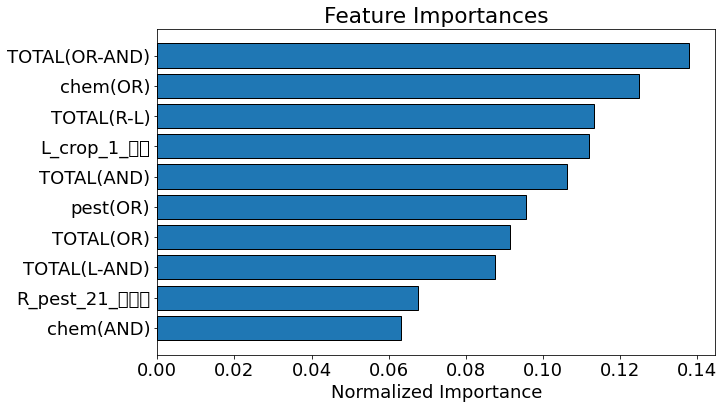

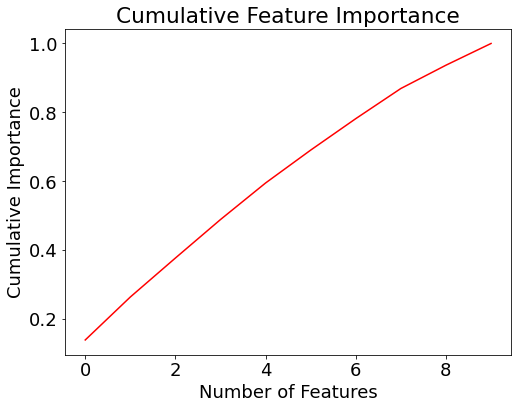

10 features required for 0.95 of cumulative importance

There are 0 features with 0.0 importance
7


In [92]:
norm_feature_importances_small = norm_feature_importances
while True:
    # Threshold for cumulative importance
    threshold = 0.8

    # Extract the features to keep
    features_to_keep = list(norm_feature_importances_small[norm_feature_importances_small['cumulative_importance'] < threshold]['feature'])
    print(len(features_to_keep))
    
    if len(features_to_keep) < 10 :
        break
        
    # Create new datasets with smaller features
    train_small = df_pairs[features_to_keep]
    test_small = df_pairs_test[features_to_keep]
    
    train_small[TARGET] = target
    submission_small, feature_importances_small, metrics_small = model(train_small, test_small)
    
    overall_valid_score = np.array(metrics_small['valid'])[-1]
    print('overall_valid_score:' +str(overall_valid_score))
    
    
    if(overall_valid_score > CUR_HIGH_SCORE):
        df_submission = pd.DataFrame(columns = ['Test', 'Reference'])
        for pair_index in submission_small.loc[submission_small[TARGET]==1].index:
            pair = pair_index.split(', ')
            df_submission = df_submission.append({'Test': int(pair[0]), 'Reference': int(pair[1])}, ignore_index=True)

        df_submission = df_submission.sort_values(by=['Test', 'Reference'])
        print(df_submission)
        
        df_submission.to_csv('output/S3_Cecil_' + today.strftime("%m%d ") + feature_method +' (' + str(overall_valid_score) + ').csv', index=False) 
        feature_importances_small.to_csv('output/' + today.strftime("%m.%d ") + feature_method +' Feature Importances (' + str(overall_valid_score) + ').csv')
        CUR_HIGH_SCORE = overall_valid_score
        print('Beat the High Score!')
    
        
    # Running Stratified KFold Model
    #train_small[TARGET] = target
    submission_small_stratified, feature_importances_small_stratified, metrics_small_stratified = stratified_model(train_small, test_small)

    overall_valid_score_stratified = np.array(metrics_small_stratified['valid'])[-1]
    print('overall_valid_score_stratified: ' + str(overall_valid_score_stratified))
    
    
    if(overall_valid_score_stratified > CUR_HIGH_SCORE):
        df_submission = pd.DataFrame(columns = ['Test', 'Reference'])
        for pair_index in submission_small_stratified.loc[submission_small_stratified[TARGET]==1].index:
            pair = pair_index.split(', ')
            df_submission = df_submission.append({'Test': int(pair[0]), 'Reference': int(pair[1])}, ignore_index=True)

        df_submission = df_submission.sort_values(by=['Test', 'Reference'])
        print(df_submission)
        
        df_submission.to_csv('output/S3_Cecil_stratified_' + today.strftime("%m%d ") + feature_method +' (' + str(overall_valid_score_stratified) + ').csv', index=False)
        feature_importances_small_stratified.to_csv('output/' + today.strftime("%m.%d ") + feature_method +' Feature Importances Stratified (' + str(overall_valid_score_stratified) + ').csv')
        CUR_HIGH_SCORE = overall_valid_score_stratified
        print('Beat the High Score!')
       
    
    if(overall_valid_score_stratified > overall_valid_score):
        feature_importances_small = feature_importances_small_stratified
        
    norm_feature_importances_small = plot_feature_importances(feature_importances_small, threshold = 0.95)
    zero_features_small = list(feature_importances_small[feature_importances_small['importance'] == 0.0]['feature'])
    print('\nThere are %d features with 0.0 importance' % len(zero_features_small))
    
    gc.enable()
    ##del features_to_keep, submission_small, feature_importances_small, metrics_small, submission_small_stratified, feature_importances_small_stratified, metrics_small_stratified
    del features_to_keep, feature_importances_small, metrics_small, feature_importances_small_stratified, metrics_small_stratified
    gc.collect()